In [43]:
import os
import h5py

import socket
import struct
import pickle

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim

from torch.utils.data import Dataset, DataLoader

import time

from tqdm import tqdm



import numpy as np
import copy

In [44]:
import torch
import torchvision
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
from torch.utils.data.sampler import SubsetRandomSampler
%matplotlib inline

# Use a white background for matplotlib figures
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

client side


In [45]:
# keep the path same, just create a folder named cifar in your drive
root_path = './cifar'

In [46]:

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = "cpu"
print(device)

cuda:0


In [47]:

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))])

In [48]:

trainset1 = torchvision.datasets.CIFAR10(root=root_path, download=True, transform=transform)


Files already downloaded and verified


In [49]:
len(trainset1)

50000

In [50]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


In [51]:
import matplotlib.pyplot as plt


def show_image(img, label):
    print("Label=", trainset1.classes[label], "(" + str(label)  + ")")
    plt.imshow(img.permute(1,2,0))

Label= frog (6)


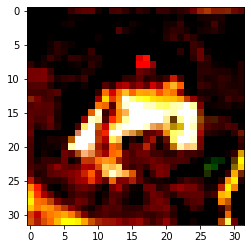

In [52]:
image,label = trainset1[0]
show_image(image, label)

Label= truck (9)


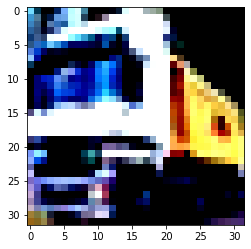

In [53]:
image,label = trainset1[1]
show_image(image, label)

Label= truck (9)


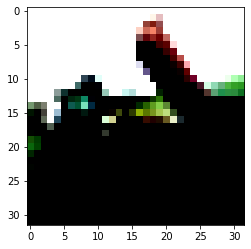

In [54]:
image,label = trainset1[2]
show_image(image, label)

Label= truck (9)


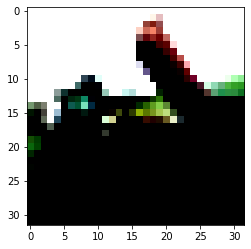

In [55]:
image,label = trainset1[2]
show_image(image, label)

Label= deer (4)


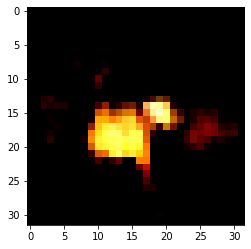

In [56]:
image,label = trainset1[3]
show_image(image, label)

Label= automobile (1)


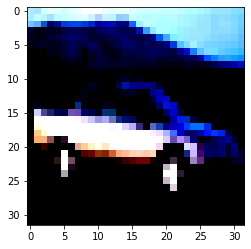

In [57]:
image,label = trainset1[4]
show_image(image, label)

Label= automobile (1)


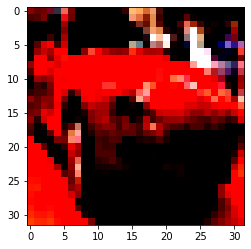

In [58]:
image,label = trainset1[5]
show_image(image, label)

Label= bird (2)


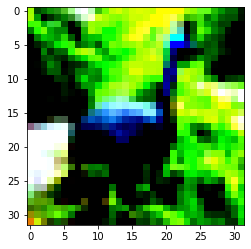

In [59]:
image,label = trainset1[6]
show_image(image, label)

# Define below number of users/clients

In [60]:
users = 50 # clients

In [61]:
trainset1_len = 50000

In [62]:
idxs = np.random.permutation(trainset1_len)
idxs

array([39717, 26137, 45052, ..., 19596, 15112, 27018])

In [63]:
train_indices = idxs
train_indices

array([39717, 26137, 45052, ..., 19596, 15112, 27018])

In [64]:
indices_per_client = int (len(train_indices)/users)

print(indices_per_client)

1000


# trainset2 which has non poisoned data

In [65]:
trainset2 = torchvision.datasets.CIFAR10(root=root_path, download=False, transform=transform)

# TestSet 

In [66]:
testset = torchvision.datasets.CIFAR10 (root=root_path, train=False, download=True, transform=transform)

Files already downloaded and verified


# doing label flipping

In [67]:


# for i in range(len(trainset1)):
#     if (trainset2.targets[i] == 6):
#         trainset2.targets[i] = 8
#     if (trainset2.targets[i] == 2):
#         trainset2.targets[i] = 9

In [68]:
len(testset)

10000

In [69]:
idxs = np.random.permutation(10000)
idxs

array([3516, 1594,  165, ..., 9490, 4761, 5493])

In [70]:
val_indices = idxs
val_indices 

array([3516, 1594,  165, ..., 9490, 4761, 5493])

In [71]:
#experimenting 

users = 50



batch_size = 100

train_loaders2 = [] 

train_trainset2=[]

train_loaders1 = []

train_trainset1 = []


for i in range(users):
  start= indices_per_client*i
  end= indices_per_client * (i+1)
  
  #print((train_indices[start:end]))


  train_trainset1.append(list(train_indices[start:end]))

  train_trainset2.append(list(train_indices[start:end]))

  #print(len(train_dataset))

  train_sampler = SubsetRandomSampler(train_indices[start : end])
  # train_loaders= DataLoader(dataset, batch_size, sampler= train_sampler) 

  #####*********************************************************************################
  ##### IMPORTANT : HERE BELOW CHANGE IF CONDITION TO SELECT NO OF POISONED CLIETNS ########
  #####*********************************************************************################

  if i < 0 :
    print("poisoned: ", i)
    train_loaders1.append(DataLoader(trainset1, batch_size=batch_size,sampler=train_sampler)) # client training on poisoned data
  else:
    train_loaders1.append(DataLoader(trainset2, batch_size=batch_size,sampler=train_sampler)) # rest training on normal data
    print("non-poisoned: ", i)



  train_loaders2.append(DataLoader(trainset2, batch_size=batch_size,sampler=train_sampler))

  





val_sampler = SubsetRandomSampler(val_indices)



test_loader = DataLoader(testset, batch_size=batch_size, sampler=val_sampler) 
# 



non-poisoned:  0
non-poisoned:  1
non-poisoned:  2
non-poisoned:  3
non-poisoned:  4
non-poisoned:  5
non-poisoned:  6
non-poisoned:  7
non-poisoned:  8
non-poisoned:  9
non-poisoned:  10
non-poisoned:  11
non-poisoned:  12
non-poisoned:  13
non-poisoned:  14
non-poisoned:  15
non-poisoned:  16
non-poisoned:  17
non-poisoned:  18
non-poisoned:  19
non-poisoned:  20
non-poisoned:  21
non-poisoned:  22
non-poisoned:  23
non-poisoned:  24
non-poisoned:  25
non-poisoned:  26
non-poisoned:  27
non-poisoned:  28
non-poisoned:  29
non-poisoned:  30
non-poisoned:  31
non-poisoned:  32
non-poisoned:  33
non-poisoned:  34
non-poisoned:  35
non-poisoned:  36
non-poisoned:  37
non-poisoned:  38
non-poisoned:  39
non-poisoned:  40
non-poisoned:  41
non-poisoned:  42
non-poisoned:  43
non-poisoned:  44
non-poisoned:  45
non-poisoned:  46
non-poisoned:  47
non-poisoned:  48
non-poisoned:  49


In [72]:
print(len(train_trainset1))

50


In [73]:
len(train_loaders1)

50

In [74]:
from torch.autograd import Variable
import torch.nn.init as init

def _weights_init(m):
    classname = m.__class__.__name__
    #print(classname)
    if isinstance(m, nn.Linear) or isinstance(m, nn.Conv2d):
        init.kaiming_normal_(m.weight)

class LambdaLayer(nn.Module):
    def __init__(self, lambd):
        super(LambdaLayer, self).__init__()
        self.lambd = lambd

    def forward(self, x):
        return self.lambd(x)


class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1, option='A'):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != planes:
            if option == 'A':
                """
                For CIFAR10 ResNet paper uses option A.
                """
                self.shortcut = LambdaLayer(lambda x:
                                            F.pad(x[:, :, ::2, ::2], (0, 0, 0, 0, planes//4, planes//4), "constant", 0))
            elif option == 'B':
                self.shortcut = nn.Sequential(
                     nn.Conv2d(in_planes, self.expansion * planes, kernel_size=1, stride=stride, bias=False),
                     nn.BatchNorm2d(self.expansion * planes)
                )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out


class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_planes = 16

        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(16)
        self.layer1 = self._make_layer(block, 16, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 32, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 64, num_blocks[2], stride=2)
        self.linear = nn.Linear(64, num_classes)

        self.apply(_weights_init)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes * block.expansion

        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = F.avg_pool2d(out, out.size()[3])
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out


def resnet20():
    return ResNet(BasicBlock, [3, 3, 3])

In [75]:
net_glob = resnet20()
net_glob.to(device)


ResNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=

In [76]:

lr = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net_glob.parameters(), lr=lr, momentum=0.9)


In [77]:
local_epochs = 1

In [78]:
def FedAvg(w):
    w_avg = copy.deepcopy(w[0])
    for k in w_avg.keys():
        for i in range(1, len(w)):
            w_avg[k] += w[i][k]
        w_avg[k] = torch.div(w_avg[k], len(w))
    return w_avg

In [79]:
num_users = 15

frac = 1 # this tells the percentage of clients chosen for each global round. 1=100%(all the clinets are chosen),0.5(only half the clients are chosen)

In [80]:
# FGSM attack code
def fgsm_attack(image, epsilon, data_grad):
    # Collect the element-wise sign of the data gradient
    sign_data_grad = data_grad.sign()
    # Create the perturbed image by adjusting each pixel of the input image
    perturbed_image = image + epsilon*sign_data_grad
    # Adding clipping to maintain [0,1] range
    perturbed_image = torch.clamp(perturbed_image, 0, 1)
    # Return the perturbed image
    return perturbed_image

In [81]:
# def fgsm_attack(model, loss, images, labels, eps) :
    
#     images = images.to(device)
#     labels = labels.to(device)
#     images.requires_grad = True
           
#     outputs = model(images)
    
#     model.zero_grad()
#     cost = criterion(outputs, labels)
#     cost.backward()
    
#     attack_images = images + eps*images.grad.sign()
#     attack_images = torch.clamp(attack_images, 0, 1)
    
#     return attack_images
def test(net, test_loader, criterion, device, epsilon):
    net.eval()  # set the model to evaluation mode
    test_loss = 0.0
    correct = 0
    total = 0

    for data, target in test_loader:
        data, target = data.to(device), target.to(device)

        # Generate adversarial examples using FGSM
        data.requires_grad = True
        output = net(data)
        loss = criterion(output, target)
        net.zero_grad()
        loss.backward()
        data_grad = data.grad.data
        perturbed_data = fgsm_attack(data, epsilon, data_grad)
        with torch.no_grad():
            output = net(perturbed_data)

        # Compute loss and accuracy
        test_loss += criterion(output, target).item()
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

    test_loss /= len(test_loader)
    accuracy = 100.0 * correct / total

    print("Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)".format(
        test_loss, correct, total, accuracy))

In [82]:
net_glob.train()
# copy weights
w_glob = net_glob.state_dict()

loss_train_collect = []
acc_train_collect = []
loss_test_collect = []
acc_test_collect = []



for iter in range(200):
    w_locals, loss_locals_train, acc_locals_train, loss_locals_test, acc_locals_test = [], [], [], [], []
    m = max(int(frac * num_users), 1)
    idxs_users = np.random.choice(range(num_users), m, replace = False)
    

    global_weights = copy.deepcopy(net_glob.state_dict())
   
    # Training/Testing simulation
    for idx in idxs_users: # each client
        
        net_glob.load_state_dict(global_weights)
        # client training local epochs  
        for local_epoch in range(local_epochs):

          for i, data in enumerate(tqdm(train_loaders1[idx], ncols=100, desc='Round'+str(iter+1)+': User'+str(idx)+'_'+str(local_epoch+1))):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.clone().detach().long().to(device)
            #data.requires_grad = True

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net_glob(inputs)
            loss = criterion(outputs, labels)
            #net_glob.zero_grad()
            loss.backward()
            #data_grad = data.grad.data
            #perturbed_data = fgsm_attack(inputs, 0.3, data_grad)
            #output = net_glob(perturbed_data)
            optimizer.step()
          
        w = copy.deepcopy(net_glob.state_dict())
        w_locals.append(copy.deepcopy(w))
      
      
    w_glob = FedAvg(w_locals)
    # update global model --- copy weight to net_glob -- distributed the model to all users
    net_glob.load_state_dict(w_glob)

    # train acc
    with torch.no_grad():
        corr_num = 0
        total_num = 0
        train_loss = 0.0
        for idx in idxs_users:
          for j, trn in enumerate(train_loaders2[idx]):
            trn_x, trn_label = trn
            trn_x = trn_x.to(device)
            trn_label = trn_label.clone().detach().long().to(device)

            trn_output = net_glob(trn_x)
            loss = criterion(trn_output, trn_label)
            train_loss += loss.item()
            model_label = trn_output.argmax(dim=1)
            corr = trn_label[trn_label == model_label].size(0)
            corr_num += corr
            total_num += trn_label.size(0)
          print("client:{} train_acc: {:.2f}%, train_loss: {:.4f}".format(idx, corr_num / total_num * 100, train_loss / len(train_loaders2)))

    # Assuming you have already defined your neural network model, test dataset loader, loss criterion, and device
    epsilon = 0.3  # choose a value for epsilon
    test(net=net_glob, test_loader=test_loader, criterion=criterion, device=device, epsilon=epsilon)
#     with torch.no_grad():
#         corr_num = 0
#         total_num = 0
#         val_loss = 0.0
#         for j, val in enumerate(test_loader):
#             val_x, val_label = val
#             val_x = val_x.to(device)
#             data = val_x
            
#             data.requires_grad = True
#             #val_x = fgsm_attack(net_glob, loss, val_x, val_label, 0.3).to(device)
#             val_label = val_label.clone().detach().long().to(device)
#             val_output = net_glob(data)
            
#             loss = criterion(val_output, val_label)
#             net_glob.zero_grad()
#             loss.backward()
#             data_grad = data.grad.data
#             perturbed_data = fgsm_attack(data, 0.3, data_grad)
#             output = net_glob(perturbed_data)
#             val_loss += loss.item()
#             model_label = val_output.argmax(dim=1)
#             corr = val_label[val_label == model_label].size(0)
#             corr_num += corr
#             total_num += val_label.size(0)
#             accuracy = corr_num / total_num * 100
#             test_loss = val_loss / len(test_loader)
#         print("test_acc: {:.2f}%, test_loss: {:.4f}".format( accuracy, test_loss))
    
#     # prepare to count predictions for each class
#     correct_pred = {classname: 0 for classname in classes}
#     total_pred = {classname: 0 for classname in classes}

#     # again no gradients needed
#     with torch.no_grad():
#         for data in test_loader:
#             images, labels = data
#             outputs = net_glob(images)
#             _, predictions = torch.max(outputs, 1)
#             # collect the correct predictions for each class
#             for label, prediction in zip(labels, predictions):
#                 if label == prediction:
#                     correct_pred[classes[label]] += 1
#                 total_pred[classes[label]] += 1


#     # print accuracy for each class
#     for classname, correct_count in correct_pred.items():
#         accuracy = 100 * float(correct_count) / total_pred[classname]
#         print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
#                                                       accuracy))



Round1: User7_1: 100%|██████████████████████████████████████████████| 10/10 [00:00<00:00, 15.63it/s]


client:6 train_acc: 14.00%, train_loss: 0.4885
client:13 train_acc: 14.90%, train_loss: 0.9800
client:5 train_acc: 14.97%, train_loss: 1.4807
client:9 train_acc: 14.82%, train_loss: 1.9770
client:12 train_acc: 14.80%, train_loss: 2.4736
client:2 train_acc: 14.72%, train_loss: 2.9693
client:1 train_acc: 14.71%, train_loss: 3.4651
client:11 train_acc: 14.30%, train_loss: 3.9653
client:3 train_acc: 14.14%, train_loss: 4.4529
client:0 train_acc: 14.25%, train_loss: 4.9374
client:10 train_acc: 14.59%, train_loss: 5.4239
client:8 train_acc: 14.63%, train_loss: 5.9123
client:14 train_acc: 14.60%, train_loss: 6.4063
client:4 train_acc: 14.68%, train_loss: 6.8987
client:7 train_acc: 14.63%, train_loss: 7.3886
Test set: Average loss: 2.7320, Accuracy: 518/10000 (5.18%)


Round2: User14_1: 100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 26.02it/s]


client:1 train_acc: 15.70%, train_loss: 0.4474
client:12 train_acc: 15.70%, train_loss: 0.8896
client:9 train_acc: 16.43%, train_loss: 1.3289
client:7 train_acc: 16.40%, train_loss: 1.7742
client:5 train_acc: 16.96%, train_loss: 2.2147
client:2 train_acc: 17.07%, train_loss: 2.6546
client:8 train_acc: 17.30%, train_loss: 3.0938
client:6 train_acc: 17.34%, train_loss: 3.5374
client:0 train_acc: 17.32%, train_loss: 3.9826
client:13 train_acc: 17.15%, train_loss: 4.4241
client:11 train_acc: 17.00%, train_loss: 4.8678
client:10 train_acc: 17.10%, train_loss: 5.3084
client:4 train_acc: 17.08%, train_loss: 5.7505
client:3 train_acc: 17.06%, train_loss: 6.1969
client:14 train_acc: 16.97%, train_loss: 6.6453
Test set: Average loss: 2.5275, Accuracy: 678/10000 (6.78%)


Round3: User12_1: 100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 16.28it/s]


client:13 train_acc: 23.10%, train_loss: 0.4265
client:0 train_acc: 22.85%, train_loss: 0.8535
client:7 train_acc: 22.13%, train_loss: 1.2811
client:10 train_acc: 21.82%, train_loss: 1.7048
client:11 train_acc: 21.82%, train_loss: 2.1345
client:5 train_acc: 21.62%, train_loss: 2.5604
client:1 train_acc: 21.43%, train_loss: 2.9927
client:2 train_acc: 21.62%, train_loss: 3.4195
client:9 train_acc: 21.66%, train_loss: 3.8449
client:8 train_acc: 21.83%, train_loss: 4.2673
client:3 train_acc: 21.75%, train_loss: 4.6955
client:6 train_acc: 21.96%, train_loss: 5.1238
client:14 train_acc: 21.85%, train_loss: 5.5570
client:4 train_acc: 21.94%, train_loss: 5.9838
client:12 train_acc: 21.95%, train_loss: 6.4115
Test set: Average loss: 2.4837, Accuracy: 384/10000 (3.84%)


Round4: User1_1: 100%|██████████████████████████████████████████████| 10/10 [00:00<00:00, 24.80it/s]


client:4 train_acc: 22.40%, train_loss: 0.4171
client:6 train_acc: 23.90%, train_loss: 0.8361
client:8 train_acc: 23.70%, train_loss: 1.2489
client:11 train_acc: 23.77%, train_loss: 1.6657
client:9 train_acc: 23.84%, train_loss: 2.0795
client:14 train_acc: 23.52%, train_loss: 2.5029
client:5 train_acc: 23.63%, train_loss: 2.9162
client:0 train_acc: 23.67%, train_loss: 3.3340
client:7 train_acc: 23.48%, train_loss: 3.7521
client:12 train_acc: 23.43%, train_loss: 4.1665
client:13 train_acc: 23.46%, train_loss: 4.5820
client:2 train_acc: 23.57%, train_loss: 4.9958
client:10 train_acc: 23.35%, train_loss: 5.4088
client:3 train_acc: 23.31%, train_loss: 5.8275
client:1 train_acc: 23.12%, train_loss: 6.2501
Test set: Average loss: 2.4700, Accuracy: 541/10000 (5.41%)


Round5: User5_1: 100%|██████████████████████████████████████████████| 10/10 [00:00<00:00, 18.26it/s]


client:8 train_acc: 26.60%, train_loss: 0.4036
client:9 train_acc: 25.40%, train_loss: 0.8094
client:6 train_acc: 25.87%, train_loss: 1.2200
client:11 train_acc: 25.90%, train_loss: 1.6282
client:3 train_acc: 25.54%, train_loss: 2.0363
client:14 train_acc: 25.17%, train_loss: 2.4516
client:1 train_acc: 24.90%, train_loss: 2.8660
client:10 train_acc: 24.71%, train_loss: 3.2698
client:7 train_acc: 24.64%, train_loss: 3.6784
client:0 train_acc: 24.78%, train_loss: 4.0866
client:12 train_acc: 24.80%, train_loss: 4.4918
client:4 train_acc: 24.74%, train_loss: 4.9011
client:2 train_acc: 24.92%, train_loss: 5.3049
client:13 train_acc: 24.96%, train_loss: 5.7113
client:5 train_acc: 24.90%, train_loss: 6.1164
Test set: Average loss: 2.4842, Accuracy: 534/10000 (5.34%)


Round6: User2_1: 100%|██████████████████████████████████████████████| 10/10 [00:00<00:00, 25.37it/s]


client:7 train_acc: 25.30%, train_loss: 0.4009
client:1 train_acc: 25.05%, train_loss: 0.8088
client:4 train_acc: 24.87%, train_loss: 1.2099
client:8 train_acc: 25.45%, train_loss: 1.6068
client:0 train_acc: 25.76%, train_loss: 2.0066
client:11 train_acc: 25.72%, train_loss: 2.4062
client:10 train_acc: 25.57%, train_loss: 2.8022
client:13 train_acc: 25.86%, train_loss: 3.2003
client:14 train_acc: 25.78%, train_loss: 3.6074
client:9 train_acc: 25.97%, train_loss: 4.0038
client:3 train_acc: 25.97%, train_loss: 4.4036
client:6 train_acc: 26.09%, train_loss: 4.8066
client:5 train_acc: 26.08%, train_loss: 5.2033
client:12 train_acc: 26.08%, train_loss: 5.6001
client:2 train_acc: 26.15%, train_loss: 5.9955
Test set: Average loss: 2.5043, Accuracy: 526/10000 (5.26%)


Round7: User6_1: 100%|██████████████████████████████████████████████| 10/10 [00:00<00:00, 25.20it/s]


client:12 train_acc: 28.60%, train_loss: 0.3890
client:2 train_acc: 29.25%, train_loss: 0.7760
client:0 train_acc: 29.30%, train_loss: 1.1685
client:1 train_acc: 28.95%, train_loss: 1.5697
client:14 train_acc: 28.50%, train_loss: 1.9701
client:11 train_acc: 28.32%, train_loss: 2.3630
client:9 train_acc: 28.39%, train_loss: 2.7528
client:4 train_acc: 28.14%, train_loss: 3.1471
client:3 train_acc: 28.09%, train_loss: 3.5400
client:5 train_acc: 28.04%, train_loss: 3.9294
client:10 train_acc: 27.95%, train_loss: 4.3184
client:7 train_acc: 27.75%, train_loss: 4.7125
client:13 train_acc: 27.86%, train_loss: 5.1030
client:8 train_acc: 27.89%, train_loss: 5.4937
client:6 train_acc: 27.90%, train_loss: 5.8904
Test set: Average loss: 2.5299, Accuracy: 619/10000 (6.19%)


Round8: User0_1: 100%|██████████████████████████████████████████████| 10/10 [00:00<00:00, 26.21it/s]


client:7 train_acc: 27.50%, train_loss: 0.3881
client:6 train_acc: 28.30%, train_loss: 0.7787
client:13 train_acc: 28.70%, train_loss: 1.1632
client:12 train_acc: 28.82%, train_loss: 1.5459
client:3 train_acc: 28.90%, train_loss: 1.9328
client:1 train_acc: 28.70%, train_loss: 2.3285
client:2 train_acc: 28.86%, train_loss: 2.7093
client:9 train_acc: 29.07%, train_loss: 3.0913
client:5 train_acc: 29.06%, train_loss: 3.4750
client:10 train_acc: 29.00%, train_loss: 3.8574
client:14 train_acc: 28.82%, train_loss: 4.2511
client:8 train_acc: 28.74%, train_loss: 4.6352
client:4 train_acc: 28.65%, train_loss: 5.0222
client:11 train_acc: 28.64%, train_loss: 5.4087
client:0 train_acc: 28.77%, train_loss: 5.7953
Test set: Average loss: 2.5585, Accuracy: 583/10000 (5.83%)


Round9: User2_1: 100%|██████████████████████████████████████████████| 10/10 [00:00<00:00, 26.67it/s]


client:12 train_acc: 31.30%, train_loss: 0.3767
client:3 train_acc: 31.15%, train_loss: 0.7569
client:6 train_acc: 30.93%, train_loss: 1.1414
client:11 train_acc: 30.73%, train_loss: 1.5225
client:7 train_acc: 30.36%, train_loss: 1.9050
client:10 train_acc: 30.42%, train_loss: 2.2817
client:13 train_acc: 30.43%, train_loss: 2.6596
client:8 train_acc: 30.28%, train_loss: 3.0385
client:1 train_acc: 30.17%, train_loss: 3.4290
client:4 train_acc: 29.93%, train_loss: 3.8094
client:14 train_acc: 29.77%, train_loss: 4.1969
client:9 train_acc: 29.93%, train_loss: 4.5721
client:0 train_acc: 30.03%, train_loss: 4.9517
client:5 train_acc: 29.99%, train_loss: 5.3297
client:2 train_acc: 30.07%, train_loss: 5.7044
Test set: Average loss: 2.5947, Accuracy: 614/10000 (6.14%)


Round10: User5_1: 100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 19.82it/s]


client:0 train_acc: 32.50%, train_loss: 0.3730
client:8 train_acc: 31.80%, train_loss: 0.7467
client:3 train_acc: 31.93%, train_loss: 1.1217
client:9 train_acc: 31.90%, train_loss: 1.4911
client:14 train_acc: 31.56%, train_loss: 1.8732
client:1 train_acc: 31.35%, train_loss: 2.2586
client:11 train_acc: 31.41%, train_loss: 2.6347
client:13 train_acc: 31.54%, train_loss: 3.0073
client:10 train_acc: 31.43%, train_loss: 3.3795
client:12 train_acc: 31.51%, train_loss: 3.7510
client:7 train_acc: 31.31%, train_loss: 4.1283
client:6 train_acc: 31.30%, train_loss: 4.5075
client:4 train_acc: 31.12%, train_loss: 4.8826
client:2 train_acc: 31.16%, train_loss: 5.2516
client:5 train_acc: 31.17%, train_loss: 5.6244
Test set: Average loss: 2.6217, Accuracy: 617/10000 (6.17%)


Round11: User2_1: 100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 23.78it/s]


client:11 train_acc: 32.70%, train_loss: 0.3714
client:8 train_acc: 32.05%, train_loss: 0.7405
client:3 train_acc: 32.40%, train_loss: 1.1103
client:5 train_acc: 32.45%, train_loss: 1.4793
client:10 train_acc: 32.08%, train_loss: 1.8466
client:12 train_acc: 32.43%, train_loss: 2.2132
client:13 train_acc: 32.29%, train_loss: 2.5807
client:6 train_acc: 32.29%, train_loss: 2.9549
client:4 train_acc: 32.09%, train_loss: 3.3245
client:7 train_acc: 31.85%, train_loss: 3.6973
client:0 train_acc: 31.85%, train_loss: 4.0664
client:14 train_acc: 31.78%, train_loss: 4.4437
client:1 train_acc: 31.69%, train_loss: 4.8245
client:9 train_acc: 31.73%, train_loss: 5.1888
client:2 train_acc: 31.89%, train_loss: 5.5521
Test set: Average loss: 2.6771, Accuracy: 663/10000 (6.63%)


Round12: User5_1: 100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 17.59it/s]


client:7 train_acc: 30.50%, train_loss: 0.3701
client:8 train_acc: 31.20%, train_loss: 0.7356
client:4 train_acc: 31.10%, train_loss: 1.1024
client:11 train_acc: 31.57%, train_loss: 1.4713
client:13 train_acc: 31.72%, train_loss: 1.8365
client:1 train_acc: 31.63%, train_loss: 2.2141
client:12 train_acc: 31.71%, train_loss: 2.5779
client:2 train_acc: 32.00%, train_loss: 2.9376
client:10 train_acc: 32.04%, train_loss: 3.3022
client:9 train_acc: 32.09%, train_loss: 3.6635
client:6 train_acc: 32.10%, train_loss: 4.0351
client:3 train_acc: 32.25%, train_loss: 4.4019
client:14 train_acc: 32.21%, train_loss: 4.7756
client:0 train_acc: 32.37%, train_loss: 5.1421
client:5 train_acc: 32.39%, train_loss: 5.5092
Test set: Average loss: 2.7282, Accuracy: 604/10000 (6.04%)


Round13: User4_1: 100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 22.63it/s]


client:12 train_acc: 34.40%, train_loss: 0.3592
client:11 train_acc: 34.10%, train_loss: 0.7232
client:6 train_acc: 33.87%, train_loss: 1.0895
client:14 train_acc: 33.52%, train_loss: 1.4595
client:7 train_acc: 33.10%, train_loss: 1.8249
client:1 train_acc: 33.10%, train_loss: 2.1970
client:8 train_acc: 32.91%, train_loss: 2.5583
client:2 train_acc: 33.02%, train_loss: 2.9132
client:5 train_acc: 33.16%, train_loss: 3.2749
client:9 train_acc: 33.14%, train_loss: 3.6322
client:13 train_acc: 33.26%, train_loss: 3.9921
client:0 train_acc: 33.39%, train_loss: 4.3530
client:10 train_acc: 33.33%, train_loss: 4.7142
client:3 train_acc: 33.38%, train_loss: 5.0776
client:4 train_acc: 33.26%, train_loss: 5.4416
Test set: Average loss: 2.7284, Accuracy: 685/10000 (6.85%)


Round14: User12_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 16.21it/s]


client:7 train_acc: 32.50%, train_loss: 0.3617
client:10 train_acc: 32.75%, train_loss: 0.7191
client:2 train_acc: 33.13%, train_loss: 1.0711
client:11 train_acc: 33.60%, train_loss: 1.4330
client:13 train_acc: 33.96%, train_loss: 1.7879
client:3 train_acc: 34.13%, train_loss: 2.1466
client:0 train_acc: 34.29%, train_loss: 2.5024
client:9 train_acc: 34.16%, train_loss: 2.8542
client:6 train_acc: 34.12%, train_loss: 3.2170
client:1 train_acc: 33.99%, train_loss: 3.5887
client:5 train_acc: 34.22%, train_loss: 3.9457
client:8 train_acc: 34.10%, train_loss: 4.3042
client:4 train_acc: 34.05%, train_loss: 4.6621
client:14 train_acc: 34.02%, train_loss: 5.0276
client:12 train_acc: 34.12%, train_loss: 5.3850
Test set: Average loss: 2.7200, Accuracy: 721/10000 (7.21%)


Round15: User3_1: 100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 24.94it/s]


client:0 train_acc: 35.80%, train_loss: 0.3517
client:14 train_acc: 34.40%, train_loss: 0.7125
client:8 train_acc: 33.70%, train_loss: 1.0661
client:12 train_acc: 34.02%, train_loss: 1.4185
client:4 train_acc: 33.96%, train_loss: 1.7720
client:10 train_acc: 33.87%, train_loss: 2.1256
client:5 train_acc: 34.13%, train_loss: 2.4794
client:6 train_acc: 34.04%, train_loss: 2.8381
client:1 train_acc: 34.03%, train_loss: 3.2040
client:2 train_acc: 34.17%, train_loss: 3.5518
client:9 train_acc: 34.15%, train_loss: 3.8990
client:7 train_acc: 34.07%, train_loss: 4.2562
client:13 train_acc: 34.16%, train_loss: 4.6074
client:11 train_acc: 34.14%, train_loss: 4.9647
client:3 train_acc: 34.27%, train_loss: 5.3187
Test set: Average loss: 2.7817, Accuracy: 691/10000 (6.91%)


Round16: User11_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 23.00it/s]


client:2 train_acc: 35.40%, train_loss: 0.3441
client:0 train_acc: 35.75%, train_loss: 0.6922
client:6 train_acc: 35.23%, train_loss: 1.0475
client:5 train_acc: 35.80%, train_loss: 1.3979
client:12 train_acc: 35.98%, train_loss: 1.7472
client:4 train_acc: 35.87%, train_loss: 2.0968
client:10 train_acc: 35.71%, train_loss: 2.4472
client:9 train_acc: 35.64%, train_loss: 2.7912
client:14 train_acc: 35.46%, train_loss: 3.1483
client:7 train_acc: 35.32%, train_loss: 3.5019
client:8 train_acc: 35.15%, train_loss: 3.8516
client:3 train_acc: 35.27%, train_loss: 4.2021
client:13 train_acc: 35.32%, train_loss: 4.5495
client:1 train_acc: 35.29%, train_loss: 4.9129
client:11 train_acc: 35.26%, train_loss: 5.2676
Test set: Average loss: 2.8041, Accuracy: 681/10000 (6.81%)


Round17: User12_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 25.24it/s]


client:6 train_acc: 35.50%, train_loss: 0.3525
client:1 train_acc: 35.40%, train_loss: 0.7133
client:10 train_acc: 35.13%, train_loss: 1.0613
client:9 train_acc: 35.17%, train_loss: 1.4016
client:13 train_acc: 35.26%, train_loss: 1.7462
client:8 train_acc: 34.93%, train_loss: 2.0938
client:0 train_acc: 35.24%, train_loss: 2.4391
client:3 train_acc: 35.38%, train_loss: 2.7860
client:4 train_acc: 35.44%, train_loss: 3.1321
client:5 train_acc: 35.69%, train_loss: 3.4800
client:14 train_acc: 35.56%, train_loss: 3.8344
client:11 train_acc: 35.57%, train_loss: 4.1856
client:7 train_acc: 35.45%, train_loss: 4.5357
client:2 train_acc: 35.41%, train_loss: 4.8770
client:12 train_acc: 35.51%, train_loss: 5.2236
Test set: Average loss: 2.8354, Accuracy: 688/10000 (6.88%)


Round18: User7_1: 100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 25.48it/s]


client:3 train_acc: 36.70%, train_loss: 0.3452
client:1 train_acc: 36.60%, train_loss: 0.7015
client:0 train_acc: 37.03%, train_loss: 1.0434
client:13 train_acc: 36.95%, train_loss: 1.3848
client:2 train_acc: 36.84%, train_loss: 1.7227
client:6 train_acc: 36.72%, train_loss: 2.0711
client:12 train_acc: 36.73%, train_loss: 2.4136
client:8 train_acc: 36.49%, train_loss: 2.7569
client:11 train_acc: 36.63%, train_loss: 3.1051
client:4 train_acc: 36.49%, train_loss: 3.4496
client:14 train_acc: 36.36%, train_loss: 3.8012
client:10 train_acc: 36.33%, train_loss: 4.1462
client:9 train_acc: 36.28%, train_loss: 4.4841
client:5 train_acc: 36.46%, train_loss: 4.8285
client:7 train_acc: 36.39%, train_loss: 5.1758
Test set: Average loss: 2.8578, Accuracy: 701/10000 (7.01%)


Round19: User11_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 23.94it/s]


client:2 train_acc: 36.80%, train_loss: 0.3355
client:14 train_acc: 36.00%, train_loss: 0.6851
client:9 train_acc: 36.17%, train_loss: 1.0210
client:3 train_acc: 36.33%, train_loss: 1.3639
client:10 train_acc: 36.34%, train_loss: 1.7071
client:7 train_acc: 36.32%, train_loss: 2.0520
client:6 train_acc: 36.33%, train_loss: 2.3980
client:4 train_acc: 36.21%, train_loss: 2.7403
client:1 train_acc: 36.31%, train_loss: 3.0943
client:0 train_acc: 36.51%, train_loss: 3.4349
client:8 train_acc: 36.34%, train_loss: 3.7767
client:13 train_acc: 36.43%, train_loss: 4.1154
client:12 train_acc: 36.48%, train_loss: 4.4557
client:5 train_acc: 36.61%, train_loss: 4.7982
client:11 train_acc: 36.77%, train_loss: 5.1439
Test set: Average loss: 2.8670, Accuracy: 703/10000 (7.03%)


Round20: User2_1: 100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 22.72it/s]


client:12 train_acc: 37.90%, train_loss: 0.3381
client:7 train_acc: 37.20%, train_loss: 0.6795
client:8 train_acc: 36.83%, train_loss: 1.0174
client:9 train_acc: 36.62%, train_loss: 1.3497
client:1 train_acc: 36.62%, train_loss: 1.7010
client:4 train_acc: 36.55%, train_loss: 2.0385
client:6 train_acc: 36.51%, train_loss: 2.3814
client:11 train_acc: 36.75%, train_loss: 2.7246
client:3 train_acc: 36.93%, train_loss: 3.0643
client:5 train_acc: 37.20%, train_loss: 3.4033
client:14 train_acc: 37.03%, train_loss: 3.7493
client:10 train_acc: 36.99%, train_loss: 4.0893
client:0 train_acc: 37.18%, train_loss: 4.4254
client:13 train_acc: 37.23%, train_loss: 4.7608
client:2 train_acc: 37.17%, train_loss: 5.0939
Test set: Average loss: 2.8818, Accuracy: 746/10000 (7.46%)


Round21: User6_1: 100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 18.21it/s]


client:4 train_acc: 36.20%, train_loss: 0.3376
client:8 train_acc: 36.10%, train_loss: 0.6743
client:5 train_acc: 37.17%, train_loss: 1.0126
client:13 train_acc: 37.33%, train_loss: 1.3477
client:1 train_acc: 37.62%, train_loss: 1.6966
client:2 train_acc: 37.53%, train_loss: 2.0278
client:12 train_acc: 37.56%, train_loss: 2.3636
client:0 train_acc: 37.76%, train_loss: 2.7005
client:14 train_acc: 37.42%, train_loss: 3.0460
client:3 train_acc: 37.40%, train_loss: 3.3850
client:11 train_acc: 37.53%, train_loss: 3.7261
client:7 train_acc: 37.46%, train_loss: 4.0669
client:9 train_acc: 37.37%, train_loss: 4.3984
client:10 train_acc: 37.31%, train_loss: 4.7373
client:6 train_acc: 37.29%, train_loss: 5.0795
Test set: Average loss: 2.9260, Accuracy: 709/10000 (7.09%)


Round22: User12_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 24.68it/s]


client:5 train_acc: 40.90%, train_loss: 0.3345
client:7 train_acc: 39.20%, train_loss: 0.6716
client:9 train_acc: 38.53%, train_loss: 0.9995
client:10 train_acc: 38.38%, train_loss: 1.3351
client:4 train_acc: 38.10%, train_loss: 1.6692
client:1 train_acc: 38.08%, train_loss: 2.0150
client:3 train_acc: 38.21%, train_loss: 2.3510
client:11 train_acc: 38.29%, train_loss: 2.6894
client:0 train_acc: 38.44%, train_loss: 3.0205
client:2 train_acc: 38.40%, train_loss: 3.3485
client:8 train_acc: 38.37%, train_loss: 3.6812
client:6 train_acc: 38.26%, train_loss: 4.0189
client:13 train_acc: 38.23%, train_loss: 4.3499
client:14 train_acc: 38.06%, train_loss: 4.6926
client:12 train_acc: 38.12%, train_loss: 5.0258
Test set: Average loss: 2.9236, Accuracy: 739/10000 (7.39%)


Round23: User14_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 17.88it/s]


client:6 train_acc: 37.20%, train_loss: 0.3359
client:11 train_acc: 38.35%, train_loss: 0.6721
client:4 train_acc: 38.07%, train_loss: 1.0029
client:2 train_acc: 37.95%, train_loss: 1.3293
client:8 train_acc: 37.84%, train_loss: 1.6613
client:5 train_acc: 38.30%, train_loss: 1.9939
client:12 train_acc: 38.50%, train_loss: 2.3249
client:7 train_acc: 38.42%, train_loss: 2.6592
client:10 train_acc: 38.27%, train_loss: 2.9936
client:1 train_acc: 38.25%, train_loss: 3.3378
client:0 train_acc: 38.41%, train_loss: 3.6671
client:3 train_acc: 38.44%, train_loss: 4.0003
client:9 train_acc: 38.44%, train_loss: 4.3252
client:13 train_acc: 38.45%, train_loss: 4.6538
client:14 train_acc: 38.26%, train_loss: 4.9944
Test set: Average loss: 2.9614, Accuracy: 740/10000 (7.40%)


Round24: User4_1: 100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 24.38it/s]


client:7 train_acc: 38.30%, train_loss: 0.3328
client:10 train_acc: 38.00%, train_loss: 0.6650
client:1 train_acc: 38.50%, train_loss: 1.0068
client:0 train_acc: 38.98%, train_loss: 1.3337
client:12 train_acc: 38.94%, train_loss: 1.6626
client:13 train_acc: 39.20%, train_loss: 1.9895
client:14 train_acc: 38.84%, train_loss: 2.3280
client:6 train_acc: 38.67%, train_loss: 2.6618
client:5 train_acc: 39.00%, train_loss: 2.9919
client:3 train_acc: 38.92%, train_loss: 3.3238
client:2 train_acc: 38.85%, train_loss: 3.6485
client:11 train_acc: 38.88%, train_loss: 3.9828
client:8 train_acc: 38.85%, train_loss: 4.3123
client:9 train_acc: 38.79%, train_loss: 4.6355
client:4 train_acc: 38.65%, train_loss: 4.9656
Test set: Average loss: 2.9334, Accuracy: 724/10000 (7.24%)


Round25: User12_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 23.03it/s]


client:4 train_acc: 37.50%, train_loss: 0.3283
client:1 train_acc: 38.20%, train_loss: 0.6692
client:9 train_acc: 38.40%, train_loss: 0.9915
client:7 train_acc: 38.38%, train_loss: 1.3240
client:10 train_acc: 38.28%, train_loss: 1.6546
client:11 train_acc: 38.55%, train_loss: 1.9881
client:13 train_acc: 38.69%, train_loss: 2.3146
client:8 train_acc: 38.62%, train_loss: 2.6431
client:2 train_acc: 38.63%, train_loss: 2.9664
client:6 train_acc: 38.60%, train_loss: 3.2996
client:5 train_acc: 38.78%, train_loss: 3.6289
client:14 train_acc: 38.63%, train_loss: 3.9662
client:3 train_acc: 38.67%, train_loss: 4.2973
client:0 train_acc: 38.81%, train_loss: 4.6251
client:12 train_acc: 38.81%, train_loss: 4.9535
Test set: Average loss: 2.9557, Accuracy: 749/10000 (7.49%)


Round26: User10_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 24.28it/s]


client:11 train_acc: 40.90%, train_loss: 0.3316
client:7 train_acc: 39.45%, train_loss: 0.6613
client:2 train_acc: 39.27%, train_loss: 0.9826
client:14 train_acc: 38.73%, train_loss: 1.3184
client:13 train_acc: 39.04%, train_loss: 1.6411
client:5 train_acc: 39.33%, train_loss: 1.9675
client:12 train_acc: 39.43%, train_loss: 2.2932
client:3 train_acc: 39.49%, train_loss: 2.6224
client:8 train_acc: 39.42%, train_loss: 2.9493
client:9 train_acc: 39.33%, train_loss: 3.2701
client:0 train_acc: 39.58%, train_loss: 3.5935
client:6 train_acc: 39.39%, train_loss: 3.9237
client:4 train_acc: 39.28%, train_loss: 4.2511
client:1 train_acc: 39.30%, train_loss: 4.5895
client:10 train_acc: 39.19%, train_loss: 4.9198
Test set: Average loss: 2.9298, Accuracy: 761/10000 (7.61%)


Round27: User4_1: 100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 24.71it/s]


client:12 train_acc: 39.40%, train_loss: 0.3251
client:8 train_acc: 39.10%, train_loss: 0.6510
client:10 train_acc: 39.07%, train_loss: 0.9788
client:14 train_acc: 38.57%, train_loss: 1.3140
client:5 train_acc: 39.14%, train_loss: 1.6413
client:13 train_acc: 39.25%, train_loss: 1.9655
client:2 train_acc: 39.30%, train_loss: 2.2861
client:9 train_acc: 39.24%, train_loss: 2.6054
client:0 train_acc: 39.50%, train_loss: 2.9291
client:7 train_acc: 39.42%, train_loss: 3.2585
client:6 train_acc: 39.30%, train_loss: 3.5895
client:11 train_acc: 39.38%, train_loss: 3.9200
client:1 train_acc: 39.35%, train_loss: 4.2582
client:3 train_acc: 39.37%, train_loss: 4.5860
client:4 train_acc: 39.31%, train_loss: 4.9116
Test set: Average loss: 2.9827, Accuracy: 725/10000 (7.25%)


Round28: User7_1: 100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 25.83it/s]


client:0 train_acc: 42.60%, train_loss: 0.3196
client:1 train_acc: 41.65%, train_loss: 0.6537
client:8 train_acc: 40.93%, train_loss: 0.9765
client:10 train_acc: 40.20%, train_loss: 1.3021
client:6 train_acc: 39.78%, train_loss: 1.6285
client:2 train_acc: 39.82%, train_loss: 1.9462
client:3 train_acc: 39.86%, train_loss: 2.2721
client:9 train_acc: 39.76%, train_loss: 2.5884
client:14 train_acc: 39.58%, train_loss: 2.9207
client:4 train_acc: 39.37%, train_loss: 3.2440
client:5 train_acc: 39.61%, train_loss: 3.5668
client:12 train_acc: 39.63%, train_loss: 3.8889
client:11 train_acc: 39.73%, train_loss: 4.2166
client:13 train_acc: 39.86%, train_loss: 4.5359
client:7 train_acc: 39.81%, train_loss: 4.8621
Test set: Average loss: 2.9587, Accuracy: 782/10000 (7.82%)


Round29: User6_1: 100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 23.24it/s]


client:8 train_acc: 39.30%, train_loss: 0.3217
client:13 train_acc: 40.30%, train_loss: 0.6399
client:14 train_acc: 39.40%, train_loss: 0.9706
client:9 train_acc: 39.50%, train_loss: 1.2855
client:12 train_acc: 39.56%, train_loss: 1.6059
client:1 train_acc: 39.88%, train_loss: 1.9379
client:11 train_acc: 40.14%, train_loss: 2.2638
client:2 train_acc: 40.08%, train_loss: 2.5807
client:4 train_acc: 39.86%, train_loss: 2.9029
client:0 train_acc: 40.04%, train_loss: 3.2222
client:5 train_acc: 40.16%, train_loss: 3.5436
client:3 train_acc: 40.14%, train_loss: 3.8673
client:7 train_acc: 40.16%, train_loss: 4.1917
client:10 train_acc: 40.04%, train_loss: 4.5162
client:6 train_acc: 39.88%, train_loss: 4.8421
Test set: Average loss: 2.9941, Accuracy: 722/10000 (7.22%)


Round30: User10_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 20.24it/s]


client:14 train_acc: 38.50%, train_loss: 0.3298
client:3 train_acc: 39.75%, train_loss: 0.6523
client:2 train_acc: 40.10%, train_loss: 0.9676
client:12 train_acc: 40.00%, train_loss: 1.2870
client:5 train_acc: 40.48%, train_loss: 1.6072
client:6 train_acc: 40.25%, train_loss: 1.9319
client:9 train_acc: 40.06%, train_loss: 2.2454
client:7 train_acc: 39.89%, train_loss: 2.5686
client:0 train_acc: 40.30%, train_loss: 2.8859
client:11 train_acc: 40.41%, train_loss: 3.2112
client:1 train_acc: 40.46%, train_loss: 3.5422
client:4 train_acc: 40.35%, train_loss: 3.8626
client:8 train_acc: 40.40%, train_loss: 4.1825
client:13 train_acc: 40.49%, train_loss: 4.5011
client:10 train_acc: 40.47%, train_loss: 4.8239
Test set: Average loss: 3.0329, Accuracy: 691/10000 (6.91%)


Round31: User12_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 23.14it/s]


client:14 train_acc: 38.70%, train_loss: 0.3273
client:9 train_acc: 39.25%, train_loss: 0.6383
client:1 train_acc: 39.87%, train_loss: 0.9674
client:0 train_acc: 40.75%, train_loss: 1.2823
client:3 train_acc: 40.78%, train_loss: 1.6031
client:10 train_acc: 40.57%, train_loss: 1.9238
client:6 train_acc: 40.31%, train_loss: 2.2450
client:4 train_acc: 40.30%, train_loss: 2.5631
client:13 train_acc: 40.47%, train_loss: 2.8771
client:5 train_acc: 40.67%, train_loss: 3.1947
client:7 train_acc: 40.65%, train_loss: 3.5155
client:2 train_acc: 40.70%, train_loss: 3.8288
client:11 train_acc: 40.75%, train_loss: 4.1527
client:8 train_acc: 40.79%, train_loss: 4.4709
client:12 train_acc: 40.73%, train_loss: 4.7889
Test set: Average loss: 3.0137, Accuracy: 722/10000 (7.22%)


Round32: User8_1: 100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 15.79it/s]


client:10 train_acc: 40.20%, train_loss: 0.3190
client:2 train_acc: 40.85%, train_loss: 0.6307
client:4 train_acc: 40.40%, train_loss: 0.9482
client:5 train_acc: 40.83%, train_loss: 1.2652
client:11 train_acc: 40.98%, train_loss: 1.5871
client:7 train_acc: 40.93%, train_loss: 1.9073
client:3 train_acc: 40.79%, train_loss: 2.2268
client:14 train_acc: 40.64%, train_loss: 2.5534
client:12 train_acc: 40.73%, train_loss: 2.8687
client:1 train_acc: 40.86%, train_loss: 3.1964
client:13 train_acc: 40.95%, train_loss: 3.5109
client:6 train_acc: 40.85%, train_loss: 3.8318
client:9 train_acc: 40.81%, train_loss: 4.1418
client:0 train_acc: 41.04%, train_loss: 4.4568
client:8 train_acc: 41.04%, train_loss: 4.7741
Test set: Average loss: 3.0414, Accuracy: 687/10000 (6.87%)


Round33: User8_1: 100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 24.75it/s]


client:0 train_acc: 44.70%, train_loss: 0.3107
client:4 train_acc: 42.40%, train_loss: 0.6270
client:11 train_acc: 42.30%, train_loss: 0.9471
client:1 train_acc: 42.27%, train_loss: 1.2717
client:2 train_acc: 42.18%, train_loss: 1.5821
client:3 train_acc: 42.03%, train_loss: 1.9001
client:5 train_acc: 42.17%, train_loss: 2.2151
client:7 train_acc: 41.98%, train_loss: 2.5322
client:10 train_acc: 41.73%, train_loss: 2.8504
client:12 train_acc: 41.76%, train_loss: 3.1642
client:14 train_acc: 41.53%, train_loss: 3.4891
client:13 train_acc: 41.62%, train_loss: 3.8005
client:6 train_acc: 41.42%, train_loss: 4.1191
client:9 train_acc: 41.31%, train_loss: 4.4275
client:8 train_acc: 41.33%, train_loss: 4.7437
Test set: Average loss: 3.0400, Accuracy: 744/10000 (7.44%)


Round34: User2_1: 100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 24.88it/s]


client:0 train_acc: 43.40%, train_loss: 0.3140
client:14 train_acc: 41.70%, train_loss: 0.6391
client:5 train_acc: 41.73%, train_loss: 0.9551
client:10 train_acc: 41.58%, train_loss: 1.2721
client:3 train_acc: 41.54%, train_loss: 1.5895
client:7 train_acc: 41.53%, train_loss: 1.9074
client:1 train_acc: 41.67%, train_loss: 2.2314
client:8 train_acc: 41.51%, train_loss: 2.5467
client:6 train_acc: 41.40%, train_loss: 2.8661
client:12 train_acc: 41.43%, train_loss: 3.1792
client:11 train_acc: 41.45%, train_loss: 3.4985
client:4 train_acc: 41.28%, train_loss: 3.8141
client:13 train_acc: 41.33%, train_loss: 4.1269
client:9 train_acc: 41.32%, train_loss: 4.4355
client:2 train_acc: 41.29%, train_loss: 4.7465
Test set: Average loss: 3.1075, Accuracy: 714/10000 (7.14%)


Round35: User1_1: 100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 23.08it/s]


client:12 train_acc: 42.40%, train_loss: 0.3116
client:7 train_acc: 42.15%, train_loss: 0.6255
client:4 train_acc: 41.57%, train_loss: 0.9376
client:3 train_acc: 41.70%, train_loss: 1.2526
client:6 train_acc: 41.54%, train_loss: 1.5696
client:13 train_acc: 41.82%, train_loss: 1.8792
client:14 train_acc: 41.63%, train_loss: 2.2010
client:10 train_acc: 41.58%, train_loss: 2.5163
client:8 train_acc: 41.57%, train_loss: 2.8304
client:11 train_acc: 41.65%, train_loss: 3.1474
client:5 train_acc: 41.68%, train_loss: 3.4603
client:0 train_acc: 41.91%, train_loss: 3.7684
client:9 train_acc: 41.80%, train_loss: 4.0734
client:2 train_acc: 41.81%, train_loss: 4.3814
client:1 train_acc: 41.79%, train_loss: 4.7046
Test set: Average loss: 3.0747, Accuracy: 726/10000 (7.26%)


Round36: User11_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 24.57it/s]


client:13 train_acc: 43.40%, train_loss: 0.3083
client:14 train_acc: 41.55%, train_loss: 0.6290
client:7 train_acc: 41.50%, train_loss: 0.9418
client:10 train_acc: 41.73%, train_loss: 1.2556
client:9 train_acc: 41.36%, train_loss: 1.5598
client:6 train_acc: 41.27%, train_loss: 1.8750
client:3 train_acc: 41.40%, train_loss: 2.1889
client:8 train_acc: 41.46%, train_loss: 2.5002
client:5 train_acc: 41.57%, train_loss: 2.8116
client:1 train_acc: 41.67%, train_loss: 3.1305
client:12 train_acc: 41.72%, train_loss: 3.4405
client:2 train_acc: 41.78%, train_loss: 3.7481
client:0 train_acc: 42.00%, train_loss: 4.0553
client:4 train_acc: 41.85%, train_loss: 4.3679
client:11 train_acc: 41.86%, train_loss: 4.6843
Test set: Average loss: 3.0899, Accuracy: 670/10000 (6.70%)


Round37: User7_1: 100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 23.30it/s]


client:12 train_acc: 42.80%, train_loss: 0.3086
client:10 train_acc: 42.50%, train_loss: 0.6210
client:11 train_acc: 42.77%, train_loss: 0.9359
client:6 train_acc: 42.43%, train_loss: 1.2485
client:9 train_acc: 41.98%, train_loss: 1.5510
client:1 train_acc: 42.18%, train_loss: 1.8686
client:0 train_acc: 42.71%, train_loss: 2.1736
client:8 train_acc: 42.66%, train_loss: 2.4846
client:14 train_acc: 42.40%, train_loss: 2.8033
client:13 train_acc: 42.56%, train_loss: 3.1096
client:3 train_acc: 42.54%, train_loss: 3.4222
client:2 train_acc: 42.58%, train_loss: 3.7278
client:5 train_acc: 42.64%, train_loss: 4.0378
client:4 train_acc: 42.53%, train_loss: 4.3489
client:7 train_acc: 42.46%, train_loss: 4.6604
Test set: Average loss: 3.0858, Accuracy: 765/10000 (7.65%)


Round38: User7_1: 100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 26.31it/s]


client:9 train_acc: 41.90%, train_loss: 0.3029
client:14 train_acc: 41.60%, train_loss: 0.6221
client:8 train_acc: 41.77%, train_loss: 0.9324
client:10 train_acc: 41.85%, train_loss: 1.2441
client:13 train_acc: 42.18%, train_loss: 1.5512
client:11 train_acc: 42.45%, train_loss: 1.8656
client:1 train_acc: 42.63%, train_loss: 2.1835
client:12 train_acc: 42.61%, train_loss: 2.4909
client:2 train_acc: 42.73%, train_loss: 2.7955
client:3 train_acc: 42.72%, train_loss: 3.1076
client:4 train_acc: 42.53%, train_loss: 3.4179
client:5 train_acc: 42.58%, train_loss: 3.7281
client:0 train_acc: 42.86%, train_loss: 4.0358
client:6 train_acc: 42.75%, train_loss: 4.3503
client:7 train_acc: 42.66%, train_loss: 4.6624
Test set: Average loss: 3.1164, Accuracy: 688/10000 (6.88%)


Round39: User14_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 18.32it/s]


client:13 train_acc: 45.20%, train_loss: 0.3041
client:7 train_acc: 43.30%, train_loss: 0.6139
client:1 train_acc: 43.23%, train_loss: 0.9299
client:8 train_acc: 43.25%, train_loss: 1.2386
client:0 train_acc: 43.78%, train_loss: 1.5427
client:10 train_acc: 43.48%, train_loss: 1.8530
client:11 train_acc: 43.67%, train_loss: 2.1666
client:3 train_acc: 43.53%, train_loss: 2.4776
client:6 train_acc: 43.32%, train_loss: 2.7890
client:9 train_acc: 43.20%, train_loss: 3.0901
client:4 train_acc: 43.07%, train_loss: 3.3996
client:2 train_acc: 43.13%, train_loss: 3.7027
client:5 train_acc: 43.12%, train_loss: 4.0096
client:12 train_acc: 43.14%, train_loss: 4.3158
client:14 train_acc: 43.00%, train_loss: 4.6332
Test set: Average loss: 3.0756, Accuracy: 686/10000 (6.86%)


Round40: User14_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 22.47it/s]


client:4 train_acc: 41.80%, train_loss: 0.3068
client:3 train_acc: 42.45%, train_loss: 0.6155
client:10 train_acc: 42.70%, train_loss: 0.9234
client:13 train_acc: 43.03%, train_loss: 1.2265
client:5 train_acc: 43.16%, train_loss: 1.5334
client:8 train_acc: 43.18%, train_loss: 1.8402
client:6 train_acc: 43.00%, train_loss: 2.1512
client:1 train_acc: 43.00%, train_loss: 2.4665
client:0 train_acc: 43.33%, train_loss: 2.7691
client:12 train_acc: 43.42%, train_loss: 3.0745
client:7 train_acc: 43.35%, train_loss: 3.3821
client:11 train_acc: 43.36%, train_loss: 3.6941
client:2 train_acc: 43.33%, train_loss: 3.9961
client:9 train_acc: 43.27%, train_loss: 4.2955
client:14 train_acc: 43.23%, train_loss: 4.6114
Test set: Average loss: 3.1544, Accuracy: 679/10000 (6.79%)


Round41: User13_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 22.61it/s]


client:5 train_acc: 44.50%, train_loss: 0.3036
client:8 train_acc: 44.20%, train_loss: 0.6088
client:2 train_acc: 44.17%, train_loss: 0.9092
client:14 train_acc: 43.82%, train_loss: 1.2224
client:7 train_acc: 43.40%, train_loss: 1.5284
client:9 train_acc: 43.35%, train_loss: 1.8251
client:10 train_acc: 43.33%, train_loss: 2.1318
client:12 train_acc: 43.46%, train_loss: 2.4354
client:4 train_acc: 43.32%, train_loss: 2.7413
client:0 train_acc: 43.57%, train_loss: 3.0414
client:11 train_acc: 43.67%, train_loss: 3.3527
client:6 train_acc: 43.54%, train_loss: 3.6609
client:1 train_acc: 43.56%, train_loss: 3.9741
client:3 train_acc: 43.51%, train_loss: 4.2816
client:13 train_acc: 43.65%, train_loss: 4.5833
Test set: Average loss: 3.1269, Accuracy: 651/10000 (6.51%)


Round42: User10_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 24.73it/s]


client:8 train_acc: 43.50%, train_loss: 0.3043
client:4 train_acc: 42.75%, train_loss: 0.6084
client:6 train_acc: 42.87%, train_loss: 0.9167
client:0 train_acc: 43.70%, train_loss: 1.2160
client:3 train_acc: 43.68%, train_loss: 1.5227
client:1 train_acc: 43.67%, train_loss: 1.8342
client:14 train_acc: 43.64%, train_loss: 2.1465
client:11 train_acc: 43.81%, train_loss: 2.4553
client:5 train_acc: 43.87%, train_loss: 2.7581
client:13 train_acc: 43.94%, train_loss: 3.0577
client:2 train_acc: 44.02%, train_loss: 3.3567
client:7 train_acc: 43.92%, train_loss: 3.6609
client:12 train_acc: 43.92%, train_loss: 3.9632
client:9 train_acc: 43.86%, train_loss: 4.2600
client:10 train_acc: 43.81%, train_loss: 4.5658
Test set: Average loss: 3.1315, Accuracy: 679/10000 (6.79%)


Round43: User2_1: 100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 24.83it/s]


client:12 train_acc: 44.30%, train_loss: 0.3010
client:0 train_acc: 45.40%, train_loss: 0.6005
client:7 train_acc: 44.70%, train_loss: 0.9049
client:3 train_acc: 44.35%, train_loss: 1.2098
client:13 train_acc: 44.46%, train_loss: 1.5087
client:11 train_acc: 44.67%, train_loss: 1.8174
client:6 train_acc: 44.36%, train_loss: 2.1237
client:1 train_acc: 44.27%, train_loss: 2.4335
client:10 train_acc: 44.19%, train_loss: 2.7369
client:9 train_acc: 44.10%, train_loss: 3.0313
client:14 train_acc: 43.97%, train_loss: 3.3424
client:4 train_acc: 43.82%, train_loss: 3.6460
client:5 train_acc: 43.87%, train_loss: 3.9481
client:8 train_acc: 43.88%, train_loss: 4.2509
client:2 train_acc: 43.91%, train_loss: 4.5500
Test set: Average loss: 3.1529, Accuracy: 657/10000 (6.57%)


Round44: User0_1: 100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 25.88it/s]


client:4 train_acc: 42.60%, train_loss: 0.3027
client:2 train_acc: 43.50%, train_loss: 0.6009
client:7 train_acc: 43.27%, train_loss: 0.9033
client:13 train_acc: 43.73%, train_loss: 1.2016
client:8 train_acc: 43.66%, train_loss: 1.5051
client:10 train_acc: 43.63%, train_loss: 1.8096
client:11 train_acc: 43.74%, train_loss: 2.1166
client:5 train_acc: 43.90%, train_loss: 2.4180
client:3 train_acc: 43.89%, train_loss: 2.7226
client:1 train_acc: 43.88%, train_loss: 3.0315
client:12 train_acc: 43.88%, train_loss: 3.3325
client:6 train_acc: 43.80%, train_loss: 3.6391
client:14 train_acc: 43.68%, train_loss: 3.9495
client:9 train_acc: 43.62%, train_loss: 4.2443
client:0 train_acc: 43.81%, train_loss: 4.5414
Test set: Average loss: 3.1609, Accuracy: 637/10000 (6.37%)


Round45: User3_1: 100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 23.58it/s]


client:6 train_acc: 43.10%, train_loss: 0.3048
client:12 train_acc: 43.75%, train_loss: 0.6042
client:1 train_acc: 43.83%, train_loss: 0.9117
client:10 train_acc: 43.80%, train_loss: 1.2153
client:5 train_acc: 44.02%, train_loss: 1.5155
client:14 train_acc: 43.80%, train_loss: 1.8256
client:0 train_acc: 44.24%, train_loss: 2.1236
client:7 train_acc: 44.01%, train_loss: 2.4260
client:11 train_acc: 44.17%, train_loss: 2.7329
client:13 train_acc: 44.38%, train_loss: 3.0309
client:9 train_acc: 44.31%, train_loss: 3.3246
client:4 train_acc: 44.12%, train_loss: 3.6281
client:2 train_acc: 44.10%, train_loss: 3.9248
client:8 train_acc: 44.07%, train_loss: 4.2282
client:3 train_acc: 44.05%, train_loss: 4.5328
Test set: Average loss: 3.1599, Accuracy: 641/10000 (6.41%)


Round46: User9_1: 100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 23.13it/s]


client:4 train_acc: 43.10%, train_loss: 0.3014
client:2 train_acc: 44.30%, train_loss: 0.5981
client:8 train_acc: 44.00%, train_loss: 0.8989
client:10 train_acc: 43.95%, train_loss: 1.2009
client:3 train_acc: 44.08%, train_loss: 1.5029
client:12 train_acc: 44.17%, train_loss: 1.8015
client:7 train_acc: 43.99%, train_loss: 2.1020
client:0 train_acc: 44.45%, train_loss: 2.3968
client:1 train_acc: 44.38%, train_loss: 2.7033
client:13 train_acc: 44.56%, train_loss: 2.9991
client:5 train_acc: 44.59%, train_loss: 3.2977
client:11 train_acc: 44.71%, train_loss: 3.6026
client:6 train_acc: 44.58%, train_loss: 3.9068
client:14 train_acc: 44.49%, train_loss: 4.2149
client:9 train_acc: 44.42%, train_loss: 4.5071
Test set: Average loss: 3.1552, Accuracy: 623/10000 (6.23%)


Round47: User12_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 23.41it/s]


client:11 train_acc: 45.20%, train_loss: 0.3056
client:10 train_acc: 44.35%, train_loss: 0.6071
client:3 train_acc: 44.43%, train_loss: 0.9093
client:13 train_acc: 44.80%, train_loss: 1.2052
client:8 train_acc: 44.66%, train_loss: 1.5056
client:9 train_acc: 44.55%, train_loss: 1.7978
client:5 train_acc: 44.59%, train_loss: 2.0961
client:2 train_acc: 44.67%, train_loss: 2.3914
client:4 train_acc: 44.43%, train_loss: 2.6928
client:1 train_acc: 44.48%, train_loss: 2.9989
client:14 train_acc: 44.37%, train_loss: 3.3075
client:7 train_acc: 44.30%, train_loss: 3.6083
client:0 train_acc: 44.48%, train_loss: 3.9054
client:6 train_acc: 44.39%, train_loss: 4.2096
client:12 train_acc: 44.41%, train_loss: 4.5076
Test set: Average loss: 3.1777, Accuracy: 579/10000 (5.79%)


Round48: User9_1: 100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 17.65it/s]


client:14 train_acc: 43.60%, train_loss: 0.3070
client:8 train_acc: 43.95%, train_loss: 0.6075
client:0 train_acc: 45.07%, train_loss: 0.9007
client:4 train_acc: 44.52%, train_loss: 1.2008
client:1 train_acc: 44.52%, train_loss: 1.5058
client:6 train_acc: 44.43%, train_loss: 1.8084
client:12 train_acc: 44.61%, train_loss: 2.1058
client:10 train_acc: 44.51%, train_loss: 2.4068
client:11 train_acc: 44.61%, train_loss: 2.7104
client:13 train_acc: 44.85%, train_loss: 3.0048
client:7 train_acc: 44.69%, train_loss: 3.3036
client:5 train_acc: 44.77%, train_loss: 3.6010
client:3 train_acc: 44.73%, train_loss: 3.9024
client:2 train_acc: 44.79%, train_loss: 4.1971
client:9 train_acc: 44.76%, train_loss: 4.4879
Test set: Average loss: 3.1700, Accuracy: 632/10000 (6.32%)


Round49: User0_1: 100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 24.42it/s]


client:9 train_acc: 44.30%, train_loss: 0.2881
client:4 train_acc: 44.25%, train_loss: 0.5859
client:14 train_acc: 44.23%, train_loss: 0.8909
client:12 train_acc: 44.55%, train_loss: 1.1865
client:1 train_acc: 44.42%, train_loss: 1.4903
client:2 train_acc: 44.65%, train_loss: 1.7839
client:8 train_acc: 44.61%, train_loss: 2.0817
client:6 train_acc: 44.64%, train_loss: 2.3830
client:7 train_acc: 44.53%, train_loss: 2.6798
client:3 train_acc: 44.63%, train_loss: 2.9792
client:11 train_acc: 44.83%, train_loss: 3.2814
client:5 train_acc: 44.88%, train_loss: 3.5763
client:10 train_acc: 44.92%, train_loss: 3.8754
client:13 train_acc: 45.04%, train_loss: 4.1681
client:0 train_acc: 45.15%, train_loss: 4.4607
Test set: Average loss: 3.1777, Accuracy: 620/10000 (6.20%)


Round50: User9_1: 100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 23.19it/s]


client:13 train_acc: 47.80%, train_loss: 0.2915
client:8 train_acc: 46.40%, train_loss: 0.5884
client:6 train_acc: 45.83%, train_loss: 0.8882
client:2 train_acc: 45.88%, train_loss: 1.1803
client:1 train_acc: 45.78%, train_loss: 1.4813
client:10 train_acc: 45.62%, train_loss: 1.7781
client:14 train_acc: 45.37%, train_loss: 2.0817
client:11 train_acc: 45.54%, train_loss: 2.3831
client:12 train_acc: 45.51%, train_loss: 2.6777
client:7 train_acc: 45.32%, train_loss: 2.9744
client:4 train_acc: 45.18%, train_loss: 3.2715
client:3 train_acc: 45.22%, train_loss: 3.5704
client:5 train_acc: 45.19%, train_loss: 3.8646
client:0 train_acc: 45.34%, train_loss: 4.1570
client:9 train_acc: 45.31%, train_loss: 4.4456
Test set: Average loss: 3.1647, Accuracy: 647/10000 (6.47%)


Round51: User13_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 25.33it/s]


client:4 train_acc: 44.00%, train_loss: 0.2966
client:12 train_acc: 45.35%, train_loss: 0.5924
client:11 train_acc: 45.93%, train_loss: 0.8940
client:0 train_acc: 46.12%, train_loss: 1.1849
client:2 train_acc: 46.04%, train_loss: 1.4782
client:3 train_acc: 45.80%, train_loss: 1.7769
client:14 train_acc: 45.43%, train_loss: 2.0814
client:8 train_acc: 45.23%, train_loss: 2.3797
client:9 train_acc: 45.26%, train_loss: 2.6669
client:1 train_acc: 45.19%, train_loss: 2.9705
client:5 train_acc: 45.21%, train_loss: 3.2657
client:7 train_acc: 45.17%, train_loss: 3.5615
client:6 train_acc: 45.16%, train_loss: 3.8628
client:10 train_acc: 45.08%, train_loss: 4.1619
client:13 train_acc: 45.19%, train_loss: 4.4549
Test set: Average loss: 3.2183, Accuracy: 566/10000 (5.66%)


Round52: User4_1: 100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 26.39it/s]


client:7 train_acc: 44.30%, train_loss: 0.2985
client:14 train_acc: 44.25%, train_loss: 0.6027
client:2 train_acc: 44.93%, train_loss: 0.8956
client:9 train_acc: 44.95%, train_loss: 1.1843
client:6 train_acc: 45.08%, train_loss: 1.4852
client:3 train_acc: 45.32%, train_loss: 1.7841
client:13 train_acc: 45.44%, train_loss: 2.0766
client:8 train_acc: 45.40%, train_loss: 2.3729
client:12 train_acc: 45.37%, train_loss: 2.6677
client:1 train_acc: 45.49%, train_loss: 2.9691
client:11 train_acc: 45.55%, train_loss: 3.2716
client:10 train_acc: 45.47%, train_loss: 3.5680
client:5 train_acc: 45.47%, train_loss: 3.8626
client:0 train_acc: 45.58%, train_loss: 4.1577
client:4 train_acc: 45.47%, train_loss: 4.4551
Test set: Average loss: 3.1758, Accuracy: 654/10000 (6.54%)


Round53: User5_1: 100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 23.58it/s]


client:0 train_acc: 46.70%, train_loss: 0.2901
client:9 train_acc: 45.90%, train_loss: 0.5759
client:11 train_acc: 46.13%, train_loss: 0.8755
client:4 train_acc: 45.52%, train_loss: 1.1703
client:7 train_acc: 45.58%, train_loss: 1.4646
client:10 train_acc: 45.55%, train_loss: 1.7601
client:14 train_acc: 45.46%, train_loss: 2.0622
client:8 train_acc: 45.34%, train_loss: 2.3579
client:2 train_acc: 45.40%, train_loss: 2.6495
client:6 train_acc: 45.39%, train_loss: 2.9493
client:1 train_acc: 45.29%, train_loss: 3.2496
client:3 train_acc: 45.35%, train_loss: 3.5462
client:13 train_acc: 45.47%, train_loss: 3.8368
client:12 train_acc: 45.42%, train_loss: 4.1310
client:5 train_acc: 45.39%, train_loss: 4.4253
Test set: Average loss: 3.2017, Accuracy: 651/10000 (6.51%)


Round54: User9_1: 100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 25.35it/s]


client:8 train_acc: 44.90%, train_loss: 0.2953
client:1 train_acc: 45.50%, train_loss: 0.5924
client:7 train_acc: 45.17%, train_loss: 0.8858
client:2 train_acc: 45.55%, train_loss: 1.1759
client:13 train_acc: 46.04%, train_loss: 1.4643
client:12 train_acc: 45.98%, train_loss: 1.7565
client:0 train_acc: 46.34%, train_loss: 2.0442
client:6 train_acc: 46.21%, train_loss: 2.3409
client:14 train_acc: 46.04%, train_loss: 2.6421
client:10 train_acc: 45.91%, train_loss: 2.9377
client:5 train_acc: 45.85%, train_loss: 3.2287
client:11 train_acc: 45.96%, train_loss: 3.5272
client:3 train_acc: 45.96%, train_loss: 3.8240
client:4 train_acc: 45.80%, train_loss: 4.1198
client:9 train_acc: 45.76%, train_loss: 4.4056
Test set: Average loss: 3.1491, Accuracy: 659/10000 (6.59%)


Round55: User7_1: 100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 19.10it/s]


client:12 train_acc: 46.80%, train_loss: 0.2903
client:2 train_acc: 46.95%, train_loss: 0.5783
client:9 train_acc: 46.53%, train_loss: 0.8619
client:10 train_acc: 46.33%, train_loss: 1.1540
client:14 train_acc: 46.12%, train_loss: 1.4541
client:13 train_acc: 46.35%, train_loss: 1.7420
client:8 train_acc: 46.37%, train_loss: 2.0344
client:0 train_acc: 46.52%, train_loss: 2.3240
client:1 train_acc: 46.48%, train_loss: 2.6201
client:11 train_acc: 46.64%, train_loss: 2.9174
client:4 train_acc: 46.47%, train_loss: 3.2104
client:5 train_acc: 46.48%, train_loss: 3.5009
client:3 train_acc: 46.52%, train_loss: 3.7957
client:6 train_acc: 46.51%, train_loss: 4.0921
client:7 train_acc: 46.39%, train_loss: 4.3852
Test set: Average loss: 3.1928, Accuracy: 650/10000 (6.50%)


Round56: User9_1: 100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 23.34it/s]


client:3 train_acc: 46.30%, train_loss: 0.2931
client:10 train_acc: 45.75%, train_loss: 0.5846
client:0 train_acc: 46.70%, train_loss: 0.8708
client:14 train_acc: 46.38%, train_loss: 1.1688
client:4 train_acc: 46.24%, train_loss: 1.4597
client:8 train_acc: 46.20%, train_loss: 1.7513
client:2 train_acc: 46.46%, train_loss: 2.0386
client:11 train_acc: 46.59%, train_loss: 2.3347
client:5 train_acc: 46.47%, train_loss: 2.6229
client:12 train_acc: 46.48%, train_loss: 2.9128
client:7 train_acc: 46.37%, train_loss: 3.2036
client:1 train_acc: 46.31%, train_loss: 3.4982
client:13 train_acc: 46.47%, train_loss: 3.7841
client:6 train_acc: 46.41%, train_loss: 4.0791
client:9 train_acc: 46.39%, train_loss: 4.3616
Test set: Average loss: 3.2026, Accuracy: 657/10000 (6.57%)


Round57: User5_1: 100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 23.73it/s]


client:9 train_acc: 45.40%, train_loss: 0.2819
client:7 train_acc: 45.50%, train_loss: 0.5730
client:3 train_acc: 45.80%, train_loss: 0.8660
client:8 train_acc: 45.85%, train_loss: 1.1575
client:13 train_acc: 46.22%, train_loss: 1.4434
client:4 train_acc: 46.15%, train_loss: 1.7340
client:1 train_acc: 46.24%, train_loss: 2.0292
client:6 train_acc: 46.30%, train_loss: 2.3246
client:10 train_acc: 46.23%, train_loss: 2.6155
client:12 train_acc: 46.35%, train_loss: 2.9048
client:2 train_acc: 46.43%, train_loss: 3.1918
client:11 train_acc: 46.52%, train_loss: 3.4877
client:14 train_acc: 46.47%, train_loss: 3.7863
client:0 train_acc: 46.55%, train_loss: 4.0747
client:5 train_acc: 46.51%, train_loss: 4.3640
Test set: Average loss: 3.2228, Accuracy: 636/10000 (6.36%)


Round58: User3_1: 100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 23.99it/s]


client:1 train_acc: 45.80%, train_loss: 0.2949
client:14 train_acc: 45.75%, train_loss: 0.5922
client:12 train_acc: 46.40%, train_loss: 0.8812
client:4 train_acc: 46.25%, train_loss: 1.1711
client:0 train_acc: 46.78%, train_loss: 1.4555
client:11 train_acc: 46.97%, train_loss: 1.7506
client:6 train_acc: 46.83%, train_loss: 2.0446
client:7 train_acc: 46.73%, train_loss: 2.3334
client:13 train_acc: 46.89%, train_loss: 2.6185
client:2 train_acc: 46.97%, train_loss: 2.9045
client:8 train_acc: 46.88%, train_loss: 3.1959
client:5 train_acc: 46.83%, train_loss: 3.4825
client:10 train_acc: 46.68%, train_loss: 3.7742
client:9 train_acc: 46.66%, train_loss: 4.0551
client:3 train_acc: 46.60%, train_loss: 4.3480
Test set: Average loss: 3.1731, Accuracy: 650/10000 (6.50%)


Round59: User10_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 23.63it/s]


client:8 train_acc: 46.20%, train_loss: 0.2885
client:11 train_acc: 47.20%, train_loss: 0.5822
client:3 train_acc: 47.27%, train_loss: 0.8727
client:12 train_acc: 47.38%, train_loss: 1.1591
client:1 train_acc: 47.28%, train_loss: 1.4507
client:2 train_acc: 47.45%, train_loss: 1.7346
client:5 train_acc: 47.36%, train_loss: 2.0204
client:4 train_acc: 47.12%, train_loss: 2.3098
client:0 train_acc: 47.31%, train_loss: 2.5946
client:6 train_acc: 47.21%, train_loss: 2.8858
client:7 train_acc: 47.12%, train_loss: 3.1740
client:14 train_acc: 47.01%, train_loss: 3.4699
client:9 train_acc: 46.97%, train_loss: 3.7491
client:13 train_acc: 47.08%, train_loss: 4.0318
client:10 train_acc: 46.99%, train_loss: 4.3204
Test set: Average loss: 3.2245, Accuracy: 632/10000 (6.32%)


Round60: User13_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 23.23it/s]


client:1 train_acc: 47.10%, train_loss: 0.2904
client:9 train_acc: 46.80%, train_loss: 0.5697
client:5 train_acc: 46.83%, train_loss: 0.8547
client:2 train_acc: 47.38%, train_loss: 1.1381
client:14 train_acc: 47.16%, train_loss: 1.4335
client:8 train_acc: 47.17%, train_loss: 1.7221
client:6 train_acc: 47.14%, train_loss: 2.0132
client:10 train_acc: 46.94%, train_loss: 2.3014
client:0 train_acc: 47.19%, train_loss: 2.5856
client:4 train_acc: 47.06%, train_loss: 2.8746
client:3 train_acc: 47.08%, train_loss: 3.1646
client:11 train_acc: 47.19%, train_loss: 3.4575
client:12 train_acc: 47.16%, train_loss: 3.7436
client:7 train_acc: 47.09%, train_loss: 4.0313
client:13 train_acc: 47.17%, train_loss: 4.3135
Test set: Average loss: 3.1919, Accuracy: 641/10000 (6.41%)


Round61: User14_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 23.53it/s]


client:7 train_acc: 46.60%, train_loss: 0.2892
client:2 train_acc: 47.30%, train_loss: 0.5741
client:11 train_acc: 47.70%, train_loss: 0.8675
client:10 train_acc: 47.20%, train_loss: 1.1559
client:8 train_acc: 47.02%, train_loss: 1.4449
client:9 train_acc: 46.92%, train_loss: 1.7248
client:12 train_acc: 47.00%, train_loss: 2.0115
client:1 train_acc: 47.14%, train_loss: 2.3032
client:6 train_acc: 47.23%, train_loss: 2.5958
client:0 train_acc: 47.34%, train_loss: 2.8827
client:3 train_acc: 47.38%, train_loss: 3.1734
client:4 train_acc: 47.28%, train_loss: 3.4619
client:13 train_acc: 47.29%, train_loss: 3.7451
client:5 train_acc: 47.27%, train_loss: 4.0317
client:14 train_acc: 47.20%, train_loss: 4.3281
Test set: Average loss: 3.2278, Accuracy: 655/10000 (6.55%)


Round62: User10_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 22.68it/s]


client:6 train_acc: 46.20%, train_loss: 0.2927
client:1 train_acc: 45.90%, train_loss: 0.5853
client:3 train_acc: 46.37%, train_loss: 0.8764
client:5 train_acc: 46.58%, train_loss: 1.1618
client:14 train_acc: 46.50%, train_loss: 1.4581
client:9 train_acc: 46.58%, train_loss: 1.7369
client:12 train_acc: 46.71%, train_loss: 2.0250
client:13 train_acc: 46.86%, train_loss: 2.3082
client:8 train_acc: 46.77%, train_loss: 2.5978
client:11 train_acc: 46.84%, train_loss: 2.8914
client:7 train_acc: 46.94%, train_loss: 3.1779
client:4 train_acc: 46.82%, train_loss: 3.4672
client:0 train_acc: 46.96%, train_loss: 3.7489
client:2 train_acc: 47.06%, train_loss: 4.0344
client:10 train_acc: 47.01%, train_loss: 4.3249
Test set: Average loss: 3.1920, Accuracy: 642/10000 (6.42%)


Round63: User1_1: 100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 25.21it/s]


client:9 train_acc: 47.00%, train_loss: 0.2772
client:13 train_acc: 47.90%, train_loss: 0.5583
client:0 train_acc: 48.30%, train_loss: 0.8427
client:3 train_acc: 48.35%, train_loss: 1.1308
client:14 train_acc: 48.00%, train_loss: 1.4252
client:6 train_acc: 47.85%, train_loss: 1.7151
client:7 train_acc: 47.80%, train_loss: 2.0017
client:4 train_acc: 47.61%, train_loss: 2.2891
client:5 train_acc: 47.51%, train_loss: 2.5732
client:10 train_acc: 47.34%, train_loss: 2.8598
client:11 train_acc: 47.37%, train_loss: 3.1516
client:2 train_acc: 47.49%, train_loss: 3.4336
client:12 train_acc: 47.51%, train_loss: 3.7182
client:8 train_acc: 47.46%, train_loss: 4.0058
client:1 train_acc: 47.45%, train_loss: 4.2960
Test set: Average loss: 3.2330, Accuracy: 611/10000 (6.11%)


Round64: User10_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 16.18it/s]


client:0 train_acc: 49.50%, train_loss: 0.2811
client:3 train_acc: 48.10%, train_loss: 0.5687
client:1 train_acc: 47.40%, train_loss: 0.8587
client:9 train_acc: 47.33%, train_loss: 1.1342
client:14 train_acc: 47.14%, train_loss: 1.4276
client:8 train_acc: 47.17%, train_loss: 1.7137
client:13 train_acc: 47.54%, train_loss: 1.9941
client:6 train_acc: 47.45%, train_loss: 2.2840
client:12 train_acc: 47.42%, train_loss: 2.5691
client:2 train_acc: 47.46%, train_loss: 2.8518
client:11 train_acc: 47.56%, train_loss: 3.1427
client:7 train_acc: 47.59%, train_loss: 3.4279
client:5 train_acc: 47.47%, train_loss: 3.7107
client:4 train_acc: 47.39%, train_loss: 3.9963
client:10 train_acc: 47.37%, train_loss: 4.2827
Test set: Average loss: 3.2053, Accuracy: 642/10000 (6.42%)


Round65: User12_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 21.85it/s]


client:14 train_acc: 46.70%, train_loss: 0.2936
client:13 train_acc: 47.70%, train_loss: 0.5733
client:7 train_acc: 47.83%, train_loss: 0.8592
client:4 train_acc: 47.65%, train_loss: 1.1465
client:6 train_acc: 47.52%, train_loss: 1.4348
client:3 train_acc: 47.77%, train_loss: 1.7223
client:2 train_acc: 47.91%, train_loss: 2.0043
client:10 train_acc: 47.81%, train_loss: 2.2896
client:9 train_acc: 47.69%, train_loss: 2.5659
client:1 train_acc: 47.49%, train_loss: 2.8535
client:5 train_acc: 47.50%, train_loss: 3.1356
client:11 train_acc: 47.49%, train_loss: 3.4270
client:0 train_acc: 47.69%, train_loss: 3.7096
client:8 train_acc: 47.70%, train_loss: 3.9947
client:12 train_acc: 47.60%, train_loss: 4.2791
Test set: Average loss: 3.2203, Accuracy: 629/10000 (6.29%)


Round66: User12_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 24.86it/s]


client:2 train_acc: 48.80%, train_loss: 0.2820
client:8 train_acc: 48.55%, train_loss: 0.5672
client:1 train_acc: 48.03%, train_loss: 0.8557
client:0 train_acc: 48.25%, train_loss: 1.1381
client:4 train_acc: 47.80%, train_loss: 1.4224
client:6 train_acc: 47.83%, train_loss: 1.7120
client:9 train_acc: 47.86%, train_loss: 1.9873
client:14 train_acc: 47.70%, train_loss: 2.2798
client:7 train_acc: 47.69%, train_loss: 2.5644
client:10 train_acc: 47.60%, train_loss: 2.8494
client:13 train_acc: 47.77%, train_loss: 3.1298
client:3 train_acc: 47.77%, train_loss: 3.4162
client:5 train_acc: 47.66%, train_loss: 3.6985
client:11 train_acc: 47.73%, train_loss: 3.9883
client:12 train_acc: 47.77%, train_loss: 4.2724
Test set: Average loss: 3.2755, Accuracy: 627/10000 (6.27%)


Round67: User6_1: 100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 24.76it/s]


client:10 train_acc: 46.90%, train_loss: 0.2849
client:11 train_acc: 48.25%, train_loss: 0.5731
client:13 train_acc: 48.70%, train_loss: 0.8507
client:8 train_acc: 48.25%, train_loss: 1.1356
client:0 train_acc: 48.48%, train_loss: 1.4135
client:2 train_acc: 48.63%, train_loss: 1.6935
client:9 train_acc: 48.64%, train_loss: 1.9666
client:3 train_acc: 48.60%, train_loss: 2.2521
client:5 train_acc: 48.59%, train_loss: 2.5323
client:4 train_acc: 48.50%, train_loss: 2.8165
client:1 train_acc: 48.42%, train_loss: 3.1022
client:7 train_acc: 48.35%, train_loss: 3.3841
client:12 train_acc: 48.31%, train_loss: 3.6671
client:14 train_acc: 48.20%, train_loss: 3.9575
client:6 train_acc: 48.13%, train_loss: 4.2443
Test set: Average loss: 3.1926, Accuracy: 660/10000 (6.60%)


Round68: User13_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 24.01it/s]


client:7 train_acc: 48.40%, train_loss: 0.2829
client:4 train_acc: 47.95%, train_loss: 0.5659
client:6 train_acc: 48.00%, train_loss: 0.8519
client:9 train_acc: 48.00%, train_loss: 1.1254
client:10 train_acc: 47.90%, train_loss: 1.4079
client:0 train_acc: 48.12%, train_loss: 1.6880
client:1 train_acc: 48.16%, train_loss: 1.9725
client:14 train_acc: 48.21%, train_loss: 2.2622
client:5 train_acc: 48.21%, train_loss: 2.5424
client:8 train_acc: 48.28%, train_loss: 2.8255
client:12 train_acc: 48.25%, train_loss: 3.1068
client:3 train_acc: 48.37%, train_loss: 3.3912
client:2 train_acc: 48.45%, train_loss: 3.6701
client:11 train_acc: 48.53%, train_loss: 3.9572
client:13 train_acc: 48.58%, train_loss: 4.2342
Test set: Average loss: 3.2457, Accuracy: 635/10000 (6.35%)


Round69: User11_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 24.37it/s]


client:13 train_acc: 49.70%, train_loss: 0.2751
client:12 train_acc: 48.95%, train_loss: 0.5555
client:9 train_acc: 48.90%, train_loss: 0.8262
client:14 train_acc: 48.52%, train_loss: 1.1150
client:1 train_acc: 48.44%, train_loss: 1.3981
client:6 train_acc: 48.30%, train_loss: 1.6819
client:4 train_acc: 48.19%, train_loss: 1.9643
client:5 train_acc: 48.24%, train_loss: 2.2418
client:10 train_acc: 48.21%, train_loss: 2.5236
client:7 train_acc: 48.30%, train_loss: 2.8027
client:8 train_acc: 48.24%, train_loss: 3.0845
client:2 train_acc: 48.34%, train_loss: 3.3625
client:3 train_acc: 48.42%, train_loss: 3.6457
client:0 train_acc: 48.57%, train_loss: 3.9213
client:11 train_acc: 48.59%, train_loss: 4.2080
Test set: Average loss: 3.2199, Accuracy: 647/10000 (6.47%)


Round70: User0_1: 100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 20.04it/s]


client:3 train_acc: 49.40%, train_loss: 0.2826
client:12 train_acc: 48.90%, train_loss: 0.5621
client:9 train_acc: 48.67%, train_loss: 0.8329
client:7 train_acc: 48.77%, train_loss: 1.1133
client:6 train_acc: 48.68%, train_loss: 1.3962
client:14 train_acc: 48.55%, train_loss: 1.6840
client:8 train_acc: 48.49%, train_loss: 1.9647
client:5 train_acc: 48.44%, train_loss: 2.2417
client:4 train_acc: 48.42%, train_loss: 2.5240
client:11 train_acc: 48.50%, train_loss: 2.8097
client:10 train_acc: 48.38%, train_loss: 3.0908
client:13 train_acc: 48.51%, train_loss: 3.3650
client:1 train_acc: 48.42%, train_loss: 3.6474
client:2 train_acc: 48.55%, train_loss: 3.9246
client:0 train_acc: 48.67%, train_loss: 4.2017
Test set: Average loss: 3.2183, Accuracy: 654/10000 (6.54%)


Round71: User2_1: 100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 16.86it/s]


client:3 train_acc: 49.50%, train_loss: 0.2823
client:13 train_acc: 49.75%, train_loss: 0.5563
client:10 train_acc: 49.03%, train_loss: 0.8382
client:5 train_acc: 49.05%, train_loss: 1.1146
client:6 train_acc: 48.70%, train_loss: 1.3980
client:7 train_acc: 48.90%, train_loss: 1.6766
client:8 train_acc: 48.64%, train_loss: 1.9581
client:9 train_acc: 48.69%, train_loss: 2.2282
client:0 train_acc: 48.87%, train_loss: 2.5032
client:12 train_acc: 48.82%, train_loss: 2.7835
client:14 train_acc: 48.75%, train_loss: 3.0712
client:1 train_acc: 48.73%, train_loss: 3.3538
client:4 train_acc: 48.66%, train_loss: 3.6356
client:11 train_acc: 48.71%, train_loss: 3.9205
client:2 train_acc: 48.73%, train_loss: 4.1993
Test set: Average loss: 3.2207, Accuracy: 660/10000 (6.60%)


Round72: User7_1: 100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 23.10it/s]


client:13 train_acc: 50.20%, train_loss: 0.2757
client:14 train_acc: 48.80%, train_loss: 0.5637
client:2 train_acc: 48.83%, train_loss: 0.8417
client:9 train_acc: 48.90%, train_loss: 1.1130
client:0 train_acc: 49.12%, train_loss: 1.3919
client:3 train_acc: 49.32%, train_loss: 1.6743
client:6 train_acc: 49.26%, train_loss: 1.9582
client:1 train_acc: 49.18%, train_loss: 2.2404
client:4 train_acc: 48.96%, train_loss: 2.5220
client:10 train_acc: 48.80%, train_loss: 2.8034
client:8 train_acc: 48.81%, train_loss: 3.0852
client:5 train_acc: 48.79%, train_loss: 3.3633
client:11 train_acc: 48.86%, train_loss: 3.6486
client:12 train_acc: 48.84%, train_loss: 3.9289
client:7 train_acc: 48.79%, train_loss: 4.2114
Test set: Average loss: 3.2400, Accuracy: 675/10000 (6.75%)


Round73: User10_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 17.44it/s]


client:11 train_acc: 49.10%, train_loss: 0.2840
client:0 train_acc: 49.85%, train_loss: 0.5576
client:2 train_acc: 49.67%, train_loss: 0.8343
client:12 train_acc: 49.50%, train_loss: 1.1134
client:7 train_acc: 49.56%, train_loss: 1.3910
client:4 train_acc: 49.35%, train_loss: 1.6702
client:1 train_acc: 49.27%, train_loss: 1.9513
client:3 train_acc: 49.30%, train_loss: 2.2323
client:14 train_acc: 49.24%, train_loss: 2.5185
client:13 train_acc: 49.33%, train_loss: 2.7911
client:8 train_acc: 49.23%, train_loss: 3.0713
client:6 train_acc: 49.15%, train_loss: 3.3540
client:5 train_acc: 49.16%, train_loss: 3.6292
client:9 train_acc: 49.14%, train_loss: 3.8988
client:10 train_acc: 49.03%, train_loss: 4.1797
Test set: Average loss: 3.2360, Accuracy: 667/10000 (6.67%)


Round74: User14_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 23.85it/s]


client:11 train_acc: 50.50%, train_loss: 0.2834
client:1 train_acc: 49.30%, train_loss: 0.5626
client:9 train_acc: 49.17%, train_loss: 0.8316
client:10 train_acc: 49.05%, train_loss: 1.1106
client:13 train_acc: 49.32%, train_loss: 1.3820
client:4 train_acc: 49.18%, train_loss: 1.6630
client:6 train_acc: 49.04%, train_loss: 1.9433
client:5 train_acc: 48.96%, train_loss: 2.2181
client:7 train_acc: 48.91%, train_loss: 2.4961
client:3 train_acc: 48.98%, train_loss: 2.7772
client:8 train_acc: 49.00%, train_loss: 3.0562
client:2 train_acc: 49.03%, train_loss: 3.3311
client:0 train_acc: 49.18%, train_loss: 3.6056
client:12 train_acc: 49.13%, train_loss: 3.8835
client:14 train_acc: 49.04%, train_loss: 4.1703
Test set: Average loss: 3.1739, Accuracy: 645/10000 (6.45%)


Round75: User13_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 23.23it/s]


client:9 train_acc: 49.20%, train_loss: 0.2675
client:2 train_acc: 49.80%, train_loss: 0.5423
client:4 train_acc: 49.30%, train_loss: 0.8196
client:10 train_acc: 49.12%, train_loss: 1.0990
client:0 train_acc: 49.44%, train_loss: 1.3718
client:5 train_acc: 49.42%, train_loss: 1.6462
client:7 train_acc: 49.57%, train_loss: 1.9226
client:11 train_acc: 49.70%, train_loss: 2.2057
client:6 train_acc: 49.56%, train_loss: 2.4873
client:12 train_acc: 49.51%, train_loss: 2.7657
client:8 train_acc: 49.45%, train_loss: 3.0448
client:1 train_acc: 49.38%, train_loss: 3.3258
client:14 train_acc: 49.28%, train_loss: 3.6110
client:3 train_acc: 49.27%, train_loss: 3.8905
client:13 train_acc: 49.32%, train_loss: 4.1627
Test set: Average loss: 3.2386, Accuracy: 661/10000 (6.61%)


Round76: User1_1: 100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 23.93it/s]


client:3 train_acc: 50.30%, train_loss: 0.2783
client:13 train_acc: 50.90%, train_loss: 0.5491
client:12 train_acc: 50.40%, train_loss: 0.8257
client:11 train_acc: 50.50%, train_loss: 1.1071
client:14 train_acc: 50.24%, train_loss: 1.3914
client:5 train_acc: 49.95%, train_loss: 1.6646
client:2 train_acc: 50.00%, train_loss: 1.9385
client:6 train_acc: 49.98%, train_loss: 2.2183
client:8 train_acc: 49.92%, train_loss: 2.4957
client:7 train_acc: 49.84%, train_loss: 2.7720
client:9 train_acc: 49.77%, train_loss: 3.0388
client:4 train_acc: 49.64%, train_loss: 3.3166
client:0 train_acc: 49.69%, train_loss: 3.5899
client:10 train_acc: 49.58%, train_loss: 3.8674
client:1 train_acc: 49.55%, train_loss: 4.1464
Test set: Average loss: 3.2534, Accuracy: 649/10000 (6.49%)


Round77: User3_1: 100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 23.41it/s]


client:5 train_acc: 48.90%, train_loss: 0.2732
client:13 train_acc: 50.00%, train_loss: 0.5434
client:2 train_acc: 50.20%, train_loss: 0.8172
client:7 train_acc: 50.05%, train_loss: 1.0933
client:4 train_acc: 49.74%, train_loss: 1.3686
client:6 train_acc: 49.67%, train_loss: 1.6494
client:8 train_acc: 49.71%, train_loss: 1.9258
client:10 train_acc: 49.65%, train_loss: 2.2027
client:12 train_acc: 49.59%, train_loss: 2.4799
client:11 train_acc: 49.75%, train_loss: 2.7613
client:1 train_acc: 49.75%, train_loss: 3.0404
client:9 train_acc: 49.73%, train_loss: 3.3069
client:0 train_acc: 49.83%, train_loss: 3.5798
client:14 train_acc: 49.77%, train_loss: 3.8637
client:3 train_acc: 49.77%, train_loss: 4.1422
Test set: Average loss: 3.2344, Accuracy: 687/10000 (6.87%)


Round78: User12_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 21.68it/s]


client:14 train_acc: 48.90%, train_loss: 0.2832
client:10 train_acc: 48.85%, train_loss: 0.5589
client:6 train_acc: 49.33%, train_loss: 0.8371
client:7 train_acc: 49.50%, train_loss: 1.1118
client:11 train_acc: 49.80%, train_loss: 1.3929
client:0 train_acc: 49.97%, train_loss: 1.6643
client:1 train_acc: 49.94%, train_loss: 1.9421
client:9 train_acc: 49.88%, train_loss: 2.2065
client:8 train_acc: 49.88%, train_loss: 2.4816
client:2 train_acc: 49.92%, train_loss: 2.7543
client:3 train_acc: 49.99%, train_loss: 3.0307
client:5 train_acc: 49.90%, train_loss: 3.3025
client:13 train_acc: 50.02%, train_loss: 3.5717
client:4 train_acc: 49.89%, train_loss: 3.8472
client:12 train_acc: 49.80%, train_loss: 4.1243
Test set: Average loss: 3.2753, Accuracy: 652/10000 (6.52%)


Round79: User9_1: 100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 22.94it/s]


client:8 train_acc: 50.40%, train_loss: 0.2750
client:4 train_acc: 49.65%, train_loss: 0.5495
client:5 train_acc: 49.03%, train_loss: 0.8212
client:12 train_acc: 49.18%, train_loss: 1.0960
client:14 train_acc: 49.12%, train_loss: 1.3780
client:10 train_acc: 49.13%, train_loss: 1.6534
client:7 train_acc: 49.20%, train_loss: 1.9276
client:13 train_acc: 49.46%, train_loss: 2.1955
client:0 train_acc: 49.54%, train_loss: 2.4675
client:3 train_acc: 49.69%, train_loss: 2.7435
client:6 train_acc: 49.73%, train_loss: 3.0221
client:11 train_acc: 49.88%, train_loss: 3.3016
client:1 train_acc: 49.88%, train_loss: 3.5785
client:2 train_acc: 49.98%, train_loss: 3.8494
client:9 train_acc: 49.98%, train_loss: 4.1154
Test set: Average loss: 3.2382, Accuracy: 661/10000 (6.61%)


Round80: User13_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 17.05it/s]


client:12 train_acc: 49.40%, train_loss: 0.2746
client:10 train_acc: 49.35%, train_loss: 0.5496
client:3 train_acc: 49.83%, train_loss: 0.8249
client:14 train_acc: 49.80%, train_loss: 1.1065
client:5 train_acc: 49.70%, train_loss: 1.3767
client:7 train_acc: 49.73%, train_loss: 1.6497
client:6 train_acc: 49.74%, train_loss: 1.9268
client:9 train_acc: 49.86%, train_loss: 2.1901
client:11 train_acc: 50.02%, train_loss: 2.4688
client:4 train_acc: 49.88%, train_loss: 2.7426
client:1 train_acc: 49.88%, train_loss: 3.0186
client:0 train_acc: 49.98%, train_loss: 3.2896
client:8 train_acc: 49.98%, train_loss: 3.5646
client:2 train_acc: 50.06%, train_loss: 3.8349
client:13 train_acc: 50.15%, train_loss: 4.1031
Test set: Average loss: 3.2703, Accuracy: 672/10000 (6.72%)


Round81: User3_1: 100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 21.77it/s]


client:1 train_acc: 50.50%, train_loss: 0.2747
client:0 train_acc: 50.70%, train_loss: 0.5454
client:9 train_acc: 50.43%, train_loss: 0.8083
client:2 train_acc: 50.65%, train_loss: 1.0778
client:6 train_acc: 50.76%, train_loss: 1.3535
client:13 train_acc: 51.03%, train_loss: 1.6201
client:11 train_acc: 51.14%, train_loss: 1.8979
client:5 train_acc: 50.88%, train_loss: 2.1678
client:7 train_acc: 50.83%, train_loss: 2.4406
client:8 train_acc: 50.75%, train_loss: 2.7142
client:14 train_acc: 50.68%, train_loss: 2.9948
client:10 train_acc: 50.59%, train_loss: 3.2686
client:12 train_acc: 50.56%, train_loss: 3.5418
client:4 train_acc: 50.46%, train_loss: 3.8155
client:3 train_acc: 50.50%, train_loss: 4.0901
Test set: Average loss: 3.2766, Accuracy: 652/10000 (6.52%)


Round82: User0_1: 100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 16.34it/s]


client:7 train_acc: 49.50%, train_loss: 0.2726
client:4 train_acc: 49.65%, train_loss: 0.5450
client:1 train_acc: 49.90%, train_loss: 0.8187
client:11 train_acc: 50.38%, train_loss: 1.0959
client:6 train_acc: 50.54%, train_loss: 1.3716
client:13 train_acc: 50.88%, train_loss: 1.6364
client:14 train_acc: 50.71%, train_loss: 1.9163
client:2 train_acc: 50.84%, train_loss: 2.1851
client:3 train_acc: 50.87%, train_loss: 2.4584
client:8 train_acc: 50.80%, train_loss: 2.7316
client:10 train_acc: 50.68%, train_loss: 3.0049
client:5 train_acc: 50.57%, train_loss: 3.2744
client:12 train_acc: 50.49%, train_loss: 3.5472
client:9 train_acc: 50.50%, train_loss: 3.8104
client:0 train_acc: 50.51%, train_loss: 4.0811
Test set: Average loss: 3.2900, Accuracy: 677/10000 (6.77%)


Round83: User6_1: 100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 25.47it/s]


client:3 train_acc: 51.80%, train_loss: 0.2734
client:8 train_acc: 51.25%, train_loss: 0.5468
client:11 train_acc: 51.33%, train_loss: 0.8235
client:1 train_acc: 51.20%, train_loss: 1.0965
client:2 train_acc: 51.24%, train_loss: 1.3641
client:9 train_acc: 51.23%, train_loss: 1.6265
client:10 train_acc: 51.03%, train_loss: 1.9003
client:13 train_acc: 51.18%, train_loss: 2.1660
client:7 train_acc: 51.13%, train_loss: 2.4366
client:5 train_acc: 50.88%, train_loss: 2.7056
client:4 train_acc: 50.85%, train_loss: 2.9790
client:14 train_acc: 50.72%, train_loss: 3.2592
client:0 train_acc: 50.75%, train_loss: 3.5278
client:12 train_acc: 50.74%, train_loss: 3.7998
client:6 train_acc: 50.67%, train_loss: 4.0750
Test set: Average loss: 3.2509, Accuracy: 665/10000 (6.65%)


Round84: User1_1: 100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 24.29it/s]


client:4 train_acc: 50.50%, train_loss: 0.2711
client:11 train_acc: 51.55%, train_loss: 0.5474
client:14 train_acc: 51.17%, train_loss: 0.8257
client:8 train_acc: 51.02%, train_loss: 1.0971
client:10 train_acc: 50.92%, train_loss: 1.3691
client:0 train_acc: 50.92%, train_loss: 1.6366
client:6 train_acc: 50.96%, train_loss: 1.9102
client:5 train_acc: 50.71%, train_loss: 2.1776
client:12 train_acc: 50.67%, train_loss: 2.4493
client:3 train_acc: 50.72%, train_loss: 2.7219
client:7 train_acc: 50.65%, train_loss: 2.9922
client:2 train_acc: 50.75%, train_loss: 3.2593
client:13 train_acc: 50.87%, train_loss: 3.5226
client:9 train_acc: 50.84%, train_loss: 3.7837
client:1 train_acc: 50.83%, train_loss: 4.0567
Test set: Average loss: 3.2589, Accuracy: 667/10000 (6.67%)


Round85: User1_1: 100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 22.21it/s]


client:4 train_acc: 50.00%, train_loss: 0.2721
client:8 train_acc: 49.75%, train_loss: 0.5440
client:3 train_acc: 50.37%, train_loss: 0.8161
client:2 train_acc: 50.65%, train_loss: 1.0827
client:5 train_acc: 50.38%, train_loss: 1.3499
client:6 train_acc: 50.47%, train_loss: 1.6229
client:13 train_acc: 50.79%, train_loss: 1.8864
client:12 train_acc: 50.69%, train_loss: 2.1574
client:11 train_acc: 50.92%, train_loss: 2.4324
client:0 train_acc: 51.00%, train_loss: 2.6999
client:9 train_acc: 50.96%, train_loss: 2.9608
client:10 train_acc: 50.88%, train_loss: 3.2332
client:14 train_acc: 50.82%, train_loss: 3.5114
client:7 train_acc: 50.75%, train_loss: 3.7813
client:1 train_acc: 50.68%, train_loss: 4.0536
Test set: Average loss: 3.2334, Accuracy: 643/10000 (6.43%)


Round86: User0_1: 100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 23.52it/s]


client:2 train_acc: 51.80%, train_loss: 0.2669
client:1 train_acc: 51.70%, train_loss: 0.5391
client:7 train_acc: 50.87%, train_loss: 0.8108
client:12 train_acc: 50.85%, train_loss: 1.0821
client:13 train_acc: 51.12%, train_loss: 1.3464
client:3 train_acc: 51.28%, train_loss: 1.6194
client:10 train_acc: 51.14%, train_loss: 1.8922
client:11 train_acc: 51.24%, train_loss: 2.1676
client:5 train_acc: 51.01%, train_loss: 2.4364
client:6 train_acc: 50.94%, train_loss: 2.7102
client:4 train_acc: 50.92%, train_loss: 2.9823
client:9 train_acc: 50.97%, train_loss: 3.2441
client:8 train_acc: 50.90%, train_loss: 3.5173
client:14 train_acc: 50.81%, train_loss: 3.7964
client:0 train_acc: 50.79%, train_loss: 4.0673
Test set: Average loss: 3.2777, Accuracy: 672/10000 (6.72%)


Round87: User7_1: 100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 24.55it/s]


client:10 train_acc: 48.20%, train_loss: 0.2737
client:0 train_acc: 49.65%, train_loss: 0.5392
client:14 train_acc: 49.53%, train_loss: 0.8183
client:9 train_acc: 49.98%, train_loss: 1.0807
client:8 train_acc: 50.16%, train_loss: 1.3534
client:6 train_acc: 50.00%, train_loss: 1.6262
client:1 train_acc: 50.01%, train_loss: 1.8975
client:5 train_acc: 49.96%, train_loss: 2.1655
client:12 train_acc: 49.93%, train_loss: 2.4379
client:4 train_acc: 50.03%, train_loss: 2.7109
client:3 train_acc: 50.13%, train_loss: 2.9842
client:13 train_acc: 50.26%, train_loss: 3.2477
client:11 train_acc: 50.32%, train_loss: 3.5243
client:2 train_acc: 50.39%, train_loss: 3.7912
client:7 train_acc: 50.43%, train_loss: 4.0608
Test set: Average loss: 3.2135, Accuracy: 667/10000 (6.67%)


Round88: User8_1: 100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 25.51it/s]


client:4 train_acc: 50.30%, train_loss: 0.2717
client:14 train_acc: 50.35%, train_loss: 0.5499
client:10 train_acc: 50.33%, train_loss: 0.8211
client:9 train_acc: 50.72%, train_loss: 1.0816
client:7 train_acc: 50.54%, train_loss: 1.3525
client:11 train_acc: 50.92%, train_loss: 1.6274
client:13 train_acc: 51.16%, train_loss: 1.8918
client:5 train_acc: 50.92%, train_loss: 2.1595
client:12 train_acc: 50.87%, train_loss: 2.4300
client:0 train_acc: 50.88%, train_loss: 2.6994
client:1 train_acc: 50.95%, train_loss: 2.9704
client:2 train_acc: 51.02%, train_loss: 3.2368
client:3 train_acc: 51.10%, train_loss: 3.5084
client:6 train_acc: 51.11%, train_loss: 3.7808
client:8 train_acc: 51.10%, train_loss: 4.0525
Test set: Average loss: 3.2744, Accuracy: 690/10000 (6.90%)


Round89: User13_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 18.60it/s]


client:4 train_acc: 50.50%, train_loss: 0.2698
client:2 train_acc: 51.10%, train_loss: 0.5343
client:0 train_acc: 51.33%, train_loss: 0.7992
client:14 train_acc: 51.02%, train_loss: 1.0747
client:11 train_acc: 51.46%, train_loss: 1.3473
client:6 train_acc: 51.25%, train_loss: 1.6173
client:9 train_acc: 51.31%, train_loss: 1.8763
client:12 train_acc: 51.18%, train_loss: 2.1461
client:8 train_acc: 51.08%, train_loss: 2.4169
client:10 train_acc: 50.97%, train_loss: 2.6880
client:7 train_acc: 50.91%, train_loss: 2.9561
client:1 train_acc: 50.94%, train_loss: 3.2251
client:5 train_acc: 50.87%, train_loss: 3.4910
client:3 train_acc: 50.97%, train_loss: 3.7611
client:13 train_acc: 51.06%, train_loss: 4.0225
Test set: Average loss: 3.2233, Accuracy: 682/10000 (6.82%)


Round90: User10_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 24.64it/s]


client:11 train_acc: 53.00%, train_loss: 0.2731
client:3 train_acc: 52.40%, train_loss: 0.5435
client:12 train_acc: 51.97%, train_loss: 0.8133
client:9 train_acc: 51.85%, train_loss: 1.0716
client:1 train_acc: 51.70%, train_loss: 1.3415
client:0 train_acc: 51.73%, train_loss: 1.6061
client:6 train_acc: 51.47%, train_loss: 1.8768
client:4 train_acc: 51.25%, train_loss: 2.1472
client:5 train_acc: 51.07%, train_loss: 2.4123
client:14 train_acc: 51.01%, train_loss: 2.6880
client:8 train_acc: 51.00%, train_loss: 2.9589
client:7 train_acc: 51.04%, train_loss: 3.2255
client:13 train_acc: 51.15%, train_loss: 3.4879
client:2 train_acc: 51.19%, train_loss: 3.7528
client:10 train_acc: 51.15%, train_loss: 4.0251
Test set: Average loss: 3.2156, Accuracy: 712/10000 (7.12%)


Round91: User14_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 23.10it/s]


client:5 train_acc: 50.30%, train_loss: 0.2664
client:7 train_acc: 50.40%, train_loss: 0.5354
client:9 train_acc: 50.70%, train_loss: 0.7946
client:10 train_acc: 50.58%, train_loss: 1.0660
client:1 train_acc: 50.82%, train_loss: 1.3360
client:3 train_acc: 51.12%, train_loss: 1.6055
client:0 train_acc: 51.19%, train_loss: 1.8728
client:12 train_acc: 51.15%, train_loss: 2.1432
client:6 train_acc: 51.17%, train_loss: 2.4152
client:13 train_acc: 51.31%, train_loss: 2.6777
client:2 train_acc: 51.33%, train_loss: 2.9433
client:4 train_acc: 51.22%, train_loss: 3.2126
client:8 train_acc: 51.18%, train_loss: 3.4839
client:11 train_acc: 51.31%, train_loss: 3.7566
client:14 train_acc: 51.27%, train_loss: 4.0332
Test set: Average loss: 3.3142, Accuracy: 661/10000 (6.61%)


Round92: User1_1: 100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 23.58it/s]


client:2 train_acc: 52.10%, train_loss: 0.2632
client:14 train_acc: 51.85%, train_loss: 0.5371
client:7 train_acc: 51.60%, train_loss: 0.8034
client:10 train_acc: 51.32%, train_loss: 1.0725
client:11 train_acc: 51.74%, train_loss: 1.3436
client:9 train_acc: 51.83%, train_loss: 1.6006
client:8 train_acc: 51.83%, train_loss: 1.8691
client:12 train_acc: 51.75%, train_loss: 2.1370
client:4 train_acc: 51.73%, train_loss: 2.4046
client:6 train_acc: 51.70%, train_loss: 2.6738
client:0 train_acc: 51.75%, train_loss: 2.9380
client:5 train_acc: 51.64%, train_loss: 3.2017
client:3 train_acc: 51.67%, train_loss: 3.4698
client:13 train_acc: 51.82%, train_loss: 3.7301
client:1 train_acc: 51.83%, train_loss: 3.9984
Test set: Average loss: 3.2733, Accuracy: 685/10000 (6.85%)


Round93: User8_1: 100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 24.69it/s]


client:13 train_acc: 52.60%, train_loss: 0.2583
client:6 train_acc: 51.40%, train_loss: 0.5273
client:0 train_acc: 51.57%, train_loss: 0.7902
client:5 train_acc: 51.10%, train_loss: 1.0539
client:9 train_acc: 51.42%, train_loss: 1.3105
client:3 train_acc: 51.50%, train_loss: 1.5783
client:2 train_acc: 51.66%, train_loss: 1.8405
client:1 train_acc: 51.59%, train_loss: 2.1076
client:12 train_acc: 51.44%, train_loss: 2.3758
client:14 train_acc: 51.41%, train_loss: 2.6492
client:10 train_acc: 51.36%, train_loss: 2.9183
client:7 train_acc: 51.35%, train_loss: 3.1828
client:4 train_acc: 51.37%, train_loss: 3.4496
client:11 train_acc: 51.46%, train_loss: 3.7206
client:8 train_acc: 51.45%, train_loss: 3.9894
Test set: Average loss: 3.2623, Accuracy: 674/10000 (6.74%)


Round94: User0_1: 100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 23.08it/s]


client:6 train_acc: 52.60%, train_loss: 0.2678
client:13 train_acc: 52.85%, train_loss: 0.5275
client:10 train_acc: 52.00%, train_loss: 0.7971
client:8 train_acc: 51.90%, train_loss: 1.0659
client:7 train_acc: 51.36%, train_loss: 1.3324
client:3 train_acc: 51.57%, train_loss: 1.6003
client:12 train_acc: 51.59%, train_loss: 1.8670
client:11 train_acc: 51.85%, train_loss: 2.1373
client:9 train_acc: 51.92%, train_loss: 2.3946
client:1 train_acc: 51.95%, train_loss: 2.6613
client:4 train_acc: 51.89%, train_loss: 2.9306
client:14 train_acc: 51.77%, train_loss: 3.2050
client:5 train_acc: 51.68%, train_loss: 3.4684
client:2 train_acc: 51.78%, train_loss: 3.7305
client:0 train_acc: 51.79%, train_loss: 3.9962
Test set: Average loss: 3.2840, Accuracy: 632/10000 (6.32%)


Round95: User10_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 23.37it/s]


client:2 train_acc: 52.80%, train_loss: 0.2606
client:5 train_acc: 51.05%, train_loss: 0.5235
client:0 train_acc: 51.40%, train_loss: 0.7855
client:4 train_acc: 51.45%, train_loss: 1.0529
client:8 train_acc: 51.32%, train_loss: 1.3208
client:3 train_acc: 51.48%, train_loss: 1.5879
client:6 train_acc: 51.40%, train_loss: 1.8559
client:1 train_acc: 51.34%, train_loss: 2.1228
client:14 train_acc: 51.28%, train_loss: 2.3966
client:7 train_acc: 51.37%, train_loss: 2.6601
client:11 train_acc: 51.51%, train_loss: 2.9300
client:9 train_acc: 51.59%, train_loss: 3.1864
client:12 train_acc: 51.55%, train_loss: 3.4534
client:13 train_acc: 51.66%, train_loss: 3.7111
client:10 train_acc: 51.59%, train_loss: 3.9808
Test set: Average loss: 3.2520, Accuracy: 660/10000 (6.60%)


Round96: User4_1: 100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 24.16it/s]


client:2 train_acc: 53.10%, train_loss: 0.2600
client:13 train_acc: 53.75%, train_loss: 0.5174
client:14 train_acc: 52.93%, train_loss: 0.7900
client:12 train_acc: 52.68%, train_loss: 1.0556
client:11 train_acc: 52.88%, train_loss: 1.3248
client:3 train_acc: 52.87%, train_loss: 1.5902
client:0 train_acc: 52.61%, train_loss: 1.8531
client:6 train_acc: 52.56%, train_loss: 2.1199
client:9 train_acc: 52.58%, train_loss: 2.3750
client:7 train_acc: 52.41%, train_loss: 2.6393
client:5 train_acc: 52.23%, train_loss: 2.9015
client:8 train_acc: 52.19%, train_loss: 3.1672
client:10 train_acc: 52.15%, train_loss: 3.4336
client:1 train_acc: 52.14%, train_loss: 3.6989
client:4 train_acc: 52.10%, train_loss: 3.9653
Test set: Average loss: 3.2800, Accuracy: 642/10000 (6.42%)


Round97: User0_1: 100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 23.32it/s]


client:9 train_acc: 52.70%, train_loss: 0.2536
client:10 train_acc: 52.00%, train_loss: 0.5202
client:6 train_acc: 52.10%, train_loss: 0.7852
client:14 train_acc: 51.95%, train_loss: 1.0561
client:3 train_acc: 52.16%, train_loss: 1.3210
client:7 train_acc: 52.18%, train_loss: 1.5838
client:8 train_acc: 52.11%, train_loss: 1.8492
client:12 train_acc: 52.02%, train_loss: 2.1146
client:2 train_acc: 52.17%, train_loss: 2.3744
client:11 train_acc: 52.31%, train_loss: 2.6424
client:1 train_acc: 52.25%, train_loss: 2.9063
client:13 train_acc: 52.40%, train_loss: 3.1622
client:4 train_acc: 52.39%, train_loss: 3.4276
client:5 train_acc: 52.29%, train_loss: 3.6878
client:0 train_acc: 52.27%, train_loss: 3.9491
Test set: Average loss: 3.2498, Accuracy: 677/10000 (6.77%)


Round98: User0_1: 100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 21.37it/s]


client:1 train_acc: 51.60%, train_loss: 0.2644
client:6 train_acc: 51.90%, train_loss: 0.5295
client:7 train_acc: 52.03%, train_loss: 0.7920
client:9 train_acc: 52.40%, train_loss: 1.0453
client:2 train_acc: 52.60%, train_loss: 1.3041
client:3 train_acc: 52.70%, train_loss: 1.5678
client:4 train_acc: 52.67%, train_loss: 1.8314
client:5 train_acc: 52.45%, train_loss: 2.0920
client:13 train_acc: 52.68%, train_loss: 2.3472
client:12 train_acc: 52.62%, train_loss: 2.6113
client:14 train_acc: 52.59%, train_loss: 2.8820
client:8 train_acc: 52.56%, train_loss: 3.1464
client:11 train_acc: 52.66%, train_loss: 3.4143
client:10 train_acc: 52.62%, train_loss: 3.6792
client:0 train_acc: 52.59%, train_loss: 3.9410
Test set: Average loss: 3.2979, Accuracy: 678/10000 (6.78%)


Round99: User6_1: 100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 23.59it/s]


client:7 train_acc: 51.10%, train_loss: 0.2624
client:1 train_acc: 51.50%, train_loss: 0.5252
client:3 train_acc: 52.13%, train_loss: 0.7893
client:12 train_acc: 51.98%, train_loss: 1.0533
client:14 train_acc: 51.88%, train_loss: 1.3235
client:0 train_acc: 51.93%, train_loss: 1.5848
client:4 train_acc: 52.09%, train_loss: 1.8497
client:13 train_acc: 52.28%, train_loss: 2.1047
client:10 train_acc: 52.21%, train_loss: 2.3703
client:9 train_acc: 52.31%, train_loss: 2.6235
client:2 train_acc: 52.39%, train_loss: 2.8820
client:11 train_acc: 52.54%, train_loss: 3.1492
client:5 train_acc: 52.43%, train_loss: 3.4096
client:8 train_acc: 52.36%, train_loss: 3.6743
client:6 train_acc: 52.32%, train_loss: 3.9391
Test set: Average loss: 3.2627, Accuracy: 699/10000 (6.99%)


Round100: User5_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 14.21it/s]


client:7 train_acc: 53.20%, train_loss: 0.2600
client:11 train_acc: 53.50%, train_loss: 0.5266
client:6 train_acc: 52.83%, train_loss: 0.7909
client:14 train_acc: 52.58%, train_loss: 1.0606
client:4 train_acc: 52.44%, train_loss: 1.3232
client:2 train_acc: 52.63%, train_loss: 1.5809
client:3 train_acc: 52.74%, train_loss: 1.8438
client:1 train_acc: 52.71%, train_loss: 2.1078
client:12 train_acc: 52.64%, train_loss: 2.3714
client:13 train_acc: 52.78%, train_loss: 2.6263
client:9 train_acc: 52.84%, train_loss: 2.8771
client:10 train_acc: 52.74%, train_loss: 3.1420
client:8 train_acc: 52.72%, train_loss: 3.4064
client:0 train_acc: 52.74%, train_loss: 3.6650
client:5 train_acc: 52.63%, train_loss: 3.9246
Test set: Average loss: 3.2920, Accuracy: 672/10000 (6.72%)


Round101: User12_1: 100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 22.99it/s]


client:5 train_acc: 51.50%, train_loss: 0.2593
client:2 train_acc: 52.35%, train_loss: 0.5170
client:10 train_acc: 52.30%, train_loss: 0.7819
client:6 train_acc: 52.42%, train_loss: 1.0462
client:14 train_acc: 52.14%, train_loss: 1.3159
client:13 train_acc: 52.55%, train_loss: 1.5702
client:7 train_acc: 52.43%, train_loss: 1.8330
client:1 train_acc: 52.48%, train_loss: 2.0968
client:9 train_acc: 52.53%, train_loss: 2.3491
client:11 train_acc: 52.72%, train_loss: 2.6162
client:0 train_acc: 52.65%, train_loss: 2.8784
client:3 train_acc: 52.73%, train_loss: 3.1416
client:4 train_acc: 52.74%, train_loss: 3.4045
client:8 train_acc: 52.71%, train_loss: 3.6685
client:12 train_acc: 52.71%, train_loss: 3.9326
Test set: Average loss: 3.3267, Accuracy: 687/10000 (6.87%)


Round102: User8_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 25.01it/s]


client:10 train_acc: 51.20%, train_loss: 0.2646
client:12 train_acc: 51.60%, train_loss: 0.5267
client:6 train_acc: 51.73%, train_loss: 0.7901
client:9 train_acc: 52.28%, train_loss: 1.0417
client:1 train_acc: 52.32%, train_loss: 1.3030
client:11 train_acc: 52.57%, train_loss: 1.5682
client:0 train_acc: 52.47%, train_loss: 1.8268
client:2 train_acc: 52.62%, train_loss: 2.0836
client:7 train_acc: 52.57%, train_loss: 2.3435
client:14 train_acc: 52.50%, train_loss: 2.6119
client:5 train_acc: 52.37%, train_loss: 2.8706
client:4 train_acc: 52.39%, train_loss: 3.1338
client:13 train_acc: 52.51%, train_loss: 3.3873
client:3 train_acc: 52.63%, train_loss: 3.6495
client:8 train_acc: 52.54%, train_loss: 3.9136
Test set: Average loss: 3.2550, Accuracy: 684/10000 (6.84%)


Round103: User2_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 21.95it/s]


client:14 train_acc: 51.40%, train_loss: 0.2677
client:7 train_acc: 52.20%, train_loss: 0.5262
client:10 train_acc: 51.77%, train_loss: 0.7903
client:4 train_acc: 52.00%, train_loss: 1.0523
client:12 train_acc: 52.08%, train_loss: 1.3140
client:3 train_acc: 52.42%, train_loss: 1.5755
client:8 train_acc: 52.49%, train_loss: 1.8385
client:1 train_acc: 52.49%, train_loss: 2.0993
client:9 train_acc: 52.69%, train_loss: 2.3489
client:0 train_acc: 52.68%, train_loss: 2.6066
client:5 train_acc: 52.55%, train_loss: 2.8637
client:13 train_acc: 52.65%, train_loss: 3.1160
client:11 train_acc: 52.76%, train_loss: 3.3804
client:6 train_acc: 52.70%, train_loss: 3.6428
client:2 train_acc: 52.71%, train_loss: 3.8988
Test set: Average loss: 3.2970, Accuracy: 663/10000 (6.63%)


Round104: User9_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 22.95it/s]


client:10 train_acc: 52.60%, train_loss: 0.2632
client:12 train_acc: 52.50%, train_loss: 0.5254
client:4 train_acc: 52.47%, train_loss: 0.7859
client:7 train_acc: 52.52%, train_loss: 1.0461
client:14 train_acc: 52.36%, train_loss: 1.3137
client:3 train_acc: 52.68%, train_loss: 1.5748
client:2 train_acc: 52.86%, train_loss: 1.8306
client:8 train_acc: 52.76%, train_loss: 2.0929
client:5 train_acc: 52.59%, train_loss: 2.3517
client:1 train_acc: 52.63%, train_loss: 2.6138
client:13 train_acc: 52.80%, train_loss: 2.8664
client:6 train_acc: 52.67%, train_loss: 3.1303
client:11 train_acc: 52.79%, train_loss: 3.3954
client:0 train_acc: 52.74%, train_loss: 3.6546
client:9 train_acc: 52.83%, train_loss: 3.9060
Test set: Average loss: 3.3152, Accuracy: 694/10000 (6.94%)


Round105: User12_1: 100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 25.26it/s]


client:9 train_acc: 53.80%, train_loss: 0.2479
client:4 train_acc: 52.90%, train_loss: 0.5086
client:2 train_acc: 53.33%, train_loss: 0.7634
client:6 train_acc: 53.45%, train_loss: 1.0244
client:13 train_acc: 53.66%, train_loss: 1.2763
client:10 train_acc: 53.42%, train_loss: 1.5387
client:7 train_acc: 53.34%, train_loss: 1.7963
client:0 train_acc: 53.23%, train_loss: 2.0528
client:14 train_acc: 53.16%, train_loss: 2.3198
client:5 train_acc: 53.05%, train_loss: 2.5750
client:3 train_acc: 53.11%, train_loss: 2.8351
client:11 train_acc: 53.28%, train_loss: 3.0989
client:1 train_acc: 53.22%, train_loss: 3.3590
client:8 train_acc: 53.22%, train_loss: 3.6200
client:12 train_acc: 53.16%, train_loss: 3.8808
Test set: Average loss: 3.3226, Accuracy: 658/10000 (6.58%)


Round106: User8_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 23.51it/s]


client:3 train_acc: 54.10%, train_loss: 0.2604
client:10 train_acc: 53.25%, train_loss: 0.5246
client:2 train_acc: 53.47%, train_loss: 0.7796
client:11 train_acc: 53.83%, train_loss: 1.0435
client:14 train_acc: 53.58%, train_loss: 1.3114
client:13 train_acc: 53.88%, train_loss: 1.5646
client:7 train_acc: 53.73%, train_loss: 1.8241
client:12 train_acc: 53.69%, train_loss: 2.0850
client:5 train_acc: 53.39%, train_loss: 2.3424
client:6 train_acc: 53.30%, train_loss: 2.6058
client:1 train_acc: 53.25%, train_loss: 2.8683
client:4 train_acc: 53.12%, train_loss: 3.1291
client:0 train_acc: 53.11%, train_loss: 3.3884
client:9 train_acc: 53.19%, train_loss: 3.6382
client:8 train_acc: 53.07%, train_loss: 3.9016
Test set: Average loss: 3.3395, Accuracy: 656/10000 (6.56%)


Round107: User1_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 25.08it/s]


client:11 train_acc: 54.70%, train_loss: 0.2633
client:10 train_acc: 53.15%, train_loss: 0.5266
client:0 train_acc: 52.90%, train_loss: 0.7831
client:14 train_acc: 52.52%, train_loss: 1.0502
client:12 train_acc: 52.46%, train_loss: 1.3106
client:9 train_acc: 52.67%, train_loss: 1.5585
client:6 train_acc: 52.73%, train_loss: 1.8181
client:7 train_acc: 52.81%, train_loss: 2.0753
client:4 train_acc: 52.68%, train_loss: 2.3377
client:3 train_acc: 52.76%, train_loss: 2.5976
client:2 train_acc: 52.81%, train_loss: 2.8523
client:5 train_acc: 52.80%, train_loss: 3.1069
client:8 train_acc: 52.84%, train_loss: 3.3684
client:13 train_acc: 52.98%, train_loss: 3.6208
client:1 train_acc: 52.99%, train_loss: 3.8808
Test set: Average loss: 3.3000, Accuracy: 629/10000 (6.29%)


Round108: User12_1: 100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 24.71it/s]


client:6 train_acc: 52.70%, train_loss: 0.2601
client:11 train_acc: 53.25%, train_loss: 0.5226
client:2 train_acc: 53.80%, train_loss: 0.7757
client:1 train_acc: 53.67%, train_loss: 1.0342
client:0 train_acc: 53.46%, train_loss: 1.2915
client:8 train_acc: 53.43%, train_loss: 1.5518
client:5 train_acc: 53.23%, train_loss: 1.8069
client:7 train_acc: 53.34%, train_loss: 2.0645
client:3 train_acc: 53.42%, train_loss: 2.3230
client:14 train_acc: 53.31%, train_loss: 2.5895
client:10 train_acc: 53.18%, train_loss: 2.8512
client:9 train_acc: 53.34%, train_loss: 3.0991
client:13 train_acc: 53.45%, train_loss: 3.3500
client:4 train_acc: 53.40%, train_loss: 3.6105
client:12 train_acc: 53.35%, train_loss: 3.8701
Test set: Average loss: 3.3177, Accuracy: 659/10000 (6.59%)


Round109: User4_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 17.67it/s]


client:0 train_acc: 53.00%, train_loss: 0.2555
client:5 train_acc: 52.30%, train_loss: 0.5095
client:2 train_acc: 53.07%, train_loss: 0.7617
client:12 train_acc: 53.08%, train_loss: 1.0210
client:11 train_acc: 53.48%, train_loss: 1.2831
client:1 train_acc: 53.32%, train_loss: 1.5432
client:7 train_acc: 53.40%, train_loss: 1.7994
client:3 train_acc: 53.44%, train_loss: 2.0572
client:9 train_acc: 53.50%, train_loss: 2.3041
client:10 train_acc: 53.47%, train_loss: 2.5653
client:13 train_acc: 53.63%, train_loss: 2.8151
client:8 train_acc: 53.59%, train_loss: 3.0749
client:6 train_acc: 53.51%, train_loss: 3.3349
client:14 train_acc: 53.44%, train_loss: 3.6005
client:4 train_acc: 53.38%, train_loss: 3.8592
Test set: Average loss: 3.3160, Accuracy: 619/10000 (6.19%)


Round110: User14_1: 100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 24.72it/s]


client:9 train_acc: 53.80%, train_loss: 0.2476
client:10 train_acc: 53.05%, train_loss: 0.5094
client:2 train_acc: 53.53%, train_loss: 0.7615
client:4 train_acc: 53.42%, train_loss: 1.0211
client:5 train_acc: 53.06%, train_loss: 1.2760
client:7 train_acc: 52.98%, train_loss: 1.5338
client:3 train_acc: 53.11%, train_loss: 1.7918
client:1 train_acc: 53.24%, train_loss: 2.0512
client:13 train_acc: 53.39%, train_loss: 2.3016
client:11 train_acc: 53.56%, train_loss: 2.5640
client:0 train_acc: 53.51%, train_loss: 2.8212
client:6 train_acc: 53.52%, train_loss: 3.0804
client:12 train_acc: 53.55%, train_loss: 3.3389
client:8 train_acc: 53.49%, train_loss: 3.6000
client:14 train_acc: 53.36%, train_loss: 3.8665
Test set: Average loss: 3.3167, Accuracy: 613/10000 (6.13%)


Round111: User4_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 24.49it/s]


client:3 train_acc: 53.90%, train_loss: 0.2577
client:8 train_acc: 53.75%, train_loss: 0.5176
client:6 train_acc: 53.83%, train_loss: 0.7779
client:12 train_acc: 53.60%, train_loss: 1.0370
client:2 train_acc: 53.66%, train_loss: 1.2905
client:0 train_acc: 53.53%, train_loss: 1.5468
client:14 train_acc: 53.41%, train_loss: 1.8117
client:5 train_acc: 53.24%, train_loss: 2.0657
client:9 train_acc: 53.23%, train_loss: 2.3131
client:10 train_acc: 53.21%, train_loss: 2.5753
client:11 train_acc: 53.38%, train_loss: 2.8371
client:7 train_acc: 53.40%, train_loss: 3.0941
client:13 train_acc: 53.54%, train_loss: 3.3452
client:1 train_acc: 53.57%, train_loss: 3.6049
client:4 train_acc: 53.47%, train_loss: 3.8649
Test set: Average loss: 3.3401, Accuracy: 646/10000 (6.46%)


Round112: User12_1: 100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 22.95it/s]


client:11 train_acc: 54.90%, train_loss: 0.2611
client:8 train_acc: 53.85%, train_loss: 0.5211
client:14 train_acc: 53.20%, train_loss: 0.7859
client:7 train_acc: 53.33%, train_loss: 1.0413
client:5 train_acc: 53.22%, train_loss: 1.2942
client:9 train_acc: 53.23%, train_loss: 1.5401
client:2 train_acc: 53.40%, train_loss: 1.7925
client:6 train_acc: 53.40%, train_loss: 2.0509
client:10 train_acc: 53.33%, train_loss: 2.3128
client:1 train_acc: 53.38%, train_loss: 2.5716
client:4 train_acc: 53.27%, train_loss: 2.8309
client:3 train_acc: 53.37%, train_loss: 3.0880
client:0 train_acc: 53.37%, train_loss: 3.3433
client:13 train_acc: 53.51%, train_loss: 3.5937
client:12 train_acc: 53.43%, train_loss: 3.8525
Test set: Average loss: 3.3511, Accuracy: 615/10000 (6.15%)


Round113: User3_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 22.56it/s]


client:11 train_acc: 54.60%, train_loss: 0.2600
client:5 train_acc: 54.10%, train_loss: 0.5114
client:8 train_acc: 53.87%, train_loss: 0.7694
client:12 train_acc: 53.52%, train_loss: 1.0272
client:1 train_acc: 53.70%, train_loss: 1.2838
client:0 train_acc: 53.62%, train_loss: 1.5367
client:10 train_acc: 53.44%, train_loss: 1.7972
client:2 train_acc: 53.46%, train_loss: 2.0490
client:14 train_acc: 53.42%, train_loss: 2.3118
client:7 train_acc: 53.58%, train_loss: 2.5657
client:13 train_acc: 53.72%, train_loss: 2.8150
client:6 train_acc: 53.74%, train_loss: 3.0728
client:4 train_acc: 53.74%, train_loss: 3.3304
client:9 train_acc: 53.81%, train_loss: 3.5757
client:3 train_acc: 53.89%, train_loss: 3.8326
Test set: Average loss: 3.2772, Accuracy: 688/10000 (6.88%)


Round114: User10_1: 100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 22.41it/s]


client:5 train_acc: 52.60%, train_loss: 0.2532
client:3 train_acc: 53.60%, train_loss: 0.5102
client:2 train_acc: 53.87%, train_loss: 0.7610
client:1 train_acc: 53.70%, train_loss: 1.0179
client:7 train_acc: 53.40%, train_loss: 1.2744
client:13 train_acc: 53.73%, train_loss: 1.5219
client:12 train_acc: 53.79%, train_loss: 1.7789
client:8 train_acc: 53.81%, train_loss: 2.0373
client:9 train_acc: 53.79%, train_loss: 2.2840
client:6 train_acc: 53.80%, train_loss: 2.5416
client:4 train_acc: 53.81%, train_loss: 2.7998
client:14 train_acc: 53.73%, train_loss: 3.0628
client:0 train_acc: 53.66%, train_loss: 3.3184
client:11 train_acc: 53.79%, train_loss: 3.5793
client:10 train_acc: 53.69%, train_loss: 3.8396
Test set: Average loss: 3.3086, Accuracy: 671/10000 (6.71%)


Round115: User2_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 24.46it/s]


client:6 train_acc: 52.40%, train_loss: 0.2621
client:5 train_acc: 52.20%, train_loss: 0.5169
client:4 train_acc: 52.03%, train_loss: 0.7747
client:0 train_acc: 52.28%, train_loss: 1.0303
client:8 train_acc: 52.48%, train_loss: 1.2902
client:7 train_acc: 52.73%, train_loss: 1.5462
client:13 train_acc: 53.09%, train_loss: 1.7979
client:11 train_acc: 53.15%, train_loss: 2.0595
client:14 train_acc: 53.14%, train_loss: 2.3239
client:12 train_acc: 52.99%, train_loss: 2.5842
client:10 train_acc: 53.14%, train_loss: 2.8464
client:3 train_acc: 53.26%, train_loss: 3.1041
client:9 train_acc: 53.33%, train_loss: 3.3507
client:1 train_acc: 53.32%, train_loss: 3.6099
client:2 train_acc: 53.32%, train_loss: 3.8654
Test set: Average loss: 3.3740, Accuracy: 710/10000 (7.10%)


Round116: User14_1: 100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 18.77it/s]


client:6 train_acc: 53.70%, train_loss: 0.2567
client:4 train_acc: 54.20%, train_loss: 0.5143
client:10 train_acc: 54.13%, train_loss: 0.7735
client:13 train_acc: 54.67%, train_loss: 1.0203
client:12 train_acc: 54.22%, train_loss: 1.2768
client:11 train_acc: 54.47%, train_loss: 1.5358
client:3 train_acc: 54.53%, train_loss: 1.7914
client:7 train_acc: 54.44%, train_loss: 2.0446
client:9 train_acc: 54.56%, train_loss: 2.2894
client:5 train_acc: 54.41%, train_loss: 2.5413
client:2 train_acc: 54.47%, train_loss: 2.7920
client:8 train_acc: 54.35%, train_loss: 3.0495
client:0 train_acc: 54.28%, train_loss: 3.3029
client:1 train_acc: 54.22%, train_loss: 3.5583
client:14 train_acc: 54.11%, train_loss: 3.8204
Test set: Average loss: 3.2973, Accuracy: 704/10000 (7.04%)


Round117: User9_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 22.98it/s]


client:7 train_acc: 55.40%, train_loss: 0.2537
client:10 train_acc: 55.30%, train_loss: 0.5107
client:2 train_acc: 55.07%, train_loss: 0.7610
client:0 train_acc: 54.83%, train_loss: 1.0136
client:8 train_acc: 54.56%, train_loss: 1.2687
client:3 train_acc: 54.68%, train_loss: 1.5225
client:14 train_acc: 54.51%, train_loss: 1.7826
client:12 train_acc: 54.37%, train_loss: 2.0388
client:5 train_acc: 54.18%, train_loss: 2.2894
client:11 train_acc: 54.32%, train_loss: 2.5477
client:6 train_acc: 54.27%, train_loss: 2.8041
client:4 train_acc: 54.21%, train_loss: 3.0586
client:13 train_acc: 54.32%, train_loss: 3.3049
client:1 train_acc: 54.29%, train_loss: 3.5594
client:9 train_acc: 54.34%, train_loss: 3.8035
Test set: Average loss: 3.3074, Accuracy: 721/10000 (7.21%)


Round118: User3_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 18.50it/s]


client:2 train_acc: 55.00%, train_loss: 0.2494
client:6 train_acc: 54.75%, train_loss: 0.5046
client:10 train_acc: 54.60%, train_loss: 0.7616
client:8 train_acc: 54.47%, train_loss: 1.0169
client:4 train_acc: 54.38%, train_loss: 1.2719
client:13 train_acc: 54.62%, train_loss: 1.5180
client:11 train_acc: 54.67%, train_loss: 1.7755
client:7 train_acc: 54.75%, train_loss: 2.0277
client:0 train_acc: 54.72%, train_loss: 2.2792
client:14 train_acc: 54.62%, train_loss: 2.5394
client:5 train_acc: 54.50%, train_loss: 2.7896
client:12 train_acc: 54.39%, train_loss: 3.0446
client:1 train_acc: 54.37%, train_loss: 3.2983
client:9 train_acc: 54.46%, train_loss: 3.5414
client:3 train_acc: 54.53%, train_loss: 3.7953
Test set: Average loss: 3.2973, Accuracy: 682/10000 (6.82%)


Round119: User3_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 23.48it/s]


client:12 train_acc: 53.00%, train_loss: 0.2558
client:6 train_acc: 53.25%, train_loss: 0.5122
client:4 train_acc: 53.23%, train_loss: 0.7665
client:7 train_acc: 53.60%, train_loss: 1.0196
client:11 train_acc: 54.04%, train_loss: 1.2769
client:5 train_acc: 53.92%, train_loss: 1.5273
client:0 train_acc: 53.93%, train_loss: 1.7803
client:2 train_acc: 53.94%, train_loss: 2.0302
client:8 train_acc: 53.94%, train_loss: 2.2858
client:13 train_acc: 54.16%, train_loss: 2.5321
client:10 train_acc: 54.20%, train_loss: 2.7897
client:14 train_acc: 54.17%, train_loss: 3.0503
client:9 train_acc: 54.25%, train_loss: 3.2935
client:1 train_acc: 54.25%, train_loss: 3.5483
client:3 train_acc: 54.31%, train_loss: 3.8015
Test set: Average loss: 3.3713, Accuracy: 652/10000 (6.52%)


Round120: User13_1: 100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 23.85it/s]


client:7 train_acc: 55.80%, train_loss: 0.2505
client:4 train_acc: 54.95%, train_loss: 0.5055
client:10 train_acc: 54.47%, train_loss: 0.7621
client:6 train_acc: 54.35%, train_loss: 1.0157
client:1 train_acc: 54.42%, train_loss: 1.2682
client:0 train_acc: 54.45%, train_loss: 1.5185
client:5 train_acc: 54.29%, train_loss: 1.7674
client:14 train_acc: 54.16%, train_loss: 2.0271
client:8 train_acc: 54.13%, train_loss: 2.2820
client:11 train_acc: 54.25%, train_loss: 2.5380
client:2 train_acc: 54.44%, train_loss: 2.7858
client:9 train_acc: 54.57%, train_loss: 3.0279
client:12 train_acc: 54.57%, train_loss: 3.2817
client:3 train_acc: 54.60%, train_loss: 3.5345
client:13 train_acc: 54.67%, train_loss: 3.7796
Test set: Average loss: 3.2758, Accuracy: 668/10000 (6.68%)


Round121: User6_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 23.50it/s]


client:0 train_acc: 54.50%, train_loss: 0.2525
client:10 train_acc: 54.50%, train_loss: 0.5096
client:14 train_acc: 54.17%, train_loss: 0.7690
client:7 train_acc: 54.30%, train_loss: 1.0211
client:3 train_acc: 54.60%, train_loss: 1.2736
client:2 train_acc: 54.70%, train_loss: 1.5214
client:13 train_acc: 55.09%, train_loss: 1.7658
client:11 train_acc: 55.21%, train_loss: 2.0226
client:8 train_acc: 55.04%, train_loss: 2.2785
client:5 train_acc: 54.78%, train_loss: 2.5289
client:9 train_acc: 54.79%, train_loss: 2.7719
client:12 train_acc: 54.77%, train_loss: 3.0264
client:1 train_acc: 54.72%, train_loss: 3.2817
client:4 train_acc: 54.71%, train_loss: 3.5342
client:6 train_acc: 54.62%, train_loss: 3.7908
Test set: Average loss: 3.3673, Accuracy: 665/10000 (6.65%)


Round122: User8_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 19.24it/s]


client:10 train_acc: 53.40%, train_loss: 0.2564
client:13 train_acc: 54.75%, train_loss: 0.5012
client:7 train_acc: 54.40%, train_loss: 0.7529
client:3 train_acc: 54.80%, train_loss: 1.0052
client:11 train_acc: 55.08%, train_loss: 1.2620
client:12 train_acc: 54.85%, train_loss: 1.5155
client:9 train_acc: 54.79%, train_loss: 1.7562
client:5 train_acc: 54.61%, train_loss: 2.0040
client:0 train_acc: 54.53%, train_loss: 2.2550
client:6 train_acc: 54.60%, train_loss: 2.5073
client:4 train_acc: 54.57%, train_loss: 2.7624
client:14 train_acc: 54.44%, train_loss: 3.0221
client:2 train_acc: 54.44%, train_loss: 3.2698
client:1 train_acc: 54.46%, train_loss: 3.5227
client:8 train_acc: 54.43%, train_loss: 3.7774
Test set: Average loss: 3.3362, Accuracy: 627/10000 (6.27%)


Round123: User8_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 25.62it/s]


client:12 train_acc: 53.80%, train_loss: 0.2547
client:0 train_acc: 53.55%, train_loss: 0.5051
client:14 train_acc: 53.57%, train_loss: 0.7651
client:3 train_acc: 54.17%, train_loss: 1.0181
client:7 train_acc: 54.42%, train_loss: 1.2688
client:5 train_acc: 54.22%, train_loss: 1.5195
client:2 train_acc: 54.47%, train_loss: 1.7677
client:6 train_acc: 54.24%, train_loss: 2.0249
client:9 train_acc: 54.40%, train_loss: 2.2682
client:13 train_acc: 54.53%, train_loss: 2.5135
client:11 train_acc: 54.57%, train_loss: 2.7705
client:4 train_acc: 54.53%, train_loss: 3.0236
client:1 train_acc: 54.52%, train_loss: 3.2785
client:10 train_acc: 54.49%, train_loss: 3.5356
client:8 train_acc: 54.44%, train_loss: 3.7912
Test set: Average loss: 3.3312, Accuracy: 674/10000 (6.74%)


Round124: User1_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 24.05it/s]


client:13 train_acc: 56.30%, train_loss: 0.2454
client:12 train_acc: 55.15%, train_loss: 0.4991
client:11 train_acc: 55.47%, train_loss: 0.7571
client:6 train_acc: 55.35%, train_loss: 1.0113
client:3 train_acc: 55.46%, train_loss: 1.2653
client:14 train_acc: 54.95%, train_loss: 1.5265
client:10 train_acc: 54.67%, train_loss: 1.7840
client:9 train_acc: 54.64%, train_loss: 2.0281
client:2 train_acc: 54.57%, train_loss: 2.2766
client:0 train_acc: 54.52%, train_loss: 2.5306
client:8 train_acc: 54.47%, train_loss: 2.7852
client:5 train_acc: 54.38%, train_loss: 3.0352
client:4 train_acc: 54.39%, train_loss: 3.2922
client:7 train_acc: 54.22%, train_loss: 3.5468
client:1 train_acc: 54.20%, train_loss: 3.8005
Test set: Average loss: 3.3180, Accuracy: 632/10000 (6.32%)


Round125: User5_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 15.86it/s]


client:2 train_acc: 56.10%, train_loss: 0.2462
client:7 train_acc: 55.95%, train_loss: 0.4954
client:6 train_acc: 55.03%, train_loss: 0.7489
client:3 train_acc: 55.38%, train_loss: 0.9998
client:10 train_acc: 55.14%, train_loss: 1.2546
client:4 train_acc: 54.95%, train_loss: 1.5061
client:8 train_acc: 54.74%, train_loss: 1.7595
client:0 train_acc: 54.65%, train_loss: 2.0083
client:12 train_acc: 54.64%, train_loss: 2.2607
client:14 train_acc: 54.58%, train_loss: 2.5188
client:13 train_acc: 54.67%, train_loss: 2.7622
client:11 train_acc: 54.69%, train_loss: 3.0175
client:1 train_acc: 54.70%, train_loss: 3.2700
client:9 train_acc: 54.77%, train_loss: 3.5104
client:5 train_acc: 54.70%, train_loss: 3.7586
Test set: Average loss: 3.3132, Accuracy: 673/10000 (6.73%)


Round126: User11_1: 100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 21.83it/s]


client:8 train_acc: 54.90%, train_loss: 0.2534
client:0 train_acc: 54.60%, train_loss: 0.5039
client:4 train_acc: 54.80%, train_loss: 0.7569
client:10 train_acc: 54.35%, train_loss: 1.0121
client:1 train_acc: 54.40%, train_loss: 1.2637
client:3 train_acc: 54.58%, train_loss: 1.5147
client:5 train_acc: 54.44%, train_loss: 1.7616
client:6 train_acc: 54.51%, train_loss: 2.0130
client:14 train_acc: 54.36%, train_loss: 2.2716
client:7 train_acc: 54.33%, train_loss: 2.5228
client:2 train_acc: 54.37%, train_loss: 2.7677
client:9 train_acc: 54.48%, train_loss: 3.0078
client:12 train_acc: 54.56%, train_loss: 3.2596
client:13 train_acc: 54.71%, train_loss: 3.5021
client:11 train_acc: 54.79%, train_loss: 3.7580
Test set: Average loss: 3.3199, Accuracy: 643/10000 (6.43%)


Round127: User0_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 16.87it/s]


client:5 train_acc: 53.30%, train_loss: 0.2475
client:1 train_acc: 53.55%, train_loss: 0.5012
client:4 train_acc: 54.57%, train_loss: 0.7508
client:13 train_acc: 55.00%, train_loss: 0.9936
client:2 train_acc: 55.24%, train_loss: 1.2391
client:12 train_acc: 55.08%, train_loss: 1.4911
client:3 train_acc: 55.26%, train_loss: 1.7413
client:9 train_acc: 55.31%, train_loss: 1.9803
client:11 train_acc: 55.28%, train_loss: 2.2357
client:6 train_acc: 55.05%, train_loss: 2.4897
client:8 train_acc: 54.93%, train_loss: 2.7432
client:10 train_acc: 54.86%, train_loss: 2.9978
client:7 train_acc: 54.98%, train_loss: 3.2472
client:14 train_acc: 54.90%, train_loss: 3.5055
client:0 train_acc: 54.85%, train_loss: 3.7561
Test set: Average loss: 3.3717, Accuracy: 656/10000 (6.56%)


Round128: User9_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 25.64it/s]


client:7 train_acc: 54.20%, train_loss: 0.2507
client:8 train_acc: 54.80%, train_loss: 0.5043
client:1 train_acc: 54.73%, train_loss: 0.7564
client:10 train_acc: 54.62%, train_loss: 1.0125
client:11 train_acc: 54.86%, train_loss: 1.2677
client:12 train_acc: 54.82%, train_loss: 1.5200
client:3 train_acc: 54.87%, train_loss: 1.7704
client:2 train_acc: 54.77%, train_loss: 2.0173
client:14 train_acc: 54.63%, train_loss: 2.2748
client:13 train_acc: 54.81%, train_loss: 2.5180
client:4 train_acc: 54.70%, train_loss: 2.7716
client:5 train_acc: 54.66%, train_loss: 3.0173
client:6 train_acc: 54.77%, train_loss: 3.2680
client:0 train_acc: 54.81%, train_loss: 3.5177
client:9 train_acc: 54.83%, train_loss: 3.7573
Test set: Average loss: 3.3303, Accuracy: 639/10000 (6.39%)


Round129: User0_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 23.56it/s]


client:2 train_acc: 56.10%, train_loss: 0.2435
client:6 train_acc: 55.30%, train_loss: 0.4943
client:12 train_acc: 54.93%, train_loss: 0.7448
client:11 train_acc: 55.15%, train_loss: 0.9968
client:7 train_acc: 55.44%, train_loss: 1.2431
client:4 train_acc: 55.35%, train_loss: 1.4927
client:5 train_acc: 55.24%, train_loss: 1.7370
client:3 train_acc: 55.41%, train_loss: 1.9854
client:9 train_acc: 55.43%, train_loss: 2.2223
client:13 train_acc: 55.55%, train_loss: 2.4636
client:14 train_acc: 55.41%, train_loss: 2.7187
client:10 train_acc: 55.36%, train_loss: 2.9729
client:1 train_acc: 55.41%, train_loss: 3.2231
client:8 train_acc: 55.35%, train_loss: 3.4749
client:0 train_acc: 55.31%, train_loss: 3.7227
Test set: Average loss: 3.3480, Accuracy: 657/10000 (6.57%)


Round130: User6_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 22.75it/s]


client:8 train_acc: 55.70%, train_loss: 0.2496
client:2 train_acc: 55.70%, train_loss: 0.4924
client:11 train_acc: 55.87%, train_loss: 0.7452
client:10 train_acc: 55.50%, train_loss: 0.9969
client:4 train_acc: 55.52%, train_loss: 1.2468
client:9 train_acc: 55.50%, train_loss: 1.4846
client:3 train_acc: 55.57%, train_loss: 1.7323
client:12 train_acc: 55.61%, train_loss: 1.9807
client:7 train_acc: 55.57%, train_loss: 2.2287
client:13 train_acc: 55.72%, train_loss: 2.4677
client:14 train_acc: 55.55%, train_loss: 2.7224
client:1 train_acc: 55.52%, train_loss: 2.9703
client:5 train_acc: 55.44%, train_loss: 3.2152
client:0 train_acc: 55.39%, train_loss: 3.4624
client:6 train_acc: 55.43%, train_loss: 3.7119
Test set: Average loss: 3.3582, Accuracy: 652/10000 (6.52%)


Round131: User11_1: 100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 23.63it/s]


client:3 train_acc: 56.90%, train_loss: 0.2469
client:2 train_acc: 56.95%, train_loss: 0.4880
client:1 train_acc: 56.50%, train_loss: 0.7353
client:7 train_acc: 56.60%, train_loss: 0.9813
client:13 train_acc: 56.68%, train_loss: 1.2208
client:10 train_acc: 56.17%, train_loss: 1.4721
client:12 train_acc: 56.14%, train_loss: 1.7205
client:4 train_acc: 56.00%, train_loss: 1.9695
client:8 train_acc: 55.81%, train_loss: 2.2195
client:5 train_acc: 55.67%, train_loss: 2.4629
client:14 train_acc: 55.51%, train_loss: 2.7177
client:9 train_acc: 55.56%, train_loss: 2.9543
client:6 train_acc: 55.57%, train_loss: 3.2024
client:0 train_acc: 55.50%, train_loss: 3.4488
client:11 train_acc: 55.49%, train_loss: 3.7005
Test set: Average loss: 3.3448, Accuracy: 652/10000 (6.52%)


Round132: User2_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 22.72it/s]


client:6 train_acc: 55.70%, train_loss: 0.2473
client:13 train_acc: 56.45%, train_loss: 0.4858
client:10 train_acc: 56.27%, train_loss: 0.7372
client:11 train_acc: 56.17%, train_loss: 0.9872
client:4 train_acc: 55.90%, train_loss: 1.2370
client:5 train_acc: 55.72%, train_loss: 1.4808
client:3 train_acc: 55.81%, train_loss: 1.7277
client:8 train_acc: 55.65%, train_loss: 1.9769
client:9 train_acc: 55.68%, train_loss: 2.2132
client:0 train_acc: 55.66%, train_loss: 2.4590
client:7 train_acc: 55.74%, train_loss: 2.7052
client:1 train_acc: 55.77%, train_loss: 2.9509
client:14 train_acc: 55.62%, train_loss: 3.2043
client:12 train_acc: 55.57%, train_loss: 3.4526
client:2 train_acc: 55.52%, train_loss: 3.6957
Test set: Average loss: 3.3252, Accuracy: 683/10000 (6.83%)


Round133: User8_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 23.19it/s]


client:6 train_acc: 55.10%, train_loss: 0.2498
client:14 train_acc: 54.80%, train_loss: 0.5034
client:1 train_acc: 55.23%, train_loss: 0.7523
client:7 train_acc: 55.33%, train_loss: 0.9984
client:5 train_acc: 55.24%, train_loss: 1.2427
client:2 train_acc: 55.23%, train_loss: 1.4863
client:11 train_acc: 55.46%, train_loss: 1.7366
client:13 train_acc: 55.61%, train_loss: 1.9775
client:9 train_acc: 55.59%, train_loss: 2.2135
client:3 train_acc: 55.78%, train_loss: 2.4602
client:4 train_acc: 55.69%, train_loss: 2.7083
client:0 train_acc: 55.61%, train_loss: 2.9553
client:10 train_acc: 55.62%, train_loss: 3.2084
client:12 train_acc: 55.52%, train_loss: 3.4582
client:8 train_acc: 55.53%, train_loss: 3.7097
Test set: Average loss: 3.3984, Accuracy: 676/10000 (6.76%)


Round134: User11_1: 100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 17.44it/s]


client:7 train_acc: 57.20%, train_loss: 0.2440
client:4 train_acc: 56.35%, train_loss: 0.4911
client:0 train_acc: 55.77%, train_loss: 0.7346
client:13 train_acc: 56.12%, train_loss: 0.9736
client:1 train_acc: 56.06%, train_loss: 1.2203
client:10 train_acc: 56.05%, train_loss: 1.4716
client:9 train_acc: 56.13%, train_loss: 1.7067
client:3 train_acc: 56.26%, train_loss: 1.9532
client:8 train_acc: 56.03%, train_loss: 2.2028
client:14 train_acc: 55.91%, train_loss: 2.4562
client:5 train_acc: 55.92%, train_loss: 2.6989
client:12 train_acc: 55.87%, train_loss: 2.9474
client:6 train_acc: 55.83%, train_loss: 3.1956
client:2 train_acc: 55.86%, train_loss: 3.4373
client:11 train_acc: 55.81%, train_loss: 3.6885
Test set: Average loss: 3.3225, Accuracy: 697/10000 (6.97%)


Round135: User14_1: 100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 23.28it/s]


client:10 train_acc: 55.60%, train_loss: 0.2509
client:13 train_acc: 56.70%, train_loss: 0.4882
client:0 train_acc: 56.27%, train_loss: 0.7337
client:11 train_acc: 56.45%, train_loss: 0.9826
client:5 train_acc: 56.04%, train_loss: 1.2247
client:6 train_acc: 56.15%, train_loss: 1.4722
client:9 train_acc: 56.14%, train_loss: 1.7071
client:8 train_acc: 56.10%, train_loss: 1.9558
client:12 train_acc: 56.09%, train_loss: 2.2032
client:2 train_acc: 56.15%, train_loss: 2.4439
client:1 train_acc: 56.10%, train_loss: 2.6911
client:4 train_acc: 56.08%, train_loss: 2.9387
client:7 train_acc: 56.09%, train_loss: 3.1832
client:3 train_acc: 56.12%, train_loss: 3.4283
client:14 train_acc: 56.03%, train_loss: 3.6813
Test set: Average loss: 3.3655, Accuracy: 638/10000 (6.38%)


Round136: User12_1: 100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 20.21it/s]


client:3 train_acc: 57.20%, train_loss: 0.2443
client:7 train_acc: 56.75%, train_loss: 0.4873
client:4 train_acc: 56.30%, train_loss: 0.7338
client:0 train_acc: 56.12%, train_loss: 0.9772
client:6 train_acc: 55.96%, train_loss: 1.2238
client:1 train_acc: 56.00%, train_loss: 1.4699
client:13 train_acc: 56.16%, train_loss: 1.7079
client:5 train_acc: 56.04%, train_loss: 1.9486
client:11 train_acc: 56.10%, train_loss: 2.1982
client:10 train_acc: 56.06%, train_loss: 2.4480
client:2 train_acc: 56.11%, train_loss: 2.6903
client:9 train_acc: 56.15%, train_loss: 2.9243
client:8 train_acc: 56.15%, train_loss: 3.1715
client:14 train_acc: 56.01%, train_loss: 3.4234
client:12 train_acc: 55.99%, train_loss: 3.6713
Test set: Average loss: 3.3995, Accuracy: 650/10000 (6.50%)


Round137: User5_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 23.10it/s]


client:7 train_acc: 57.10%, train_loss: 0.2441
client:8 train_acc: 55.95%, train_loss: 0.4913
client:3 train_acc: 56.23%, train_loss: 0.7356
client:14 train_acc: 55.90%, train_loss: 0.9878
client:9 train_acc: 56.06%, train_loss: 1.2223
client:10 train_acc: 56.08%, train_loss: 1.4712
client:11 train_acc: 56.16%, train_loss: 1.7205
client:4 train_acc: 56.06%, train_loss: 1.9680
client:1 train_acc: 56.06%, train_loss: 2.2129
client:6 train_acc: 56.10%, train_loss: 2.4584
client:0 train_acc: 56.05%, train_loss: 2.7020
client:12 train_acc: 56.03%, train_loss: 2.9478
client:13 train_acc: 56.12%, train_loss: 3.1855
client:2 train_acc: 56.15%, train_loss: 3.4254
client:5 train_acc: 56.05%, train_loss: 3.6668
Test set: Average loss: 3.3041, Accuracy: 658/10000 (6.58%)


Round138: User3_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 24.52it/s]


client:7 train_acc: 56.90%, train_loss: 0.2450
client:10 train_acc: 56.10%, train_loss: 0.4925
client:9 train_acc: 56.27%, train_loss: 0.7270
client:2 train_acc: 56.30%, train_loss: 0.9665
client:14 train_acc: 55.70%, train_loss: 1.2187
client:6 train_acc: 55.62%, train_loss: 1.4655
client:12 train_acc: 55.70%, train_loss: 1.7117
client:13 train_acc: 56.00%, train_loss: 1.9485
client:4 train_acc: 56.02%, train_loss: 2.1934
client:1 train_acc: 56.02%, train_loss: 2.4392
client:5 train_acc: 55.88%, train_loss: 2.6810
client:11 train_acc: 55.83%, train_loss: 2.9310
client:0 train_acc: 55.73%, train_loss: 3.1760
client:8 train_acc: 55.71%, train_loss: 3.4229
client:3 train_acc: 55.81%, train_loss: 3.6675
Test set: Average loss: 3.3675, Accuracy: 674/10000 (6.74%)


Round139: User1_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 23.35it/s]


client:8 train_acc: 55.70%, train_loss: 0.2455
client:6 train_acc: 55.90%, train_loss: 0.4919
client:7 train_acc: 56.17%, train_loss: 0.7354
client:12 train_acc: 56.05%, train_loss: 0.9802
client:4 train_acc: 56.10%, train_loss: 1.2256
client:0 train_acc: 55.93%, train_loss: 1.4693
client:11 train_acc: 56.06%, train_loss: 1.7175
client:3 train_acc: 56.15%, train_loss: 1.9610
client:9 train_acc: 56.22%, train_loss: 2.1954
client:13 train_acc: 56.28%, train_loss: 2.4314
client:14 train_acc: 56.15%, train_loss: 2.6827
client:2 train_acc: 56.27%, train_loss: 2.9228
client:5 train_acc: 56.10%, train_loss: 3.1642
client:10 train_acc: 56.11%, train_loss: 3.4114
client:1 train_acc: 56.06%, train_loss: 3.6560
Test set: Average loss: 3.3877, Accuracy: 651/10000 (6.51%)


Round140: User0_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 22.37it/s]


client:7 train_acc: 57.20%, train_loss: 0.2418
client:5 train_acc: 56.65%, train_loss: 0.4823
client:14 train_acc: 55.97%, train_loss: 0.7335
client:6 train_acc: 56.12%, train_loss: 0.9790
client:2 train_acc: 56.24%, train_loss: 1.2177
client:4 train_acc: 56.13%, train_loss: 1.4634
client:3 train_acc: 56.24%, train_loss: 1.7071
client:9 train_acc: 56.34%, train_loss: 1.9403
client:13 train_acc: 56.52%, train_loss: 2.1764
client:1 train_acc: 56.50%, train_loss: 2.4204
client:11 train_acc: 56.46%, train_loss: 2.6681
client:12 train_acc: 56.38%, train_loss: 2.9143
client:8 train_acc: 56.29%, train_loss: 3.1618
client:10 train_acc: 56.29%, train_loss: 3.4109
client:0 train_acc: 56.19%, train_loss: 3.6540
Test set: Average loss: 3.3026, Accuracy: 695/10000 (6.95%)


Round141: User8_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 24.92it/s]


client:10 train_acc: 55.90%, train_loss: 0.2479
client:9 train_acc: 56.95%, train_loss: 0.4793
client:12 train_acc: 56.73%, train_loss: 0.7235
client:11 train_acc: 57.05%, train_loss: 0.9696
client:4 train_acc: 57.04%, train_loss: 1.2134
client:5 train_acc: 56.88%, train_loss: 1.4516
client:1 train_acc: 56.81%, train_loss: 1.6948
client:7 train_acc: 56.81%, train_loss: 1.9360
client:3 train_acc: 56.81%, train_loss: 2.1777
client:2 train_acc: 56.86%, train_loss: 2.4160
client:14 train_acc: 56.74%, train_loss: 2.6648
client:6 train_acc: 56.77%, train_loss: 2.9089
client:13 train_acc: 56.88%, train_loss: 3.1437
client:0 train_acc: 56.81%, train_loss: 3.3849
client:8 train_acc: 56.77%, train_loss: 3.6305
Test set: Average loss: 3.4055, Accuracy: 633/10000 (6.33%)


Round142: User2_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 23.21it/s]


client:1 train_acc: 55.70%, train_loss: 0.2433
client:11 train_acc: 56.10%, train_loss: 0.4914
client:12 train_acc: 56.10%, train_loss: 0.7359
client:13 train_acc: 56.70%, train_loss: 0.9715
client:7 train_acc: 57.04%, train_loss: 1.2132
client:5 train_acc: 56.67%, train_loss: 1.4525
client:14 train_acc: 56.41%, train_loss: 1.7032
client:0 train_acc: 56.24%, train_loss: 1.9453
client:4 train_acc: 56.20%, train_loss: 2.1903
client:6 train_acc: 56.15%, train_loss: 2.4345
client:8 train_acc: 55.98%, train_loss: 2.6798
client:10 train_acc: 56.00%, train_loss: 2.9276
client:3 train_acc: 56.09%, train_loss: 3.1700
client:9 train_acc: 56.19%, train_loss: 3.4032
client:2 train_acc: 56.29%, train_loss: 3.6415
Test set: Average loss: 3.3395, Accuracy: 663/10000 (6.63%)


Round143: User14_1: 100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 19.60it/s]


client:7 train_acc: 57.10%, train_loss: 0.2401
client:3 train_acc: 57.25%, train_loss: 0.4812
client:11 train_acc: 57.53%, train_loss: 0.7267
client:2 train_acc: 57.48%, train_loss: 0.9641
client:6 train_acc: 57.28%, train_loss: 1.2076
client:8 train_acc: 57.05%, train_loss: 1.4524
client:4 train_acc: 57.01%, train_loss: 1.6967
client:13 train_acc: 57.17%, train_loss: 1.9306
client:12 train_acc: 57.03%, train_loss: 2.1739
client:9 train_acc: 57.13%, train_loss: 2.4055
client:10 train_acc: 57.01%, train_loss: 2.6533
client:0 train_acc: 57.03%, train_loss: 2.8944
client:5 train_acc: 56.95%, train_loss: 3.1321
client:1 train_acc: 56.95%, train_loss: 3.3746
client:14 train_acc: 56.87%, train_loss: 3.6234
Test set: Average loss: 3.3893, Accuracy: 658/10000 (6.58%)


Round144: User13_1: 100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 22.45it/s]


client:0 train_acc: 55.70%, train_loss: 0.2408
client:7 train_acc: 56.95%, train_loss: 0.4804
client:11 train_acc: 56.90%, train_loss: 0.7263
client:6 train_acc: 56.65%, train_loss: 0.9702
client:9 train_acc: 56.90%, train_loss: 1.2008
client:10 train_acc: 56.80%, train_loss: 1.4464
client:5 train_acc: 56.76%, train_loss: 1.6848
client:8 train_acc: 56.67%, train_loss: 1.9293
client:14 train_acc: 56.46%, train_loss: 2.1772
client:4 train_acc: 56.47%, train_loss: 2.4183
client:2 train_acc: 56.62%, train_loss: 2.6551
client:1 train_acc: 56.71%, train_loss: 2.8973
client:3 train_acc: 56.86%, train_loss: 3.1379
client:12 train_acc: 56.79%, train_loss: 3.3814
client:13 train_acc: 56.85%, train_loss: 3.6157
Test set: Average loss: 3.4261, Accuracy: 649/10000 (6.49%)


Round145: User14_1: 100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 16.73it/s]


client:12 train_acc: 56.10%, train_loss: 0.2425
client:2 train_acc: 56.90%, train_loss: 0.4793
client:13 train_acc: 57.13%, train_loss: 0.7129
client:6 train_acc: 57.20%, train_loss: 0.9540
client:0 train_acc: 57.04%, train_loss: 1.1946
client:7 train_acc: 57.17%, train_loss: 1.4346
client:1 train_acc: 57.07%, train_loss: 1.6752
client:10 train_acc: 57.01%, train_loss: 1.9216
client:4 train_acc: 56.98%, train_loss: 2.1665
client:5 train_acc: 56.89%, train_loss: 2.4036
client:3 train_acc: 56.87%, train_loss: 2.6443
client:11 train_acc: 56.91%, train_loss: 2.8900
client:8 train_acc: 56.88%, train_loss: 3.1342
client:9 train_acc: 56.91%, train_loss: 3.3651
client:14 train_acc: 56.76%, train_loss: 3.6141
Test set: Average loss: 3.3481, Accuracy: 655/10000 (6.55%)


Round146: User13_1: 100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 22.15it/s]


client:5 train_acc: 56.10%, train_loss: 0.2361
client:4 train_acc: 56.40%, train_loss: 0.4784
client:9 train_acc: 57.03%, train_loss: 0.7082
client:8 train_acc: 56.80%, train_loss: 0.9510
client:14 train_acc: 56.46%, train_loss: 1.1977
client:12 train_acc: 56.57%, train_loss: 1.4398
client:2 train_acc: 56.76%, train_loss: 1.6756
client:1 train_acc: 56.80%, train_loss: 1.9158
client:6 train_acc: 56.77%, train_loss: 2.1580
client:7 train_acc: 56.90%, train_loss: 2.3959
client:0 train_acc: 56.85%, train_loss: 2.6349
client:10 train_acc: 56.86%, train_loss: 2.8805
client:3 train_acc: 56.90%, train_loss: 3.1201
client:11 train_acc: 56.95%, train_loss: 3.3645
client:13 train_acc: 57.03%, train_loss: 3.5976
Test set: Average loss: 3.3746, Accuracy: 643/10000 (6.43%)


Round147: User1_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 20.42it/s]


client:2 train_acc: 58.00%, train_loss: 0.2357
client:6 train_acc: 57.30%, train_loss: 0.4805
client:13 train_acc: 57.60%, train_loss: 0.7136
client:10 train_acc: 57.00%, train_loss: 0.9598
client:11 train_acc: 56.94%, train_loss: 1.2060
client:14 train_acc: 56.63%, train_loss: 1.4550
client:0 train_acc: 56.50%, train_loss: 1.6972
client:3 train_acc: 56.70%, train_loss: 1.9378
client:5 train_acc: 56.51%, train_loss: 2.1770
client:8 train_acc: 56.49%, train_loss: 2.4219
client:7 train_acc: 56.62%, train_loss: 2.6623
client:4 train_acc: 56.66%, train_loss: 2.9039
client:9 train_acc: 56.72%, train_loss: 3.1356
client:12 train_acc: 56.73%, train_loss: 3.3788
client:1 train_acc: 56.66%, train_loss: 3.6235
Test set: Average loss: 3.4282, Accuracy: 642/10000 (6.42%)


Round148: User3_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 23.50it/s]


client:0 train_acc: 56.20%, train_loss: 0.2386
client:13 train_acc: 56.75%, train_loss: 0.4733
client:2 train_acc: 56.67%, train_loss: 0.7107
client:4 train_acc: 56.55%, train_loss: 0.9565
client:1 train_acc: 56.46%, train_loss: 1.1958
client:5 train_acc: 56.53%, train_loss: 1.4321
client:12 train_acc: 56.39%, train_loss: 1.6747
client:8 train_acc: 56.39%, train_loss: 1.9186
client:11 train_acc: 56.48%, train_loss: 2.1641
client:14 train_acc: 56.30%, train_loss: 2.4123
client:9 train_acc: 56.32%, train_loss: 2.6430
client:10 train_acc: 56.30%, train_loss: 2.8900
client:6 train_acc: 56.42%, train_loss: 3.1309
client:7 train_acc: 56.52%, train_loss: 3.3704
client:3 train_acc: 56.49%, train_loss: 3.6124
Test set: Average loss: 3.3269, Accuracy: 689/10000 (6.89%)


Round149: User8_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 22.31it/s]


client:2 train_acc: 58.00%, train_loss: 0.2368
client:4 train_acc: 57.50%, train_loss: 0.4775
client:11 train_acc: 57.13%, train_loss: 0.7249
client:7 train_acc: 57.10%, train_loss: 0.9668
client:14 train_acc: 56.56%, train_loss: 1.2161
client:9 train_acc: 56.72%, train_loss: 1.4484
client:1 train_acc: 56.73%, train_loss: 1.6928
client:0 train_acc: 56.47%, train_loss: 1.9360
client:6 train_acc: 56.37%, train_loss: 2.1825
client:13 train_acc: 56.60%, train_loss: 2.4166
client:5 train_acc: 56.54%, train_loss: 2.6569
client:12 train_acc: 56.52%, train_loss: 2.9013
client:10 train_acc: 56.53%, train_loss: 3.1466
client:3 train_acc: 56.62%, train_loss: 3.3876
client:8 train_acc: 56.56%, train_loss: 3.6322
Test set: Average loss: 3.4621, Accuracy: 666/10000 (6.66%)


Round150: User14_1: 100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 22.21it/s]


client:10 train_acc: 57.50%, train_loss: 0.2443
client:5 train_acc: 57.40%, train_loss: 0.4785
client:0 train_acc: 57.27%, train_loss: 0.7158
client:3 train_acc: 57.20%, train_loss: 0.9552
client:13 train_acc: 57.36%, train_loss: 1.1877
client:1 train_acc: 57.40%, train_loss: 1.4256
client:2 train_acc: 57.30%, train_loss: 1.6619
client:7 train_acc: 57.44%, train_loss: 1.8994
client:9 train_acc: 57.48%, train_loss: 2.1281
client:4 train_acc: 57.33%, train_loss: 2.3704
client:6 train_acc: 57.31%, train_loss: 2.6108
client:8 train_acc: 57.23%, train_loss: 2.8523
client:11 train_acc: 57.23%, train_loss: 3.0963
client:12 train_acc: 57.11%, train_loss: 3.3382
client:14 train_acc: 57.00%, train_loss: 3.5851
Test set: Average loss: 3.3494, Accuracy: 691/10000 (6.91%)


Round151: User3_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 24.24it/s]


client:7 train_acc: 59.50%, train_loss: 0.2368
client:13 train_acc: 59.25%, train_loss: 0.4677
client:11 train_acc: 58.63%, train_loss: 0.7107
client:12 train_acc: 58.33%, train_loss: 0.9505
client:2 train_acc: 58.36%, train_loss: 1.1842
client:6 train_acc: 58.03%, train_loss: 1.4241
client:9 train_acc: 58.03%, train_loss: 1.6521
client:5 train_acc: 57.90%, train_loss: 1.8870
client:14 train_acc: 57.67%, train_loss: 2.1317
client:10 train_acc: 57.59%, train_loss: 2.3751
client:8 train_acc: 57.45%, train_loss: 2.6165
client:0 train_acc: 57.34%, train_loss: 2.8537
client:1 train_acc: 57.34%, train_loss: 3.0924
client:4 train_acc: 57.29%, train_loss: 3.3321
client:3 train_acc: 57.38%, train_loss: 3.5699
Test set: Average loss: 3.3954, Accuracy: 669/10000 (6.69%)


Round152: User2_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 24.83it/s]


client:0 train_acc: 55.10%, train_loss: 0.2391
client:11 train_acc: 55.75%, train_loss: 0.4832
client:10 train_acc: 56.40%, train_loss: 0.7253
client:12 train_acc: 56.53%, train_loss: 0.9663
client:5 train_acc: 56.60%, train_loss: 1.2037
client:8 train_acc: 56.43%, train_loss: 1.4448
client:14 train_acc: 56.23%, train_loss: 1.6904
client:9 train_acc: 56.53%, train_loss: 1.9204
client:1 train_acc: 56.59%, train_loss: 2.1590
client:4 train_acc: 56.57%, train_loss: 2.3984
client:3 train_acc: 56.72%, train_loss: 2.6367
client:6 train_acc: 56.76%, train_loss: 2.8787
client:7 train_acc: 56.88%, train_loss: 3.1172
client:13 train_acc: 57.04%, train_loss: 3.3466
client:2 train_acc: 57.10%, train_loss: 3.5803
Test set: Average loss: 3.3622, Accuracy: 675/10000 (6.75%)


Round153: User0_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 23.54it/s]


client:12 train_acc: 56.70%, train_loss: 0.2384
client:11 train_acc: 57.25%, train_loss: 0.4792
client:1 train_acc: 57.47%, train_loss: 0.7150
client:3 train_acc: 57.63%, train_loss: 0.9513
client:8 train_acc: 57.22%, train_loss: 1.1919
client:5 train_acc: 57.23%, train_loss: 1.4257
client:13 train_acc: 57.50%, train_loss: 1.6552
client:2 train_acc: 57.55%, train_loss: 1.8874
client:6 train_acc: 57.54%, train_loss: 2.1252
client:7 train_acc: 57.70%, train_loss: 2.3607
client:4 train_acc: 57.64%, train_loss: 2.6002
client:9 train_acc: 57.70%, train_loss: 2.8268
client:14 train_acc: 57.53%, train_loss: 3.0709
client:10 train_acc: 57.49%, train_loss: 3.3132
client:0 train_acc: 57.37%, train_loss: 3.5501
Test set: Average loss: 3.3986, Accuracy: 662/10000 (6.62%)


Round154: User9_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 18.38it/s]


client:7 train_acc: 59.40%, train_loss: 0.2348
client:14 train_acc: 57.35%, train_loss: 0.4777
client:6 train_acc: 57.53%, train_loss: 0.7158
client:0 train_acc: 57.23%, train_loss: 0.9521
client:4 train_acc: 57.20%, train_loss: 1.1906
client:11 train_acc: 57.38%, train_loss: 1.4312
client:1 train_acc: 57.51%, train_loss: 1.6670
client:13 train_acc: 57.71%, train_loss: 1.8957
client:3 train_acc: 57.83%, train_loss: 2.1318
client:10 train_acc: 57.82%, train_loss: 2.3739
client:5 train_acc: 57.77%, train_loss: 2.6072
client:8 train_acc: 57.63%, train_loss: 2.8473
client:2 train_acc: 57.64%, train_loss: 3.0792
client:12 train_acc: 57.63%, train_loss: 3.3178
client:9 train_acc: 57.72%, train_loss: 3.5446
Test set: Average loss: 3.3939, Accuracy: 691/10000 (6.91%)


Round155: User5_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 22.73it/s]


client:9 train_acc: 58.00%, train_loss: 0.2269
client:1 train_acc: 57.40%, train_loss: 0.4632
client:12 train_acc: 57.23%, train_loss: 0.7007
client:11 train_acc: 57.27%, train_loss: 0.9417
client:3 train_acc: 57.42%, train_loss: 1.1776
client:13 train_acc: 57.67%, train_loss: 1.4058
client:4 train_acc: 57.66%, train_loss: 1.6452
client:0 train_acc: 57.50%, train_loss: 1.8832
client:14 train_acc: 57.31%, train_loss: 2.1271
client:10 train_acc: 57.30%, train_loss: 2.3682
client:7 train_acc: 57.49%, train_loss: 2.6040
client:2 train_acc: 57.57%, train_loss: 2.8347
client:6 train_acc: 57.62%, train_loss: 3.0726
client:8 train_acc: 57.54%, train_loss: 3.3121
client:5 train_acc: 57.47%, train_loss: 3.5468
Test set: Average loss: 3.4256, Accuracy: 626/10000 (6.26%)


Round156: User5_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 16.84it/s]


client:8 train_acc: 56.10%, train_loss: 0.2404
client:4 train_acc: 56.80%, train_loss: 0.4788
client:1 train_acc: 57.33%, train_loss: 0.7156
client:6 train_acc: 57.30%, train_loss: 0.9554
client:13 train_acc: 57.64%, train_loss: 1.1860
client:10 train_acc: 57.48%, train_loss: 1.4294
client:11 train_acc: 57.41%, train_loss: 1.6711
client:9 train_acc: 57.56%, train_loss: 1.8982
client:2 train_acc: 57.61%, train_loss: 2.1316
client:7 train_acc: 57.74%, train_loss: 2.3659
client:3 train_acc: 57.77%, train_loss: 2.6025
client:14 train_acc: 57.64%, train_loss: 2.8457
client:0 train_acc: 57.48%, train_loss: 3.0811
client:12 train_acc: 57.41%, train_loss: 3.3212
client:5 train_acc: 57.42%, train_loss: 3.5543
Test set: Average loss: 3.3763, Accuracy: 687/10000 (6.87%)


Round157: User7_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 24.60it/s]


client:9 train_acc: 58.30%, train_loss: 0.2252
client:2 train_acc: 57.90%, train_loss: 0.4573
client:6 train_acc: 57.50%, train_loss: 0.6959
client:14 train_acc: 57.15%, train_loss: 0.9393
client:11 train_acc: 57.18%, train_loss: 1.1799
client:8 train_acc: 57.18%, train_loss: 1.4197
client:1 train_acc: 57.29%, train_loss: 1.6577
client:10 train_acc: 57.17%, train_loss: 1.9004
client:0 train_acc: 57.16%, train_loss: 2.1382
client:4 train_acc: 57.10%, train_loss: 2.3767
client:5 train_acc: 57.22%, train_loss: 2.6089
client:13 train_acc: 57.30%, train_loss: 2.8388
client:3 train_acc: 57.45%, train_loss: 3.0744
client:12 train_acc: 57.39%, train_loss: 3.3129
client:7 train_acc: 57.45%, train_loss: 3.5490
Test set: Average loss: 3.4720, Accuracy: 650/10000 (6.50%)


Round158: User2_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 21.96it/s]


client:6 train_acc: 58.00%, train_loss: 0.2373
client:5 train_acc: 58.15%, train_loss: 0.4696
client:8 train_acc: 57.73%, train_loss: 0.7100
client:14 train_acc: 57.17%, train_loss: 0.9526
client:1 train_acc: 57.52%, train_loss: 1.1893
client:7 train_acc: 57.78%, train_loss: 1.4240
client:12 train_acc: 57.64%, train_loss: 1.6620
client:11 train_acc: 57.70%, train_loss: 1.9025
client:0 train_acc: 57.49%, train_loss: 2.1397
client:4 train_acc: 57.49%, train_loss: 2.3758
client:9 train_acc: 57.62%, train_loss: 2.6008
client:10 train_acc: 57.53%, train_loss: 2.8426
client:13 train_acc: 57.65%, train_loss: 3.0718
client:3 train_acc: 57.74%, train_loss: 3.3067
client:2 train_acc: 57.81%, train_loss: 3.5378
Test set: Average loss: 3.4392, Accuracy: 640/10000 (6.40%)


Round159: User6_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 24.65it/s]


client:0 train_acc: 58.10%, train_loss: 0.2338
client:14 train_acc: 56.85%, train_loss: 0.4760
client:3 train_acc: 57.37%, train_loss: 0.7116
client:4 train_acc: 57.23%, train_loss: 0.9513
client:1 train_acc: 57.46%, train_loss: 1.1858
client:12 train_acc: 57.38%, train_loss: 1.4230
client:13 train_acc: 57.50%, train_loss: 1.6513
client:11 train_acc: 57.60%, train_loss: 1.8916
client:10 train_acc: 57.48%, train_loss: 2.1346
client:9 train_acc: 57.54%, train_loss: 2.3608
client:8 train_acc: 57.44%, train_loss: 2.6004
client:7 train_acc: 57.63%, train_loss: 2.8343
client:5 train_acc: 57.63%, train_loss: 3.0659
client:2 train_acc: 57.64%, train_loss: 3.2971
client:6 train_acc: 57.67%, train_loss: 3.5340
Test set: Average loss: 3.3379, Accuracy: 665/10000 (6.65%)


Round160: User6_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 23.52it/s]


client:0 train_acc: 56.50%, train_loss: 0.2349
client:12 train_acc: 57.00%, train_loss: 0.4716
client:13 train_acc: 57.93%, train_loss: 0.6988
client:1 train_acc: 58.10%, train_loss: 0.9338
client:9 train_acc: 58.22%, train_loss: 1.1586
client:8 train_acc: 57.92%, train_loss: 1.3967
client:5 train_acc: 57.80%, train_loss: 1.6285
client:3 train_acc: 58.07%, train_loss: 1.8626
client:11 train_acc: 58.11%, train_loss: 2.1010
client:7 train_acc: 58.22%, train_loss: 2.3339
client:10 train_acc: 58.22%, train_loss: 2.5738
client:2 train_acc: 58.26%, train_loss: 2.8032
client:14 train_acc: 58.11%, train_loss: 3.0447
client:4 train_acc: 58.13%, train_loss: 3.2799
client:6 train_acc: 58.12%, train_loss: 3.5179
Test set: Average loss: 3.4383, Accuracy: 656/10000 (6.56%)


Round161: User2_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 24.20it/s]


client:0 train_acc: 56.50%, train_loss: 0.2336
client:11 train_acc: 57.70%, train_loss: 0.4723
client:8 train_acc: 57.13%, train_loss: 0.7107
client:10 train_acc: 57.25%, train_loss: 0.9513
client:12 train_acc: 57.42%, train_loss: 1.1871
client:7 train_acc: 57.88%, train_loss: 1.4190
client:4 train_acc: 57.77%, train_loss: 1.6557
client:13 train_acc: 57.95%, train_loss: 1.8815
client:14 train_acc: 57.72%, train_loss: 2.1223
client:1 train_acc: 57.74%, train_loss: 2.3562
client:3 train_acc: 57.80%, train_loss: 2.5899
client:6 train_acc: 57.91%, train_loss: 2.8254
client:5 train_acc: 57.79%, train_loss: 3.0564
client:9 train_acc: 57.87%, train_loss: 3.2815
client:2 train_acc: 57.94%, train_loss: 3.5107
Test set: Average loss: 3.3638, Accuracy: 651/10000 (6.51%)


Round162: User7_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 22.32it/s]


client:14 train_acc: 55.80%, train_loss: 0.2408
client:6 train_acc: 57.50%, train_loss: 0.4750
client:10 train_acc: 57.57%, train_loss: 0.7148
client:4 train_acc: 57.53%, train_loss: 0.9511
client:2 train_acc: 57.72%, train_loss: 1.1788
client:11 train_acc: 57.87%, train_loss: 1.4176
client:3 train_acc: 58.01%, train_loss: 1.6516
client:0 train_acc: 57.79%, train_loss: 1.8872
client:12 train_acc: 57.81%, train_loss: 2.1230
client:9 train_acc: 57.92%, train_loss: 2.3468
client:8 train_acc: 57.87%, train_loss: 2.5853
client:1 train_acc: 57.97%, train_loss: 2.8197
client:5 train_acc: 58.01%, train_loss: 3.0507
client:13 train_acc: 58.14%, train_loss: 3.2773
client:7 train_acc: 58.21%, train_loss: 3.5116
Test set: Average loss: 3.4009, Accuracy: 659/10000 (6.59%)


Round163: User6_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 20.29it/s]


client:1 train_acc: 58.70%, train_loss: 0.2324
client:7 train_acc: 59.20%, train_loss: 0.4634
client:11 train_acc: 59.07%, train_loss: 0.7001
client:13 train_acc: 59.35%, train_loss: 0.9242
client:3 train_acc: 59.32%, train_loss: 1.1568
client:10 train_acc: 59.17%, train_loss: 1.3959
client:14 train_acc: 58.69%, train_loss: 1.6345
client:12 train_acc: 58.61%, train_loss: 1.8698
client:2 train_acc: 58.67%, train_loss: 2.0970
client:5 train_acc: 58.56%, train_loss: 2.3275
client:4 train_acc: 58.55%, train_loss: 2.5610
client:8 train_acc: 58.38%, train_loss: 2.7984
client:9 train_acc: 58.45%, train_loss: 3.0222
client:0 train_acc: 58.36%, train_loss: 3.2553
client:6 train_acc: 58.33%, train_loss: 3.4914
Test set: Average loss: 3.4202, Accuracy: 655/10000 (6.55%)


Round164: User13_1: 100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 24.50it/s]


client:11 train_acc: 58.60%, train_loss: 0.2384
client:4 train_acc: 58.50%, train_loss: 0.4720
client:5 train_acc: 58.40%, train_loss: 0.7023
client:3 train_acc: 58.60%, train_loss: 0.9344
client:0 train_acc: 58.26%, train_loss: 1.1693
client:1 train_acc: 58.38%, train_loss: 1.4027
client:7 train_acc: 58.49%, train_loss: 1.6356
client:6 train_acc: 58.50%, train_loss: 1.8699
client:12 train_acc: 58.47%, train_loss: 2.1047
client:9 train_acc: 58.48%, train_loss: 2.3273
client:8 train_acc: 58.33%, train_loss: 2.5632
client:10 train_acc: 58.38%, train_loss: 2.8013
client:14 train_acc: 58.24%, train_loss: 3.0403
client:2 train_acc: 58.36%, train_loss: 3.2674
client:13 train_acc: 58.50%, train_loss: 3.4923
Test set: Average loss: 3.4229, Accuracy: 678/10000 (6.78%)


Round165: User5_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 18.97it/s]


client:3 train_acc: 58.90%, train_loss: 0.2338
client:13 train_acc: 58.65%, train_loss: 0.4617
client:2 train_acc: 58.33%, train_loss: 0.6922
client:4 train_acc: 57.90%, train_loss: 0.9278
client:14 train_acc: 57.56%, train_loss: 1.1676
client:6 train_acc: 57.50%, train_loss: 1.4037
client:1 train_acc: 57.73%, train_loss: 1.6373
client:8 train_acc: 57.54%, train_loss: 1.8761
client:0 train_acc: 57.52%, train_loss: 2.1084
client:7 train_acc: 57.80%, train_loss: 2.3380
client:9 train_acc: 57.85%, train_loss: 2.5613
client:10 train_acc: 57.75%, train_loss: 2.8030
client:11 train_acc: 57.78%, train_loss: 3.0397
client:12 train_acc: 57.75%, train_loss: 3.2768
client:5 train_acc: 57.77%, train_loss: 3.5076
Test set: Average loss: 3.4353, Accuracy: 690/10000 (6.90%)


Round166: User14_1: 100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 22.00it/s]


client:9 train_acc: 58.70%, train_loss: 0.2232
client:10 train_acc: 58.55%, train_loss: 0.4615
client:8 train_acc: 58.23%, train_loss: 0.6976
client:11 train_acc: 58.40%, train_loss: 0.9356
client:7 train_acc: 58.54%, train_loss: 1.1692
client:2 train_acc: 58.72%, train_loss: 1.3959
client:3 train_acc: 58.80%, train_loss: 1.6279
client:0 train_acc: 58.55%, train_loss: 1.8637
client:5 train_acc: 58.32%, train_loss: 2.0940
client:6 train_acc: 58.31%, train_loss: 2.3284
client:4 train_acc: 58.30%, train_loss: 2.5640
client:13 train_acc: 58.46%, train_loss: 2.7886
client:1 train_acc: 58.39%, train_loss: 3.0228
client:12 train_acc: 58.41%, train_loss: 3.2567
client:14 train_acc: 58.24%, train_loss: 3.4977
Test set: Average loss: 3.4537, Accuracy: 643/10000 (6.43%)


Round167: User6_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 16.79it/s]


client:9 train_acc: 59.70%, train_loss: 0.2244
client:2 train_acc: 59.35%, train_loss: 0.4532
client:12 train_acc: 59.17%, train_loss: 0.6889
client:10 train_acc: 58.75%, train_loss: 0.9299
client:3 train_acc: 58.88%, train_loss: 1.1622
client:7 train_acc: 59.02%, train_loss: 1.3920
client:1 train_acc: 59.09%, train_loss: 1.6259
client:8 train_acc: 58.84%, train_loss: 1.8637
client:5 train_acc: 58.73%, train_loss: 2.0934
client:0 train_acc: 58.53%, train_loss: 2.3254
client:11 train_acc: 58.49%, train_loss: 2.5631
client:14 train_acc: 58.37%, train_loss: 2.8028
client:13 train_acc: 58.50%, train_loss: 3.0291
client:4 train_acc: 58.49%, train_loss: 3.2642
client:6 train_acc: 58.41%, train_loss: 3.5015
Test set: Average loss: 3.4082, Accuracy: 671/10000 (6.71%)


Round168: User6_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 24.42it/s]


client:3 train_acc: 59.20%, train_loss: 0.2315
client:11 train_acc: 58.80%, train_loss: 0.4687
client:9 train_acc: 58.90%, train_loss: 0.6908
client:4 train_acc: 58.83%, train_loss: 0.9246
client:5 train_acc: 58.40%, train_loss: 1.1535
client:7 train_acc: 58.68%, train_loss: 1.3853
client:13 train_acc: 58.84%, train_loss: 1.6092
client:8 train_acc: 58.63%, train_loss: 1.8440
client:0 train_acc: 58.53%, train_loss: 2.0777
client:14 train_acc: 58.21%, train_loss: 2.3176
client:12 train_acc: 58.23%, train_loss: 2.5510
client:10 train_acc: 58.17%, train_loss: 2.7879
client:1 train_acc: 58.18%, train_loss: 3.0205
client:2 train_acc: 58.29%, train_loss: 3.2467
client:6 train_acc: 58.28%, train_loss: 3.4808
Test set: Average loss: 3.4328, Accuracy: 672/10000 (6.72%)


Round169: User8_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 23.77it/s]


client:12 train_acc: 58.20%, train_loss: 0.2366
client:14 train_acc: 57.55%, train_loss: 0.4770
client:9 train_acc: 58.33%, train_loss: 0.7008
client:7 train_acc: 58.70%, train_loss: 0.9306
client:4 train_acc: 58.48%, train_loss: 1.1665
client:2 train_acc: 58.55%, train_loss: 1.3964
client:0 train_acc: 58.26%, train_loss: 1.6277
client:3 train_acc: 58.30%, train_loss: 1.8600
client:6 train_acc: 58.29%, train_loss: 2.0961
client:13 train_acc: 58.50%, train_loss: 2.3240
client:1 train_acc: 58.55%, train_loss: 2.5577
client:5 train_acc: 58.41%, train_loss: 2.7873
client:11 train_acc: 58.35%, train_loss: 3.0255
client:10 train_acc: 58.30%, train_loss: 3.2670
client:8 train_acc: 58.20%, train_loss: 3.5055
Test set: Average loss: 3.4138, Accuracy: 700/10000 (7.00%)


Round170: User9_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 24.93it/s]


client:6 train_acc: 59.60%, train_loss: 0.2339
client:10 train_acc: 58.30%, train_loss: 0.4727
client:1 train_acc: 58.53%, train_loss: 0.7050
client:8 train_acc: 57.98%, train_loss: 0.9409
client:5 train_acc: 58.20%, train_loss: 1.1711
client:4 train_acc: 57.98%, train_loss: 1.4071
client:2 train_acc: 58.03%, train_loss: 1.6353
client:12 train_acc: 57.91%, train_loss: 1.8691
client:14 train_acc: 57.78%, train_loss: 2.1091
client:11 train_acc: 57.84%, train_loss: 2.3457
client:13 train_acc: 57.97%, train_loss: 2.5712
client:7 train_acc: 58.11%, train_loss: 2.8041
client:3 train_acc: 58.20%, train_loss: 3.0369
client:0 train_acc: 58.16%, train_loss: 3.2718
client:9 train_acc: 58.17%, train_loss: 3.4960
Test set: Average loss: 3.4842, Accuracy: 657/10000 (6.57%)


Round171: User2_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 23.61it/s]


client:7 train_acc: 59.50%, train_loss: 0.2300
client:10 train_acc: 58.35%, train_loss: 0.4713
client:1 train_acc: 58.57%, train_loss: 0.7046
client:8 train_acc: 58.03%, train_loss: 0.9430
client:14 train_acc: 57.76%, train_loss: 1.1836
client:9 train_acc: 57.95%, train_loss: 1.4070
client:4 train_acc: 57.93%, train_loss: 1.6428
client:5 train_acc: 57.95%, train_loss: 1.8720
client:11 train_acc: 57.88%, train_loss: 2.1113
client:12 train_acc: 57.87%, train_loss: 2.3482
client:3 train_acc: 57.96%, train_loss: 2.5810
client:13 train_acc: 58.09%, train_loss: 2.8086
client:0 train_acc: 57.98%, train_loss: 3.0396
client:6 train_acc: 57.95%, train_loss: 3.2747
client:2 train_acc: 57.99%, train_loss: 3.5051
Test set: Average loss: 3.3588, Accuracy: 693/10000 (6.93%)


Round172: User9_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 23.04it/s]


client:1 train_acc: 59.00%, train_loss: 0.2309
client:13 train_acc: 59.80%, train_loss: 0.4533
client:12 train_acc: 59.97%, train_loss: 0.6852
client:10 train_acc: 59.33%, train_loss: 0.9226
client:11 train_acc: 59.38%, train_loss: 1.1578
client:3 train_acc: 59.45%, train_loss: 1.3873
client:5 train_acc: 59.34%, train_loss: 1.6133
client:0 train_acc: 59.24%, train_loss: 1.8442
client:2 train_acc: 59.33%, train_loss: 2.0696
client:6 train_acc: 59.29%, train_loss: 2.3008
client:8 train_acc: 59.08%, train_loss: 2.5350
client:7 train_acc: 59.26%, train_loss: 2.7640
client:4 train_acc: 59.23%, train_loss: 2.9974
client:14 train_acc: 59.05%, train_loss: 3.2349
client:9 train_acc: 59.01%, train_loss: 3.4561
Test set: Average loss: 3.4195, Accuracy: 658/10000 (6.58%)


Round173: User12_1: 100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 23.12it/s]


client:4 train_acc: 59.00%, train_loss: 0.2300
client:6 train_acc: 58.80%, train_loss: 0.4630
client:2 train_acc: 59.13%, train_loss: 0.6873
client:11 train_acc: 58.98%, train_loss: 0.9218
client:7 train_acc: 59.22%, train_loss: 1.1506
client:8 train_acc: 58.95%, train_loss: 1.3838
client:9 train_acc: 59.16%, train_loss: 1.6042
client:1 train_acc: 59.21%, train_loss: 1.8335
client:0 train_acc: 59.02%, train_loss: 2.0644
client:14 train_acc: 58.80%, train_loss: 2.3006
client:13 train_acc: 58.92%, train_loss: 2.5219
client:5 train_acc: 58.93%, train_loss: 2.7496
client:10 train_acc: 58.92%, train_loss: 2.9848
client:3 train_acc: 58.97%, train_loss: 3.2138
client:12 train_acc: 58.93%, train_loss: 3.4465
Test set: Average loss: 3.4973, Accuracy: 690/10000 (6.90%)


Round174: User2_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 21.94it/s]


client:11 train_acc: 59.80%, train_loss: 0.2326
client:13 train_acc: 59.65%, train_loss: 0.4548
client:12 train_acc: 59.40%, train_loss: 0.6861
client:4 train_acc: 59.05%, train_loss: 0.9190
client:5 train_acc: 59.04%, train_loss: 1.1451
client:1 train_acc: 59.12%, train_loss: 1.3736
client:6 train_acc: 59.14%, train_loss: 1.6043
client:9 train_acc: 59.13%, train_loss: 1.8240
client:10 train_acc: 59.11%, train_loss: 2.0606
client:7 train_acc: 59.27%, train_loss: 2.2862
client:14 train_acc: 59.05%, train_loss: 2.5219
client:0 train_acc: 58.95%, train_loss: 2.7504
client:8 train_acc: 58.88%, train_loss: 2.9845
client:3 train_acc: 58.90%, train_loss: 3.2131
client:2 train_acc: 58.93%, train_loss: 3.4393
Test set: Average loss: 3.4132, Accuracy: 686/10000 (6.86%)


Round175: User0_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 23.00it/s]


client:8 train_acc: 58.00%, train_loss: 0.2346
client:12 train_acc: 58.75%, train_loss: 0.4661
client:13 train_acc: 59.37%, train_loss: 0.6891
client:9 train_acc: 59.42%, train_loss: 0.9102
client:2 train_acc: 59.32%, train_loss: 1.1358
client:7 train_acc: 59.23%, train_loss: 1.3680
client:3 train_acc: 59.26%, train_loss: 1.5982
client:1 train_acc: 59.35%, train_loss: 1.8284
client:11 train_acc: 59.42%, train_loss: 2.0650
client:6 train_acc: 59.41%, train_loss: 2.2944
client:4 train_acc: 59.28%, train_loss: 2.5289
client:14 train_acc: 59.00%, train_loss: 2.7665
client:10 train_acc: 58.93%, train_loss: 3.0029
client:5 train_acc: 58.89%, train_loss: 3.2312
client:0 train_acc: 58.73%, train_loss: 3.4646
Test set: Average loss: 3.3900, Accuracy: 685/10000 (6.85%)


Round176: User0_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 18.12it/s]


client:7 train_acc: 61.20%, train_loss: 0.2264
client:10 train_acc: 59.60%, train_loss: 0.4647
client:3 train_acc: 59.77%, train_loss: 0.6944
client:1 train_acc: 59.90%, train_loss: 0.9244
client:4 train_acc: 59.42%, train_loss: 1.1567
client:8 train_acc: 58.98%, train_loss: 1.3922
client:5 train_acc: 59.07%, train_loss: 1.6176
client:6 train_acc: 58.99%, train_loss: 1.8507
client:2 train_acc: 58.92%, train_loss: 2.0781
client:14 train_acc: 58.77%, train_loss: 2.3147
client:9 train_acc: 58.79%, train_loss: 2.5342
client:13 train_acc: 58.85%, train_loss: 2.7589
client:11 train_acc: 58.80%, train_loss: 2.9932
client:12 train_acc: 58.74%, train_loss: 3.2271
client:0 train_acc: 58.68%, train_loss: 3.4558
Test set: Average loss: 3.4420, Accuracy: 703/10000 (7.03%)


Round177: User1_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 23.47it/s]


client:6 train_acc: 58.80%, train_loss: 0.2295
client:13 train_acc: 59.95%, train_loss: 0.4481
client:7 train_acc: 60.13%, train_loss: 0.6754
client:14 train_acc: 59.23%, train_loss: 0.9103
client:0 train_acc: 58.98%, train_loss: 1.1387
client:8 train_acc: 58.75%, train_loss: 1.3699
client:2 train_acc: 59.13%, train_loss: 1.5921
client:5 train_acc: 59.05%, train_loss: 1.8170
client:10 train_acc: 58.94%, train_loss: 2.0502
client:12 train_acc: 59.00%, train_loss: 2.2793
client:4 train_acc: 59.07%, train_loss: 2.5093
client:11 train_acc: 59.12%, train_loss: 2.7433
client:3 train_acc: 59.18%, train_loss: 2.9705
client:9 train_acc: 59.24%, train_loss: 3.1898
client:1 train_acc: 59.31%, train_loss: 3.4176
Test set: Average loss: 3.4147, Accuracy: 684/10000 (6.84%)


Round178: User1_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 24.97it/s]


client:10 train_acc: 58.50%, train_loss: 0.2351
client:5 train_acc: 59.40%, train_loss: 0.4597
client:14 train_acc: 58.93%, train_loss: 0.6937
client:8 train_acc: 58.38%, train_loss: 0.9264
client:9 train_acc: 58.58%, train_loss: 1.1437
client:13 train_acc: 58.83%, train_loss: 1.3646
client:3 train_acc: 59.04%, train_loss: 1.5918
client:11 train_acc: 59.03%, train_loss: 1.8233
client:7 train_acc: 59.24%, train_loss: 2.0492
client:6 train_acc: 59.24%, train_loss: 2.2803
client:12 train_acc: 59.15%, train_loss: 2.5112
client:0 train_acc: 59.12%, train_loss: 2.7398
client:4 train_acc: 59.16%, train_loss: 2.9692
client:2 train_acc: 59.16%, train_loss: 3.1939
client:1 train_acc: 59.19%, train_loss: 3.4220
Test set: Average loss: 3.5449, Accuracy: 677/10000 (6.77%)


Round179: User13_1: 100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 25.02it/s]


client:11 train_acc: 58.50%, train_loss: 0.2336
client:8 train_acc: 57.90%, train_loss: 0.4672
client:14 train_acc: 57.33%, train_loss: 0.7022
client:2 train_acc: 58.25%, train_loss: 0.9237
client:9 train_acc: 58.80%, train_loss: 1.1426
client:1 train_acc: 58.97%, train_loss: 1.3701
client:0 train_acc: 58.73%, train_loss: 1.5987
client:4 train_acc: 58.85%, train_loss: 1.8274
client:7 train_acc: 58.92%, train_loss: 2.0547
client:3 train_acc: 59.12%, train_loss: 2.2810
client:6 train_acc: 59.13%, train_loss: 2.5107
client:5 train_acc: 59.09%, train_loss: 2.7370
client:10 train_acc: 59.02%, train_loss: 2.9702
client:12 train_acc: 58.98%, train_loss: 3.2003
client:13 train_acc: 59.13%, train_loss: 3.4209
Test set: Average loss: 3.4286, Accuracy: 699/10000 (6.99%)


Round180: User12_1: 100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 24.62it/s]


client:11 train_acc: 58.40%, train_loss: 0.2300
client:9 train_acc: 59.10%, train_loss: 0.4462
client:8 train_acc: 58.50%, train_loss: 0.6773
client:2 train_acc: 58.67%, train_loss: 0.9000
client:7 train_acc: 59.16%, train_loss: 1.1243
client:5 train_acc: 59.45%, train_loss: 1.3474
client:6 train_acc: 59.47%, train_loss: 1.5759
client:1 train_acc: 59.52%, train_loss: 1.8024
client:13 train_acc: 59.60%, train_loss: 2.0216
client:14 train_acc: 59.40%, train_loss: 2.2544
client:10 train_acc: 59.27%, train_loss: 2.4880
client:3 train_acc: 59.35%, train_loss: 2.7144
client:4 train_acc: 59.34%, train_loss: 2.9428
client:0 train_acc: 59.31%, train_loss: 3.1696
client:12 train_acc: 59.24%, train_loss: 3.3996
Test set: Average loss: 3.5184, Accuracy: 713/10000 (7.13%)


Round181: User13_1: 100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 18.70it/s]


client:0 train_acc: 59.00%, train_loss: 0.2287
client:4 train_acc: 59.10%, train_loss: 0.4586
client:11 train_acc: 59.20%, train_loss: 0.6905
client:6 train_acc: 59.33%, train_loss: 0.9197
client:2 train_acc: 59.38%, train_loss: 1.1434
client:8 train_acc: 59.02%, train_loss: 1.3752
client:5 train_acc: 59.14%, train_loss: 1.5982
client:7 train_acc: 59.35%, train_loss: 1.8242
client:1 train_acc: 59.47%, train_loss: 2.0516
client:3 train_acc: 59.46%, train_loss: 2.2781
client:12 train_acc: 59.55%, train_loss: 2.5079
client:14 train_acc: 59.34%, train_loss: 2.7416
client:10 train_acc: 59.28%, train_loss: 2.9770
client:9 train_acc: 59.32%, train_loss: 3.1945
client:13 train_acc: 59.31%, train_loss: 3.4163
Test set: Average loss: 3.4888, Accuracy: 661/10000 (6.61%)


Round182: User13_1: 100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 21.93it/s]


client:7 train_acc: 60.80%, train_loss: 0.2250
client:5 train_acc: 59.95%, train_loss: 0.4473
client:12 train_acc: 59.97%, train_loss: 0.6737
client:6 train_acc: 60.08%, train_loss: 0.9002
client:9 train_acc: 60.00%, train_loss: 1.1163
client:2 train_acc: 59.95%, train_loss: 1.3361
client:14 train_acc: 59.64%, train_loss: 1.5681
client:0 train_acc: 59.48%, train_loss: 1.7949
client:3 train_acc: 59.58%, train_loss: 2.0193
client:10 train_acc: 59.50%, train_loss: 2.2501
client:4 train_acc: 59.46%, train_loss: 2.4778
client:1 train_acc: 59.58%, train_loss: 2.7029
client:8 train_acc: 59.42%, train_loss: 2.9318
client:11 train_acc: 59.41%, train_loss: 3.1624
client:13 train_acc: 59.53%, train_loss: 3.3799
Test set: Average loss: 3.4763, Accuracy: 677/10000 (6.77%)


Round183: User3_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 23.96it/s]


client:6 train_acc: 59.70%, train_loss: 0.2263
client:1 train_acc: 60.25%, train_loss: 0.4505
client:12 train_acc: 60.40%, train_loss: 0.6776
client:7 train_acc: 60.60%, train_loss: 0.9008
client:10 train_acc: 60.28%, train_loss: 1.1321
client:4 train_acc: 60.20%, train_loss: 1.3591
client:5 train_acc: 60.09%, train_loss: 1.5799
client:11 train_acc: 60.05%, train_loss: 1.8101
client:13 train_acc: 60.17%, train_loss: 2.0276
client:2 train_acc: 60.16%, train_loss: 2.2485
client:0 train_acc: 60.06%, train_loss: 2.4732
client:8 train_acc: 59.82%, train_loss: 2.7021
client:14 train_acc: 59.64%, train_loss: 2.9339
client:9 train_acc: 59.68%, train_loss: 3.1488
client:3 train_acc: 59.73%, train_loss: 3.3736
Test set: Average loss: 3.4642, Accuracy: 692/10000 (6.92%)


Round184: User6_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 24.20it/s]


client:1 train_acc: 59.90%, train_loss: 0.2256
client:8 train_acc: 58.90%, train_loss: 0.4551
client:13 train_acc: 59.87%, train_loss: 0.6705
client:0 train_acc: 59.42%, train_loss: 0.8978
client:2 train_acc: 59.96%, train_loss: 1.1162
client:11 train_acc: 59.95%, train_loss: 1.3475
client:3 train_acc: 60.17%, train_loss: 1.5717
client:4 train_acc: 60.20%, train_loss: 1.7983
client:14 train_acc: 59.92%, train_loss: 2.0302
client:5 train_acc: 59.87%, train_loss: 2.2537
client:10 train_acc: 59.85%, train_loss: 2.4843
client:12 train_acc: 59.88%, train_loss: 2.7106
client:7 train_acc: 59.95%, train_loss: 2.9357
client:9 train_acc: 59.96%, train_loss: 3.1532
client:6 train_acc: 59.91%, train_loss: 3.3814
Test set: Average loss: 3.4448, Accuracy: 661/10000 (6.61%)


Round185: User7_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 15.56it/s]


client:14 train_acc: 58.20%, train_loss: 0.2316
client:2 train_acc: 58.55%, train_loss: 0.4538
client:12 train_acc: 58.63%, train_loss: 0.6823
client:8 train_acc: 58.27%, train_loss: 0.9117
client:13 train_acc: 58.60%, train_loss: 1.1303
client:11 train_acc: 58.65%, train_loss: 1.3599
client:6 train_acc: 58.84%, train_loss: 1.5892
client:1 train_acc: 58.94%, train_loss: 1.8146
client:5 train_acc: 59.04%, train_loss: 2.0371
client:4 train_acc: 59.14%, train_loss: 2.2646
client:0 train_acc: 59.11%, train_loss: 2.4912
client:10 train_acc: 58.99%, train_loss: 2.7243
client:9 train_acc: 59.06%, train_loss: 2.9404
client:3 train_acc: 59.15%, train_loss: 3.1658
client:7 train_acc: 59.26%, train_loss: 3.3909
Test set: Average loss: 3.5310, Accuracy: 691/10000 (6.91%)


Round186: User13_1: 100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 22.55it/s]


client:11 train_acc: 60.70%, train_loss: 0.2307
client:9 train_acc: 60.35%, train_loss: 0.4473
client:10 train_acc: 60.00%, train_loss: 0.6779
client:0 train_acc: 59.67%, train_loss: 0.9034
client:12 train_acc: 59.68%, train_loss: 1.1310
client:6 train_acc: 59.70%, train_loss: 1.3586
client:5 train_acc: 59.60%, train_loss: 1.5812
client:8 train_acc: 59.34%, train_loss: 1.8103
client:14 train_acc: 59.13%, train_loss: 2.0406
client:2 train_acc: 59.33%, train_loss: 2.2601
client:1 train_acc: 59.54%, train_loss: 2.4846
client:4 train_acc: 59.65%, train_loss: 2.7090
client:7 train_acc: 59.70%, train_loss: 2.9321
client:3 train_acc: 59.77%, train_loss: 3.1561
client:13 train_acc: 59.87%, train_loss: 3.3724
Test set: Average loss: 3.4458, Accuracy: 695/10000 (6.95%)


Round187: User13_1: 100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 24.85it/s]


client:4 train_acc: 60.60%, train_loss: 0.2252
client:1 train_acc: 60.80%, train_loss: 0.4486
client:11 train_acc: 60.73%, train_loss: 0.6767
client:9 train_acc: 60.75%, train_loss: 0.8920
client:10 train_acc: 60.48%, train_loss: 1.1223
client:12 train_acc: 60.47%, train_loss: 1.3476
client:0 train_acc: 60.29%, train_loss: 1.5721
client:7 train_acc: 60.48%, train_loss: 1.7937
client:2 train_acc: 60.48%, train_loss: 2.0126
client:3 train_acc: 60.56%, train_loss: 2.2350
client:14 train_acc: 60.27%, train_loss: 2.4649
client:8 train_acc: 60.12%, train_loss: 2.6929
client:6 train_acc: 60.12%, train_loss: 2.9195
client:5 train_acc: 60.14%, train_loss: 3.1408
client:13 train_acc: 60.23%, train_loss: 3.3570
Test set: Average loss: 3.4873, Accuracy: 663/10000 (6.63%)


Round188: User6_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 22.08it/s]


client:10 train_acc: 57.80%, train_loss: 0.2340
client:9 train_acc: 58.95%, train_loss: 0.4508
client:7 train_acc: 59.73%, train_loss: 0.6724
client:14 train_acc: 59.00%, train_loss: 0.9043
client:2 train_acc: 59.10%, train_loss: 1.1260
client:3 train_acc: 59.17%, train_loss: 1.3515
client:11 train_acc: 59.26%, train_loss: 1.5806
client:1 train_acc: 59.42%, train_loss: 1.8043
client:5 train_acc: 59.40%, train_loss: 2.0264
client:0 train_acc: 59.30%, train_loss: 2.2495
client:4 train_acc: 59.25%, train_loss: 2.4766
client:12 train_acc: 59.29%, train_loss: 2.7053
client:13 train_acc: 59.44%, train_loss: 2.9229
client:8 train_acc: 59.27%, train_loss: 3.1547
client:6 train_acc: 59.23%, train_loss: 3.3841
Test set: Average loss: 3.4136, Accuracy: 717/10000 (7.17%)


Round189: User14_1: 100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 24.97it/s]


client:3 train_acc: 61.30%, train_loss: 0.2233
client:12 train_acc: 60.30%, train_loss: 0.4498
client:7 train_acc: 60.33%, train_loss: 0.6759
client:13 train_acc: 60.72%, train_loss: 0.8916
client:2 train_acc: 60.82%, train_loss: 1.1103
client:4 train_acc: 60.78%, train_loss: 1.3347
client:5 train_acc: 60.73%, train_loss: 1.5570
client:6 train_acc: 60.61%, train_loss: 1.7835
client:9 train_acc: 60.61%, train_loss: 1.9987
client:8 train_acc: 60.37%, train_loss: 2.2264
client:11 train_acc: 60.25%, train_loss: 2.4575
client:0 train_acc: 60.06%, train_loss: 2.6862
client:1 train_acc: 60.11%, train_loss: 2.9117
client:10 train_acc: 60.02%, train_loss: 3.1411
client:14 train_acc: 59.83%, train_loss: 3.3728
Test set: Average loss: 3.5392, Accuracy: 693/10000 (6.93%)


Round190: User10_1: 100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 22.15it/s]


client:0 train_acc: 59.50%, train_loss: 0.2222
client:1 train_acc: 61.10%, train_loss: 0.4429
client:12 train_acc: 60.80%, train_loss: 0.6667
client:7 train_acc: 61.12%, train_loss: 0.8872
client:13 train_acc: 61.16%, train_loss: 1.1021
client:4 train_acc: 60.92%, train_loss: 1.3280
client:5 train_acc: 60.84%, train_loss: 1.5476
client:9 train_acc: 60.89%, train_loss: 1.7620
client:14 train_acc: 60.56%, train_loss: 1.9912
client:2 train_acc: 60.61%, train_loss: 2.2093
client:3 train_acc: 60.57%, train_loss: 2.4316
client:11 train_acc: 60.57%, train_loss: 2.6587
client:8 train_acc: 60.45%, train_loss: 2.8865
client:6 train_acc: 60.45%, train_loss: 3.1109
client:10 train_acc: 60.33%, train_loss: 3.3415
Test set: Average loss: 3.4061, Accuracy: 704/10000 (7.04%)


Round191: User3_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 24.52it/s]


client:11 train_acc: 59.80%, train_loss: 0.2286
client:5 train_acc: 60.20%, train_loss: 0.4488
client:2 train_acc: 60.87%, train_loss: 0.6652
client:0 train_acc: 60.27%, train_loss: 0.8891
client:13 train_acc: 60.60%, train_loss: 1.1034
client:14 train_acc: 59.97%, train_loss: 1.3331
client:10 train_acc: 59.94%, train_loss: 1.5616
client:9 train_acc: 60.10%, train_loss: 1.7758
client:8 train_acc: 59.84%, train_loss: 2.0041
client:1 train_acc: 60.03%, train_loss: 2.2279
client:4 train_acc: 60.16%, train_loss: 2.4494
client:7 train_acc: 60.24%, train_loss: 2.6710
client:6 train_acc: 60.18%, train_loss: 2.8974
client:12 train_acc: 60.21%, train_loss: 3.1229
client:3 train_acc: 60.35%, train_loss: 3.3449
Test set: Average loss: 3.5294, Accuracy: 675/10000 (6.75%)


Round192: User1_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 25.25it/s]


client:12 train_acc: 60.40%, train_loss: 0.2229
client:7 train_acc: 61.00%, train_loss: 0.4433
client:3 train_acc: 60.97%, train_loss: 0.6647
client:8 train_acc: 60.35%, train_loss: 0.8925
client:9 train_acc: 60.46%, train_loss: 1.1055
client:2 train_acc: 60.53%, train_loss: 1.3217
client:13 train_acc: 60.71%, train_loss: 1.5345
client:11 train_acc: 60.68%, train_loss: 1.7594
client:0 train_acc: 60.53%, train_loss: 1.9826
client:14 train_acc: 60.31%, train_loss: 2.2106
client:5 train_acc: 60.34%, train_loss: 2.4296
client:6 train_acc: 60.46%, train_loss: 2.6531
client:10 train_acc: 60.38%, train_loss: 2.8829
client:4 train_acc: 60.35%, train_loss: 3.1079
client:1 train_acc: 60.41%, train_loss: 3.3292
Test set: Average loss: 3.4828, Accuracy: 695/10000 (6.95%)


Round193: User8_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 24.26it/s]


client:5 train_acc: 61.10%, train_loss: 0.2172
client:9 train_acc: 61.45%, train_loss: 0.4285
client:11 train_acc: 61.33%, train_loss: 0.6538
client:1 train_acc: 61.52%, train_loss: 0.8751
client:3 train_acc: 61.62%, train_loss: 1.0946
client:6 train_acc: 61.50%, train_loss: 1.3169
client:2 train_acc: 61.61%, train_loss: 1.5330
client:4 train_acc: 61.50%, train_loss: 1.7547
client:0 train_acc: 61.21%, train_loss: 1.9766
client:7 train_acc: 61.39%, train_loss: 2.1953
client:13 train_acc: 61.43%, train_loss: 2.4084
client:10 train_acc: 61.32%, train_loss: 2.6367
client:12 train_acc: 61.31%, train_loss: 2.8599
client:14 train_acc: 61.14%, train_loss: 3.0870
client:8 train_acc: 60.95%, train_loss: 3.3141
Test set: Average loss: 3.4930, Accuracy: 677/10000 (6.77%)


Round194: User13_1: 100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 16.28it/s]


client:10 train_acc: 60.30%, train_loss: 0.2281
client:0 train_acc: 59.80%, train_loss: 0.4494
client:14 train_acc: 59.40%, train_loss: 0.6754
client:3 train_acc: 60.02%, train_loss: 0.8948
client:9 train_acc: 60.38%, train_loss: 1.1043
client:11 train_acc: 60.45%, train_loss: 1.3288
client:4 train_acc: 60.59%, train_loss: 1.5498
client:1 train_acc: 60.71%, train_loss: 1.7714
client:5 train_acc: 60.82%, train_loss: 1.9881
client:8 train_acc: 60.65%, train_loss: 2.2135
client:12 train_acc: 60.65%, train_loss: 2.4372
client:2 train_acc: 60.73%, train_loss: 2.6531
client:6 train_acc: 60.77%, train_loss: 2.8757
client:7 train_acc: 60.87%, train_loss: 3.0947
client:13 train_acc: 60.89%, train_loss: 3.3081
Test set: Average loss: 3.5157, Accuracy: 694/10000 (6.94%)


Round195: User9_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 22.83it/s]


client:7 train_acc: 61.20%, train_loss: 0.2204
client:0 train_acc: 60.15%, train_loss: 0.4432
client:6 train_acc: 60.23%, train_loss: 0.6674
client:8 train_acc: 59.55%, train_loss: 0.8944
client:5 train_acc: 59.82%, train_loss: 1.1131
client:10 train_acc: 59.75%, train_loss: 1.3411
client:11 train_acc: 59.76%, train_loss: 1.5680
client:3 train_acc: 60.09%, train_loss: 1.7889
client:14 train_acc: 59.84%, train_loss: 2.0178
client:13 train_acc: 60.06%, train_loss: 2.2319
client:1 train_acc: 60.23%, train_loss: 2.4548
client:12 train_acc: 60.26%, train_loss: 2.6786
client:2 train_acc: 60.42%, train_loss: 2.8939
client:4 train_acc: 60.49%, train_loss: 3.1152
client:9 train_acc: 60.49%, train_loss: 3.3282
Test set: Average loss: 3.5360, Accuracy: 691/10000 (6.91%)


Round196: User9_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 17.95it/s]


client:7 train_acc: 60.80%, train_loss: 0.2234
client:6 train_acc: 60.80%, train_loss: 0.4466
client:5 train_acc: 60.97%, train_loss: 0.6666
client:4 train_acc: 60.70%, train_loss: 0.8937
client:12 train_acc: 60.94%, train_loss: 1.1187
client:8 train_acc: 60.37%, train_loss: 1.3476
client:13 train_acc: 60.49%, train_loss: 1.5624
client:10 train_acc: 60.34%, train_loss: 1.7940
client:2 train_acc: 60.51%, train_loss: 2.0120
client:11 train_acc: 60.45%, train_loss: 2.2420
client:1 train_acc: 60.45%, train_loss: 2.4668
client:0 train_acc: 60.31%, train_loss: 2.6930
client:14 train_acc: 60.08%, train_loss: 2.9241
client:3 train_acc: 60.17%, train_loss: 3.1472
client:9 train_acc: 60.18%, train_loss: 3.3621
Test set: Average loss: 3.4744, Accuracy: 661/10000 (6.61%)


Round197: User7_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 24.83it/s]


client:12 train_acc: 60.30%, train_loss: 0.2235
client:3 train_acc: 60.85%, train_loss: 0.4429
client:8 train_acc: 60.17%, train_loss: 0.6689
client:13 train_acc: 60.45%, train_loss: 0.8828
client:9 train_acc: 60.66%, train_loss: 1.0924
client:1 train_acc: 60.75%, train_loss: 1.3145
client:14 train_acc: 60.39%, train_loss: 1.5401
client:2 train_acc: 60.54%, train_loss: 1.7560
client:5 train_acc: 60.62%, train_loss: 1.9738
client:11 train_acc: 60.59%, train_loss: 2.1987
client:6 train_acc: 60.53%, train_loss: 2.4224
client:4 train_acc: 60.69%, train_loss: 2.6423
client:0 train_acc: 60.61%, train_loss: 2.8649
client:10 train_acc: 60.59%, train_loss: 3.0929
client:7 train_acc: 60.69%, train_loss: 3.3124
Test set: Average loss: 3.5817, Accuracy: 683/10000 (6.83%)


Round198: User9_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 21.74it/s]


client:6 train_acc: 60.90%, train_loss: 0.2225
client:8 train_acc: 59.85%, train_loss: 0.4487
client:2 train_acc: 60.70%, train_loss: 0.6630
client:4 train_acc: 60.88%, train_loss: 0.8865
client:1 train_acc: 61.06%, train_loss: 1.1076
client:12 train_acc: 61.28%, train_loss: 1.3294
client:0 train_acc: 60.96%, train_loss: 1.5520
client:10 train_acc: 60.76%, train_loss: 1.7810
client:5 train_acc: 60.83%, train_loss: 1.9989
client:7 train_acc: 60.95%, train_loss: 2.2178
client:11 train_acc: 60.95%, train_loss: 2.4431
client:3 train_acc: 61.02%, train_loss: 2.6631
client:14 train_acc: 60.81%, train_loss: 2.8911
client:13 train_acc: 60.84%, train_loss: 3.1021
client:9 train_acc: 60.95%, train_loss: 3.3151
Test set: Average loss: 3.4377, Accuracy: 678/10000 (6.78%)


Round199: User13_1: 100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 19.33it/s]


client:4 train_acc: 61.60%, train_loss: 0.2182
client:7 train_acc: 61.85%, train_loss: 0.4376
client:5 train_acc: 61.50%, train_loss: 0.6554
client:12 train_acc: 61.50%, train_loss: 0.8781
client:10 train_acc: 61.28%, train_loss: 1.1042
client:1 train_acc: 61.27%, train_loss: 1.3266
client:14 train_acc: 60.87%, train_loss: 1.5531
client:0 train_acc: 60.69%, train_loss: 1.7766
client:11 train_acc: 60.68%, train_loss: 2.0017
client:6 train_acc: 60.69%, train_loss: 2.2262
client:2 train_acc: 60.75%, train_loss: 2.4407
client:8 train_acc: 60.58%, train_loss: 2.6654
client:9 train_acc: 60.63%, train_loss: 2.8753
client:3 train_acc: 60.71%, train_loss: 3.0944
client:13 train_acc: 60.81%, train_loss: 3.3072
Test set: Average loss: 3.6200, Accuracy: 678/10000 (6.78%)


Round200: User3_1: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 21.16it/s]


client:4 train_acc: 61.90%, train_loss: 0.2193
client:12 train_acc: 61.50%, train_loss: 0.4410
client:5 train_acc: 61.03%, train_loss: 0.6581
client:9 train_acc: 61.00%, train_loss: 0.8693
client:13 train_acc: 61.38%, train_loss: 1.0805
client:10 train_acc: 61.08%, train_loss: 1.3058
client:11 train_acc: 61.03%, train_loss: 1.5333
client:0 train_acc: 60.81%, train_loss: 1.7525
client:14 train_acc: 60.47%, train_loss: 1.9794
client:1 train_acc: 60.60%, train_loss: 2.1993
client:8 train_acc: 60.45%, train_loss: 2.4242
client:2 train_acc: 60.68%, train_loss: 2.6383
client:6 train_acc: 60.67%, train_loss: 2.8607
client:7 train_acc: 60.73%, train_loss: 3.0797
client:3 train_acc: 60.80%, train_loss: 3.2991
Test set: Average loss: 3.4781, Accuracy: 710/10000 (7.10%)


In [42]:
# Assuming you have already defined your neural network model, test dataset loader, loss criterion, and device
epsilon = 0.2  # choose a value for epsilon
test(net=net_glob, test_loader=test_loader, criterion=criterion, device=device, epsilon=epsilon)


Test set: Average loss: 4.2598, Accuracy: 1792/10000 (17.92%)


In [ ]:
    correct_pred = {classname: 0 for classname in classes}
    total_pred = {classname: 0 for classname in classes}

    # again no gradients needed
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = net_glob(images)
            _, predictions = torch.max(outputs, 1)
            # collect the correct predictions for each class
            for label, prediction in zip(labels, predictions):
                if label == prediction:
                    correct_pred[classes[label]] += 1
                total_pred[classes[label]] += 1


    # print accuracy for each class
    for classname, correct_count in correct_pred.items():
        accuracy = 100 * float(correct_count) / total_pred[classname]
        print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                      accuracy))

RuntimeError: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor

In [ ]:
!pip install adversarial-robustness-toolbox

In [ ]:
import os, sys
from os.path import abspath

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import warnings
warnings.filterwarnings('ignore')

from keras.models import load_model

from art import config
from art.utils import load_dataset, get_file
from art.estimators.classification import KerasClassifier
from art.attacks.poisoning import FeatureCollisionAttack

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

np.random.seed(301)
#from __future__ import absolute_import, division, print_function, unicode_literals

#import os, sys
#from os.path import abspath

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import warnings
warnings.filterwarnings('ignore')

# Disable TensorFlow eager execution:
import tensorflow as tf
if tf.executing_eagerly():
    tf.compat.v1.disable_eager_execution()

import keras.backend as k
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits import mplot3d

from art.estimators.classification import KerasClassifier
from art.attacks.poisoning import PoisoningAttackBackdoor
from art.attacks.poisoning.perturbations import add_pattern_bd, add_single_bd, insert_image
from art.utils import load_mnist, preprocess
from art.defences.detector.poison import ActivationDefence

In [ ]:
################################# Backdoor_ATTack ###################3
(x_raw, y_raw), (x_raw_test, y_raw_test), min_, max_ = load_dataset('cifar10')

# Random Selection:
n_train = np.shape(x_raw)[0]
num_selection = 30000
random_selection_indices = np.random.choice(n_train, num_selection)
x_raw = x_raw[random_selection_indices]
y_raw = y_raw[random_selection_indices]

BACKDOOR_TYPE = "pattern" # one of ['pattern', 'pixel', 'image']

In [ ]:
y_temp=[]
for i in range(len(y_raw)):
  for j in range(len(y_raw[i])):
    if y_raw[i][j]==1:
      y_temp.append(j)
y_temp=np.array(y_temp)
y_raw=y_temp

In [ ]:
y_temp=[]
for i in range(len(y_raw_test)):
  for j in range(len(y_raw_test[i])):
    if y_raw_test[i][j]==1:
      y_temp.append(j)
y_temp=np.array(y_temp)
y_raw_test=y_temp

In [ ]:
class_descr = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
from art.estimators.classification import KerasClassifier
from art.attacks.poisoning import PoisoningAttackBackdoor
from art.attacks.poisoning.perturbations import add_pattern_bd, add_single_bd, insert_image
from art.utils import load_mnist, preprocess
from art.defences.detector.poison import ActivationDefence

In [ ]:
max_val = np.max(x_raw)
def add_modification(x):
        if BACKDOOR_TYPE == 'pattern':
            return add_pattern_bd(x, pixel_value=max_val)
        elif BACKDOOR_TYPE == 'pixel':
            return add_single_bd(x, pixel_value=max_val) 
        elif BACKDOOR_TYPE == 'image':
            return insert_image(x, backdoor_path='../utils/data/backdoors/alert.png', size=(10,10))
        else:
            raise("Unknown backdoor type")

In [ ]:
def poison_dataset(x_clean, y_clean, percent_poison, poison_func):
    print(x_clean.shape,"x_clean shape")
    x_poison = np.copy(x_clean)
    y_poison = np.copy(y_clean)
    is_poison = np.zeros(np.shape(y_poison))
    
    sources=np.arange(10) # 0, 1, 2, 3, ...
    targets=(np.arange(10) + 1) % 10 # 1, 2, 3, 4, ...
    for i, (src, tgt) in enumerate(zip(sources, targets)):
        n_points_in_tgt = np.size(np.where(y_clean == tgt))
        num_poison = round((percent_poison * n_points_in_tgt) / (1 - percent_poison))
        src_imgs = x_clean[y_clean == src]
        print(src_imgs.shape,"src images shape")

        n_points_in_src = np.shape(src_imgs)[0]
        indices_to_be_poisoned = np.random.choice(n_points_in_src, num_poison)

        imgs_to_be_poisoned = np.copy(src_imgs[indices_to_be_poisoned])
        backdoor_attack = PoisoningAttackBackdoor(poison_func)
        imgs_to_be_poisoned, poison_labels = backdoor_attack.poison(imgs_to_be_poisoned, y=np.ones(num_poison) * tgt)
        print(imgs_to_be_poisoned.shape,"imgs to be poisoned shape")
        x_poison = np.append(x_poison, imgs_to_be_poisoned, axis=0)
        y_poison = np.append(y_poison, poison_labels, axis=0)
        is_poison = np.append(is_poison, np.ones(num_poison))

    is_poison = is_poison != 0
    print(x_poison.shape,"x poison shape")
    return is_poison, x_poison, y_poison

In [ ]:
percent_poison = .1
(is_poison_train, x_poisoned_raw, y_poisoned_raw) = poison_dataset(x_raw, y_raw, percent_poison, add_modification)
x_train, y_train = preprocess(x_poisoned_raw, y_poisoned_raw)
# Add channel axis:
#x_train = np.expand_dims(x_train, axis=3)

# Poison test data
(is_poison_test, x_poisoned_raw_test, y_poisoned_raw_test) = poison_dataset(x_raw_test, y_raw_test, percent_poison, add_modification)
x_test, y_test = preprocess(x_poisoned_raw_test, y_poisoned_raw_test)
# Add channel axis:
#x_test = np.expand_dims(x_test, axis=3)

# Shuffle training data
n_train = np.shape(y_train)[0]
shuffled_indices = np.arange(n_train)
np.random.shuffle(shuffled_indices)
x_train = x_train[shuffled_indices]
y_train = y_train[shuffled_indices]

In [ ]:
poison_x_test = x_test[is_poison_test]
poison_y_test = y_test[is_poison_test]

c = 9 # class to display
i = 0 # image of the class to display

c_idx = np.where(np.argmax(poison_y_test,1) == c)[0][i] # index of the image in poison arrays
#c_idx=25
plt.imshow(poison_x_test[c_idx].squeeze())
plt.show()
